Assorted plots for mega-meats

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d



import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting



#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
#TOI 836

sedpath = '../fixed_hlsp/toi-836/hlsp_muscles_multi_multi_toi-836_broadband_v25_adapt-const-res-sed.fits'

hdspec = fits.getdata(sedpath, 1)
kw, kf = hdspec['WAVELENGTH'], hdspec['FLUX']
sol = Table.read('../Solar_1au_sed.ecsv')
sw, sf = sol['WAVELENGTH'], sol['FLUX']

In [3]:
#xray for next plot
hrc_i = (0.1, 10.0) #keV
acis_s = (0.3, 10) 
epic = (0.15,15)

for x in np.vstack((hrc_i, acis_s, epic)):
    xlam = (x*u.keV).to(u.AA, equivalencies=u.spectral())
    print(xlam)
    

[123.98419843   1.23984198] Angstrom
[41.32806614  1.23984198] Angstrom
[82.65613229  0.82656132] Angstrom


<>:62: SyntaxWarning: invalid escape sequence '\m'
<>:67: SyntaxWarning: invalid escape sequence '\A'
<>:62: SyntaxWarning: invalid escape sequence '\m'
<>:67: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_8743/2892887741.py:62: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$F_{\mathrm{EEID}}$ (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
/tmp/ipykernel_8743/2892887741.py:67: SyntaxWarning: invalid escape sequence '\A'
  ax1.set_xlabel('Wavelength (\AA)', size=25)


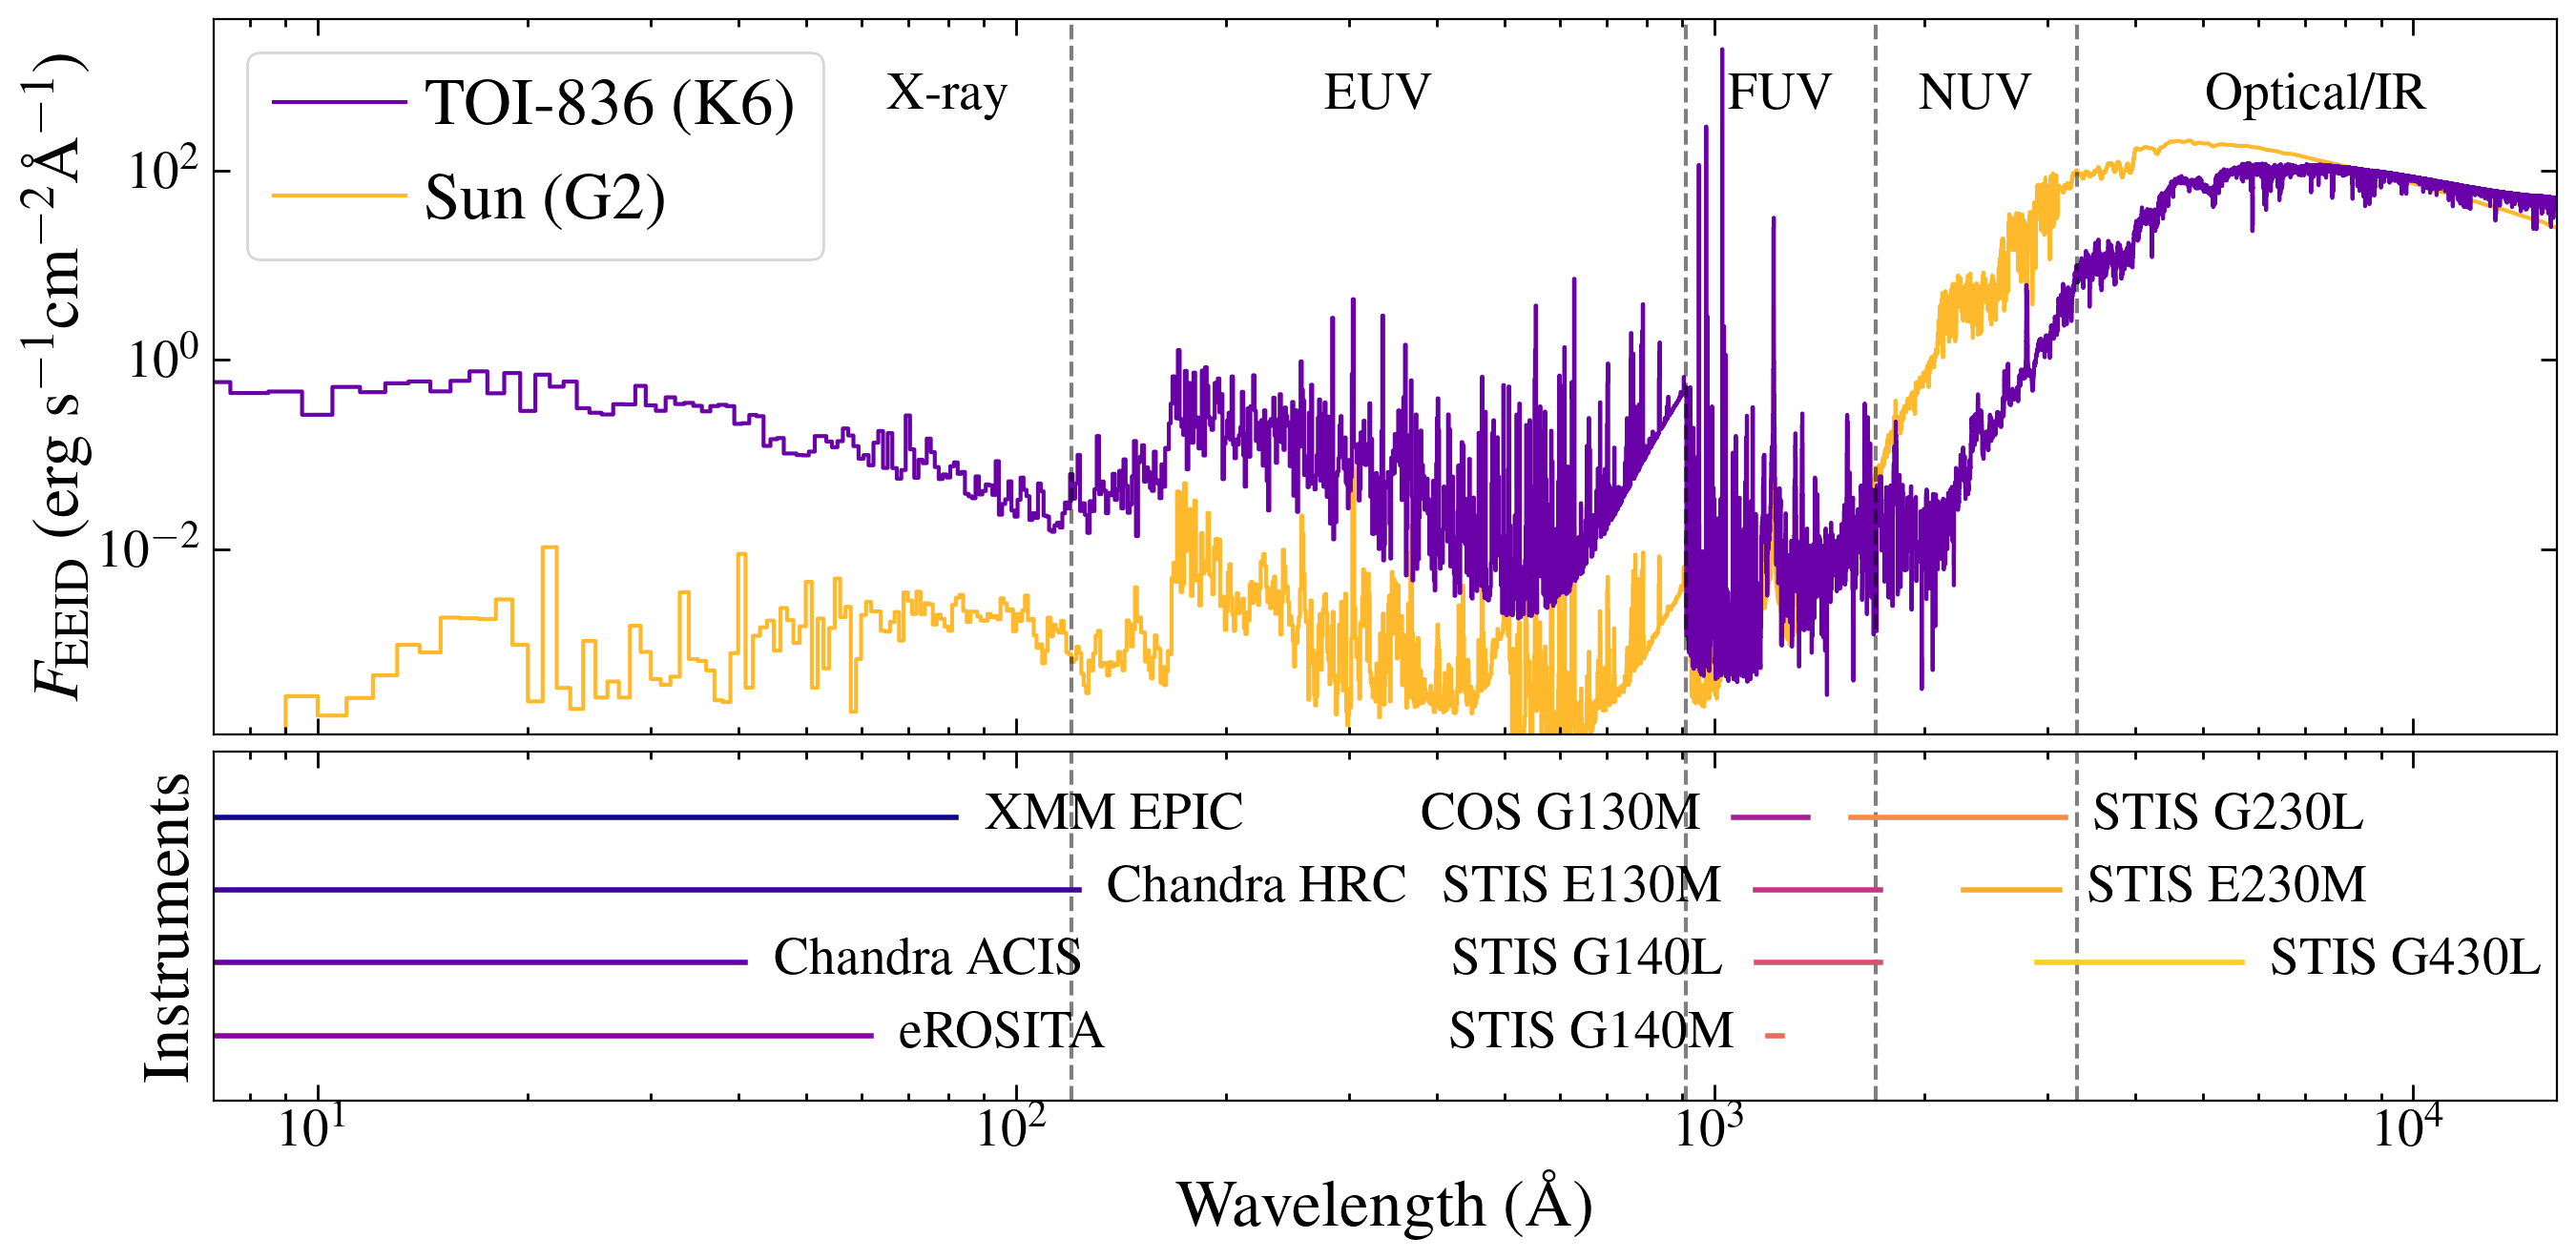

In [89]:
# import mplcyberpunk
# plt.style.use("cyberpunk")

# cols = ['C0', 'C1', 'C2']
cols = [plt.cm.plasma(0.2),plt.cm.plasma(0.85), plt.cm.plasma(0.45)]




dstar = 27.5024*u.pc
dsun = 1*u.au
lstar = 10**-0.8527588
# eeidau = 0.471*u.au
eeidau = (lstar**0.5)*u.au

solscale = lstar*(dsun.to(u.m)/dstar.to(u.m))**2
starscale = (dstar.to(u.m)/eeidau.to(u.m))**2
# print(bb_scale)

# fig, ax = plt.subplots(figsize=(14, 7))
fig, axes = plt.subplot_mosaic([[0,0,0],[0,0,0],[1,1,1]],figsize=(14, 7), sharex=True)


ax= axes[0]
ax.step(kw, kf*starscale, c=cols[0], label = 'TOI-836 (K6)', zorder=1, where='mid')
ax.step(sw, sf, c=cols[1], label = 'Sun (G2)', zorder=-1, where='mid')
# ax.set_xlim(11, sw[-1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1.1e-4, 4e3)


 
bar_y = 4e2
label_y = bar_y*1.5
e_y = bar_y *0.3

xlims = (7.1, 1.61e4)
ax.set_xlim(xlims[0], xlims[1])
# divlines = (120, 1160, 5690)
# divlines = (900, 3500) 
# [ax.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]

# labels = ['CXO/APEC', 'DEM', 'HST', 'PHX']
divlines = (120, 911, 1700, 3300)
[ax.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]


labels = ['X-ray', 'EUV', 'FUV', 'NUV', 'Optical/IR']
labpos = np.sort(np.hstack((xlims, divlines)))

for i, label in enumerate(labels):
    label_x = (labpos[i]*labpos[i+1])**0.5
    if i == 0:
        label_x = 80
    ax.annotate(label, (label_x, label_y), ha='center', va='center')


ax.legend(fontsize=25, loc=2,frameon=True)

# ax.set_xlabel('Wavelength (\AA)', size=25)
ax.set_ylabel('$F_{\mathrm{EEID}}$ (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)

ax1 = axes[1]
[ax1.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]

ax1.set_xlabel('Wavelength (\AA)', size=25)
# [ax1.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]

# [123.98419843   1.23984198] Angstrom
# [41.32806614  1.23984198] Angstrom
# [82.65613229  0.82656132] Angstrom

# table of bands 
# telescopes = np.array(['Chandra', 'eROSITA', 'EUVE', 'FUSE', 'GALEX', 'HST', 'IUE', 'ROSAT', 'Swift (XRT)', 'XMM-Newton'])
# bandpasses = np.array([[1.8, 24.8],[5.4, 62],[70,190],[905, 1196], [1350, 2800],[1160, 10070],[1150, 3200], [0.2, 124], [1.2,41.3], [0.8,62]])

telescopes = np.array(['Chandra HRC', 'Chandra ACIS', 'XMM EPIC', 'eROSITA', 'STIS G140L', 'STIS G140M', 'STIS E130M', 'STIS G230L', 'STIS E230M',
                      'STIS G430L', 'COS G130M'],)
bandpasses = np.array([[1.2, 123],[1.2, 41],[0.82, 82],[5.4, 62],[1150,1730], [1194, 1249], [1144, 1729],[1570,3180], [2275, 3119], 
                       [2900,5700],[1064, 1360]])


starts = bandpasses[:,0]
ends = bandpasses[:,1]
args = np.argsort(starts)
telescopes, starts, ends = telescopes[args], starts[args], ends[args]
ys = np.arange(len(telescopes))[::-1]
telcols = np.linspace(0, 0.9, len(telescopes))
for i, scope in enumerate(telescopes):
    ypos = ys[i]
    labelpos = ends[i] *1.1
    ha = 'left'
    if (starts[i] > 800) & (ends[i]< 2000) :
        labelpos = starts[i] *0.9
        ha = 'right'
        ypos += 4
    elif (ends[i] > 2000):
        ypos += 8
    # if scope == 'STIS G430L':
    ax1.annotate(scope, (labelpos, ypos), va='center', ha=ha)
    ax1.plot([starts[i], ends[i]], [ypos, ypos], c=plt.cm.plasma(telcols[i]), lw=2)

ax1.set_yticks([])

ax1.set_ylim(6.1, 10.9)
ax1.set_ylabel('Instruments', size=25)

fig.tight_layout()
fig.subplots_adjust(hspace=0.05)

plt.savefig('../plots/pngs/toi836_v_sun_obs.png', facecolor='w')
plt.savefig('../plots/toi836_v_sun_obs.pdf')

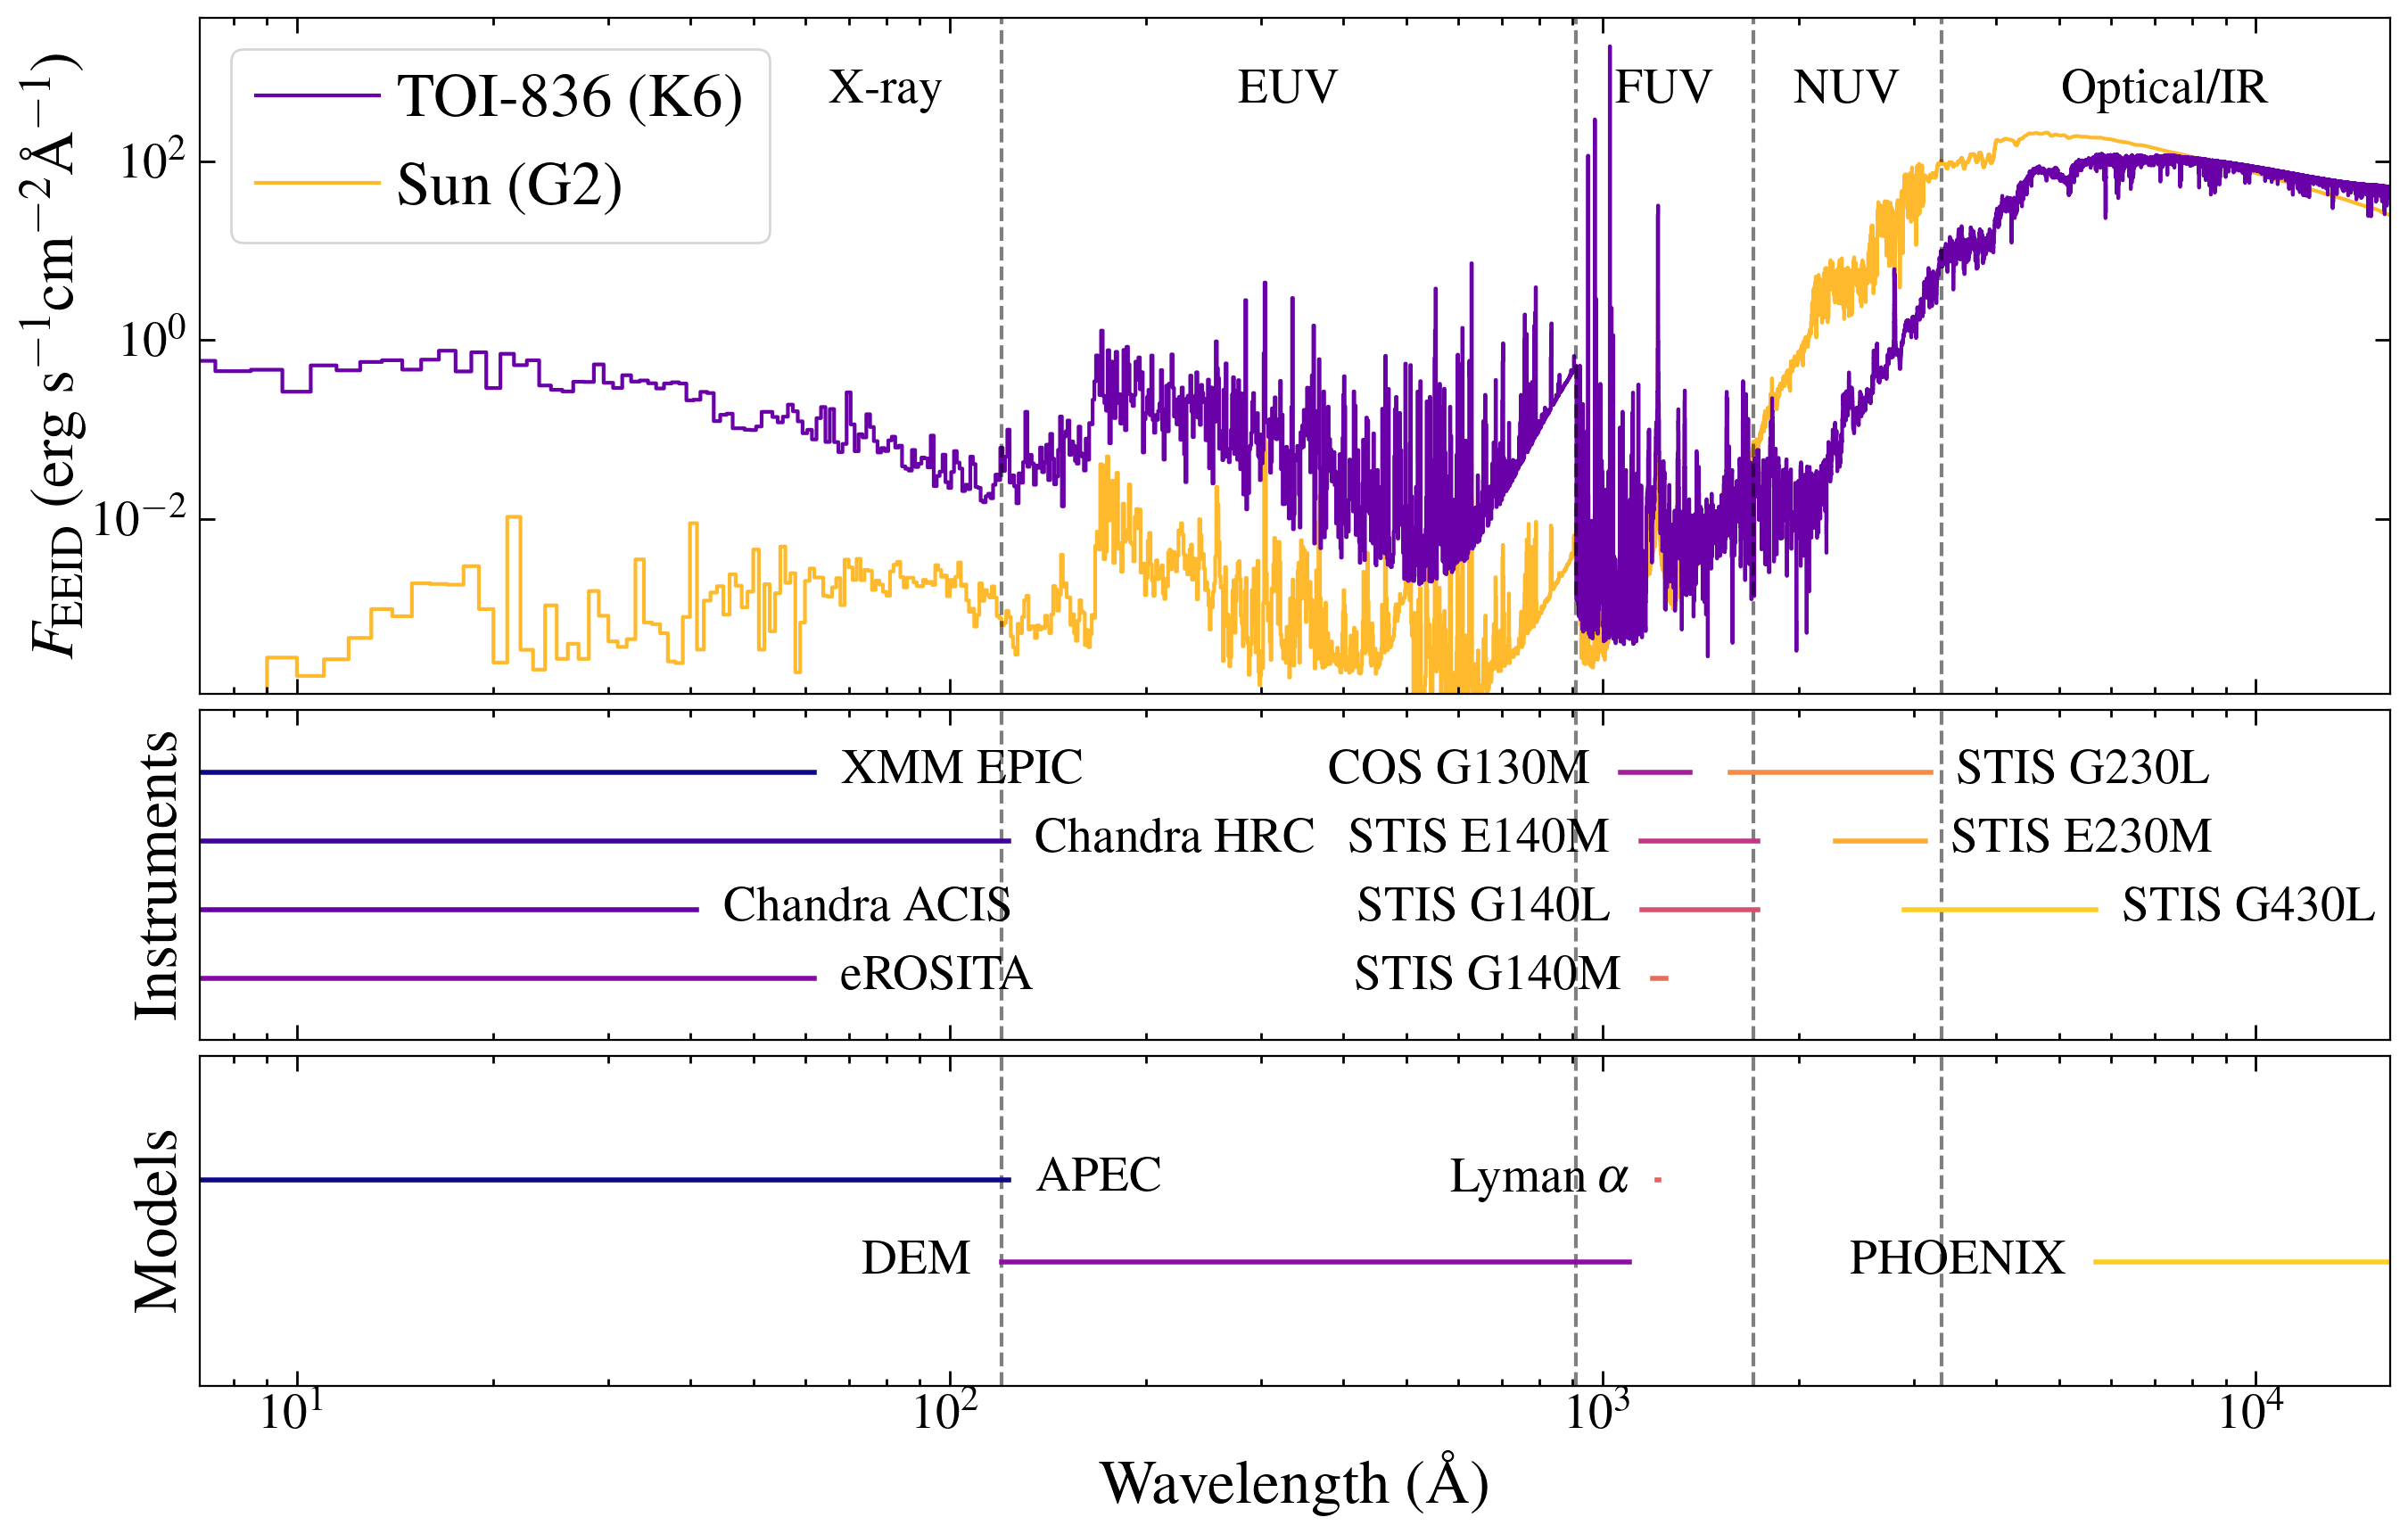

In [90]:
cols = [plt.cm.plasma(0.2),plt.cm.plasma(0.85), plt.cm.plasma(0.45)]




dstar = 27.5024*u.pc
dsun = 1*u.au
lstar = 10**-0.8527588
# eeidau = 0.471*u.au
eeidau = (lstar**0.5)*u.au

solscale = lstar*(dsun.to(u.m)/dstar.to(u.m))**2
starscale = (dstar.to(u.m)/eeidau.to(u.m))**2
# print(bb_scale)

# fig, ax = plt.subplots(figsize=(14, 7))
fig, axes = plt.subplot_mosaic([[0,0,0],[0,0,0],[1,1,1],[2,2,2]],figsize=(14, 9), sharex=True)


ax= axes[0]
ax.step(kw, kf*starscale, c=cols[0], label = 'TOI-836 (K6)', zorder=1, where='mid')
ax.step(sw, sf, c=cols[1], label = 'Sun (G2)', zorder=-1, where='mid')
# ax.set_xlim(11, sw[-1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1.1e-4, 4e3)


 
bar_y = 4e2
label_y = bar_y*1.5
e_y = bar_y *0.3

xlims = (7.1, 1.61e4)
ax.set_xlim(xlims[0], xlims[1])
# divlines = (120, 1160, 5690)
# divlines = (900, 3500) 
# [ax.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]

# labels = ['CXO/APEC', 'DEM', 'HST', 'PHX']
divlines = (120, 911, 1700, 3300)
[ax.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]


labels = ['X-ray', 'EUV', 'FUV', 'NUV', 'Optical/IR']
labpos = np.sort(np.hstack((xlims, divlines)))

for i, label in enumerate(labels):
    label_x = (labpos[i]*labpos[i+1])**0.5
    if i == 0:
        label_x = 80
    ax.annotate(label, (label_x, label_y), ha='center', va='center')


ax.legend(fontsize=25, loc=2,frameon=True)

# ax.set_xlabel('Wavelength (\AA)', size=25)
ax.set_ylabel(r'$F_{\mathrm{EEID}}$ (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)

ax1 = axes[1]
[ax1.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]

# ax1.set_xlabel('Wavelength (\AA)', size=25)
# [ax1.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]

# [123.98419843   1.23984198] Angstrom
# [41.32806614  1.23984198] Angstrom
# [82.65613229  0.82656132] Angstrom

# table of bands 
# telescopes = np.array(['Chandra', 'eROSITA', 'EUVE', 'FUSE', 'GALEX', 'HST', 'IUE', 'ROSAT', 'Swift (XRT)', 'XMM-Newton'])
# bandpasses = np.array([[1.8, 24.8],[5.4, 62],[70,190],[905, 1196], [1350, 2800],[1160, 10070],[1150, 3200], [0.2, 124], [1.2,41.3], [0.8,62]])

telescopes = np.array(['Chandra HRC', 'Chandra ACIS', 'XMM EPIC', 'eROSITA', 'STIS G140L', 'STIS G140M', 'STIS E140M', 'STIS G230L', 'STIS E230M',


                   'STIS G430L', 'COS G130M'],)
bandpasses = np.array([[1.2, 123],[1.2, 41],[0.82, 62],[5.4, 62],[1150,1730], [1194, 1249], [1144, 1729],[1570,3180], [2275, 3119], 
                       [2900,5700],[1064, 1360]])


starts = bandpasses[:,0]
ends = bandpasses[:,1]
args = np.argsort(starts)
telescopes, starts, ends = telescopes[args], starts[args], ends[args]
ys = np.arange(len(telescopes))[::-1]
telcols = np.linspace(0, 0.9, len(telescopes))
for i, scope in enumerate(telescopes):
    ypos = ys[i]
    labelpos = ends[i] *1.1
    ha = 'left'
    if (starts[i] > 800) & (ends[i]< 2000) :
        labelpos = starts[i] *0.9
        ha = 'right'
        ypos += 4
    elif (ends[i] > 2000):
        ypos += 8
    # if scope == 'STIS G430L':
    ax1.annotate(scope, (labelpos, ypos), va='center', ha=ha)
    ax1.plot([starts[i], ends[i]], [ypos, ypos], c=plt.cm.plasma(telcols[i]), lw=2)

ax1.set_yticks([])

ax1.set_ylim(6.1, 10.9)
ax1.set_ylabel('Instruments', size=25)


ax2 = axes[2]
ax2.set_xlabel(r'Wavelength (\AA)', size=25)
ax2.set_yticks([])
ax2.set_ylabel(r'Models', size=25)
[ax2.axvline(line, ls='--', c='k', alpha=0.5) for line in divlines]



models = np.array(['APEC', 'DEM', r'Lyman\,$\alpha$', 'PHOENIX'])
model_bandpasses = np.array([[1.2, 123],[120, 1100], [1210, 1220], [5700, 1e6]])

starts = model_bandpasses[:,0]
ends = model_bandpasses[:,1]
args = np.argsort(starts)
models, starts, ends = models[args], starts[args], ends[args]
ys = np.arange(len(models))[::-1]
modcols = np.linspace(0, 0.9, len(models))
for i, mod in enumerate(models):
    ypos = ys[i]
    labelpos = ends[i] *1.1
    ha = 'left'
    if (starts[i] > 100): #& (ends[i]< 2000) :
        labelpos = starts[i] *0.9
        ha = 'right'
    if starts[i] > 300:
        ypos += 2
    # elif (ends[i] > 2000):
        # ypos += 8
    # if scope == 'STIS G430L':
    ax2.annotate(mod, (labelpos, ypos), va='center', ha=ha)
    ax2.plot([starts[i], ends[i]], [ypos, ypos], c=plt.cm.plasma(modcols[i]), lw=2)

ax2.set_ylim(0.5,4.5)




fig.tight_layout()
fig.subplots_adjust(hspace=0.05)

plt.savefig('../plots/pngs/toi836_v_sun_obs_mods.png', facecolor='w')
plt.savefig('../plots/toi836_v_sun_obs_mods.pdf')

Plot of what stars have what data

In [6]:
proxtab= Table.read('which_data_tab.csv')

In [7]:
proxtab

<Table length=20>
   Name   Teff (K) Parallax (mas) Dist (pc) X-ray FUV 
   str9    int64      float64      float64   str1 str1
--------- -------- -------------- --------- ----- ----
  WASP-63     5550    3.460921346    288.94     N    N
 WASP-121     6459         3.6763    272.01     Y    Y
HIP 67522     5675    8.017041586    124.73     Y    Y
Kepler-51     5670         1.2473    801.73     N    N
   GJ 367     3522    106.1726822      9.42     Y    Y
    K2-18     3457    26.24687716      38.1     N    N
  TOI-776     3709    36.82910606     27.15     Y    Y
   GJ 341     3770    95.69817587     10.45     Y    Y
  TOI-421     5325        13.3407     74.96     N    Y
  TOI-134     3800    39.71128907     25.18     Y    Y
 WASP-166     6050         8.7301    114.55     Y    Y
  NGTS-10     4400     3.87136949    258.31     N    N
  TOI-260     4111      49.475749     20.21     Y    y
  TOI-836     4552    36.35254671     27.51     Y    Y
  TOI-402     5125     22.2921699     44.86     Y    Y
   K2-141     4599    16.13029394      62.0     Y    Y
  TOI-178     4316        15.9205     62.81     N    Y
 HD 80606     5561    15.14390291     66.03     N    Y
  HATS-72     4656          7.809    128.06     N    Y
  GJ 4102     3300    80.11338273     12.48     Y    Y

In [8]:
hosttab = Table.read('../planet_params/STELLARHOSTS_2025.02.24_12.20.34.tab', format='ascii.fast_tab') #adding host stars
# hosttab

host_tics = []
host_dist = []
host_teffs = []

for row in hosttab:
    if row['tic_id'].size > 0:
        if row['tic_id'] not in host_tics:
            host_tics.append(row['tic_id'])
            host_teffs.append(row['st_teff'])
            host_dist.append(row['sy_dist'])

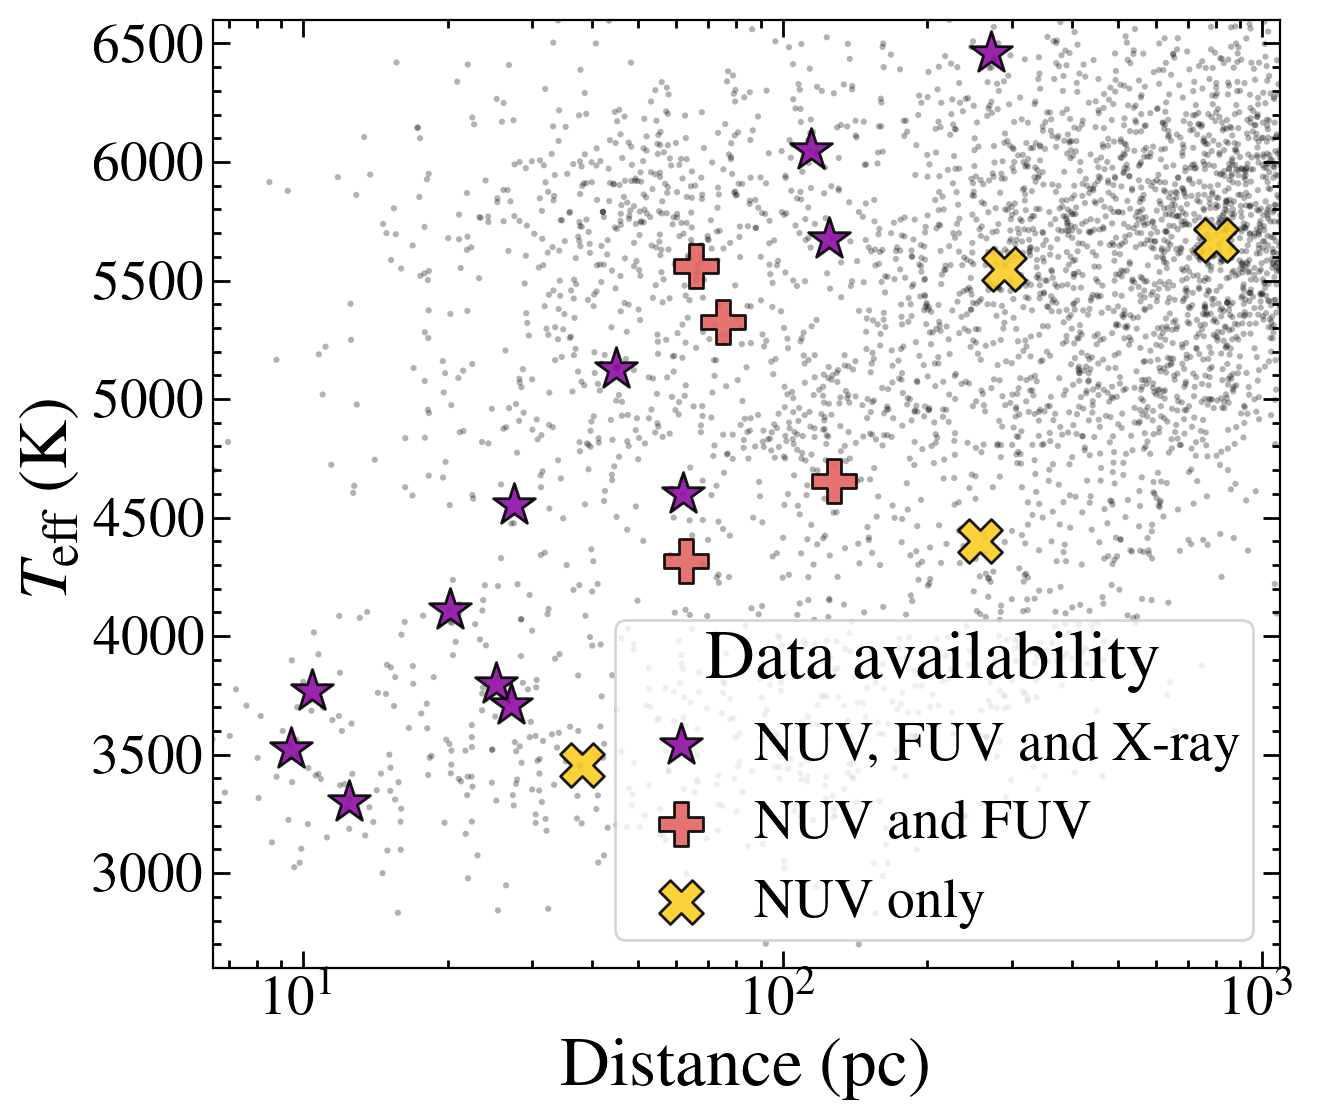

In [9]:
fig, ax = plt.subplots(figsize=(7,6))

# np.random.seed(42)

rng = np.random.default_rng(1)
args = np.arange(len(proxtab['Dist (pc)']))

rng.shuffle(args)

#doing this to try t get the right label order 
dist = proxtab['Dist (pc)'][args]
teff = proxtab['Teff (K)'][args]
fuv = proxtab['FUV'][args]
xray = proxtab['X-ray'][args]

cols = [plt.cm.plasma(0.3), plt.cm.plasma(0.6), plt.cm.plasma(0.9)]

for i in range(len(dist)):
    if fuv[i] == 'N':
        label = 'NUV only'
        col = cols[2]
        marker = 'X'
    elif xray[i] == 'N':
        label = 'NUV and FUV'
        col = cols[1]
        marker = 'P'
        
    else:
        label = 'NUV, FUV and X-ray'
        col = cols[0]
        marker='*'
    ax.scatter(dist[i], teff[i], marker=marker, color=col, label = label, edgecolor='k', s=250, alpha=0.9)

ax.set_xscale('log')
# ax.set_yscale('log')

ax.set_xlabel(r'Distance (pc)', size=25)
ax.set_ylabel(r'$T_{\mathrm{eff}}$ (K)', size=25)
# ax.scatter(host_dist,host_teffs, s=5, zorder=-10, alpha=0.3, c='k', edgecolor='none', label='All host stars')
ax.scatter(host_dist,host_teffs, s=5, zorder=-10, alpha=0.3, c='k', edgecolor='none')


handles, labels = plt.gca().get_legend_handles_labels()
# print(labels)
# order = [1, 2, 0]
# labels, handles = [labels[i] for i in order], [handles[i] for i in order]
by_label = dict(zip(labels, handles))
# fig.legend(by_label.values(), by_label.keys(), frameon=True, loc='outside upper center', ncols=2, bbox_to_anchor=(0.5, 1.2))
ax.legend(by_label.values(), by_label.keys(), frameon=True, loc=4, borderpad=0.2, title='Data availability',title_fontsize=25)
ax.set_xlim(6.5, 1090)
ax.set_ylim(2601,6599)

# ax.scatter(hosttab['sy_dist'],hosttab['st_teff'], s=5, zorder=-10, alpha=0.1, c='k', edgecolor='none')

fig.tight_layout()
fig.savefig('../plots/which_data_plot.pdf')

In [10]:
np.random.shuffle(np.arange(0, len(proxtab['Dist (pc)'])))

In [11]:
params_all = Table.read('parameters_table.csv')
mask = params_all['Proxy'] == 'N'
params = params_all[mask]

params.sort(['Teff (K)'])

prox_params = params_all[~mask]
prox_params.sort(['Teff (K)'])


big plot (place holder until all the stars are done)

In [12]:
adapt_seds = glob.glob('../draft_hlsp/*/*adapt*const*')
plot_seds = []
for sed in adapt_seds:
    if 'kap1cet' not in sed and 'tau_ceti' not in sed and 'eps_indi' not in sed and '70_oph_b' not in sed:
        plot_seds.append(sed)

# print(plot_seds)
print(len(plot_seds))
plot_seds

20


['../draft_hlsp/toi-836/hlsp_muscles_multi_multi_toi-836_broadband_v1_adapt-const-res-sed.fits',
 '../draft_hlsp/hd120411/hlsp_muscles_multi_multi_hd-120411_broadband_v1_adapt-const-res-sed.fits',
 '../draft_hlsp/hd80606/hlsp_muscles_multi_multi_hd_80606_broadband_v1_adapt-const-res-sed.fits',
 '../draft_hlsp/ngts-10/hlsp_muscles_multi_multi_ngts-10_broadband_v1_adapt-const-res-sed.fits',
 '../draft_hlsp/toi-178/hlsp_muscles_multi_multi_toi-178_broadband_v1_adapt-const-res-sed.fits',
 '../draft_hlsp/wasp-166/hlsp_muscles_multi_multi_wasp-166_broadband_v1_adapt-const-res-sed.fits',
 '../draft_hlsp/k2-18/hlsp_muscles_multi_multi_k2-18_broadband_v1_adapt-const-res-sed.fits',
 '../draft_hlsp/hats-72/hlsp_muscles_multi_multi_hats-72_broadband_v1_adapt-const-res-sed.fits',
 '../draft_hlsp/gj_4102/hlsp_muscles_multi_multi_gj_4102_broadband_v1_adapt-const-res-sed.fits',
 '../draft_hlsp/kepler-51/hlsp_muscles_multi_multi_kepler-51_broadband_v1_adapt-const-res-sed.fits',
 '../draft_hlsp/k2-141/h

In [13]:
names = np.array([n.lower() for n in params['Name']])

teffs = []
for spec in plot_seds:
    star = fits.getheader(spec)['TARGNAME']
    star = star.lower().replace('_', ' ')
    if star == 'hd-120411':
        star  = 'hip 67522'
    print(star)
    ind = np.where(names == star)[0][0]
    # starinds.append(ind)
    teffs.append(params['Teff (K)'][ind])


args = np.argsort(teffs)
seds_sort = np.array(plot_seds)[args]
teffs = np.array(teffs)[args]


toi-836
hip 67522
hd 80606
ngts-10
toi-178
wasp-166
k2-18
hats-72
gj 4102
kepler-51
k2-141
wasp-63
toi-402
toi-776
toi-260
gj 341
toi-421
gj 367
toi-134
wasp-121


<>:54: SyntaxWarning: invalid escape sequence '\A'
<>:54: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_8743/2863079277.py:54: SyntaxWarning: invalid escape sequence '\A'
  bigax.set_xlabel('Wavelength (\AA)', size=20)


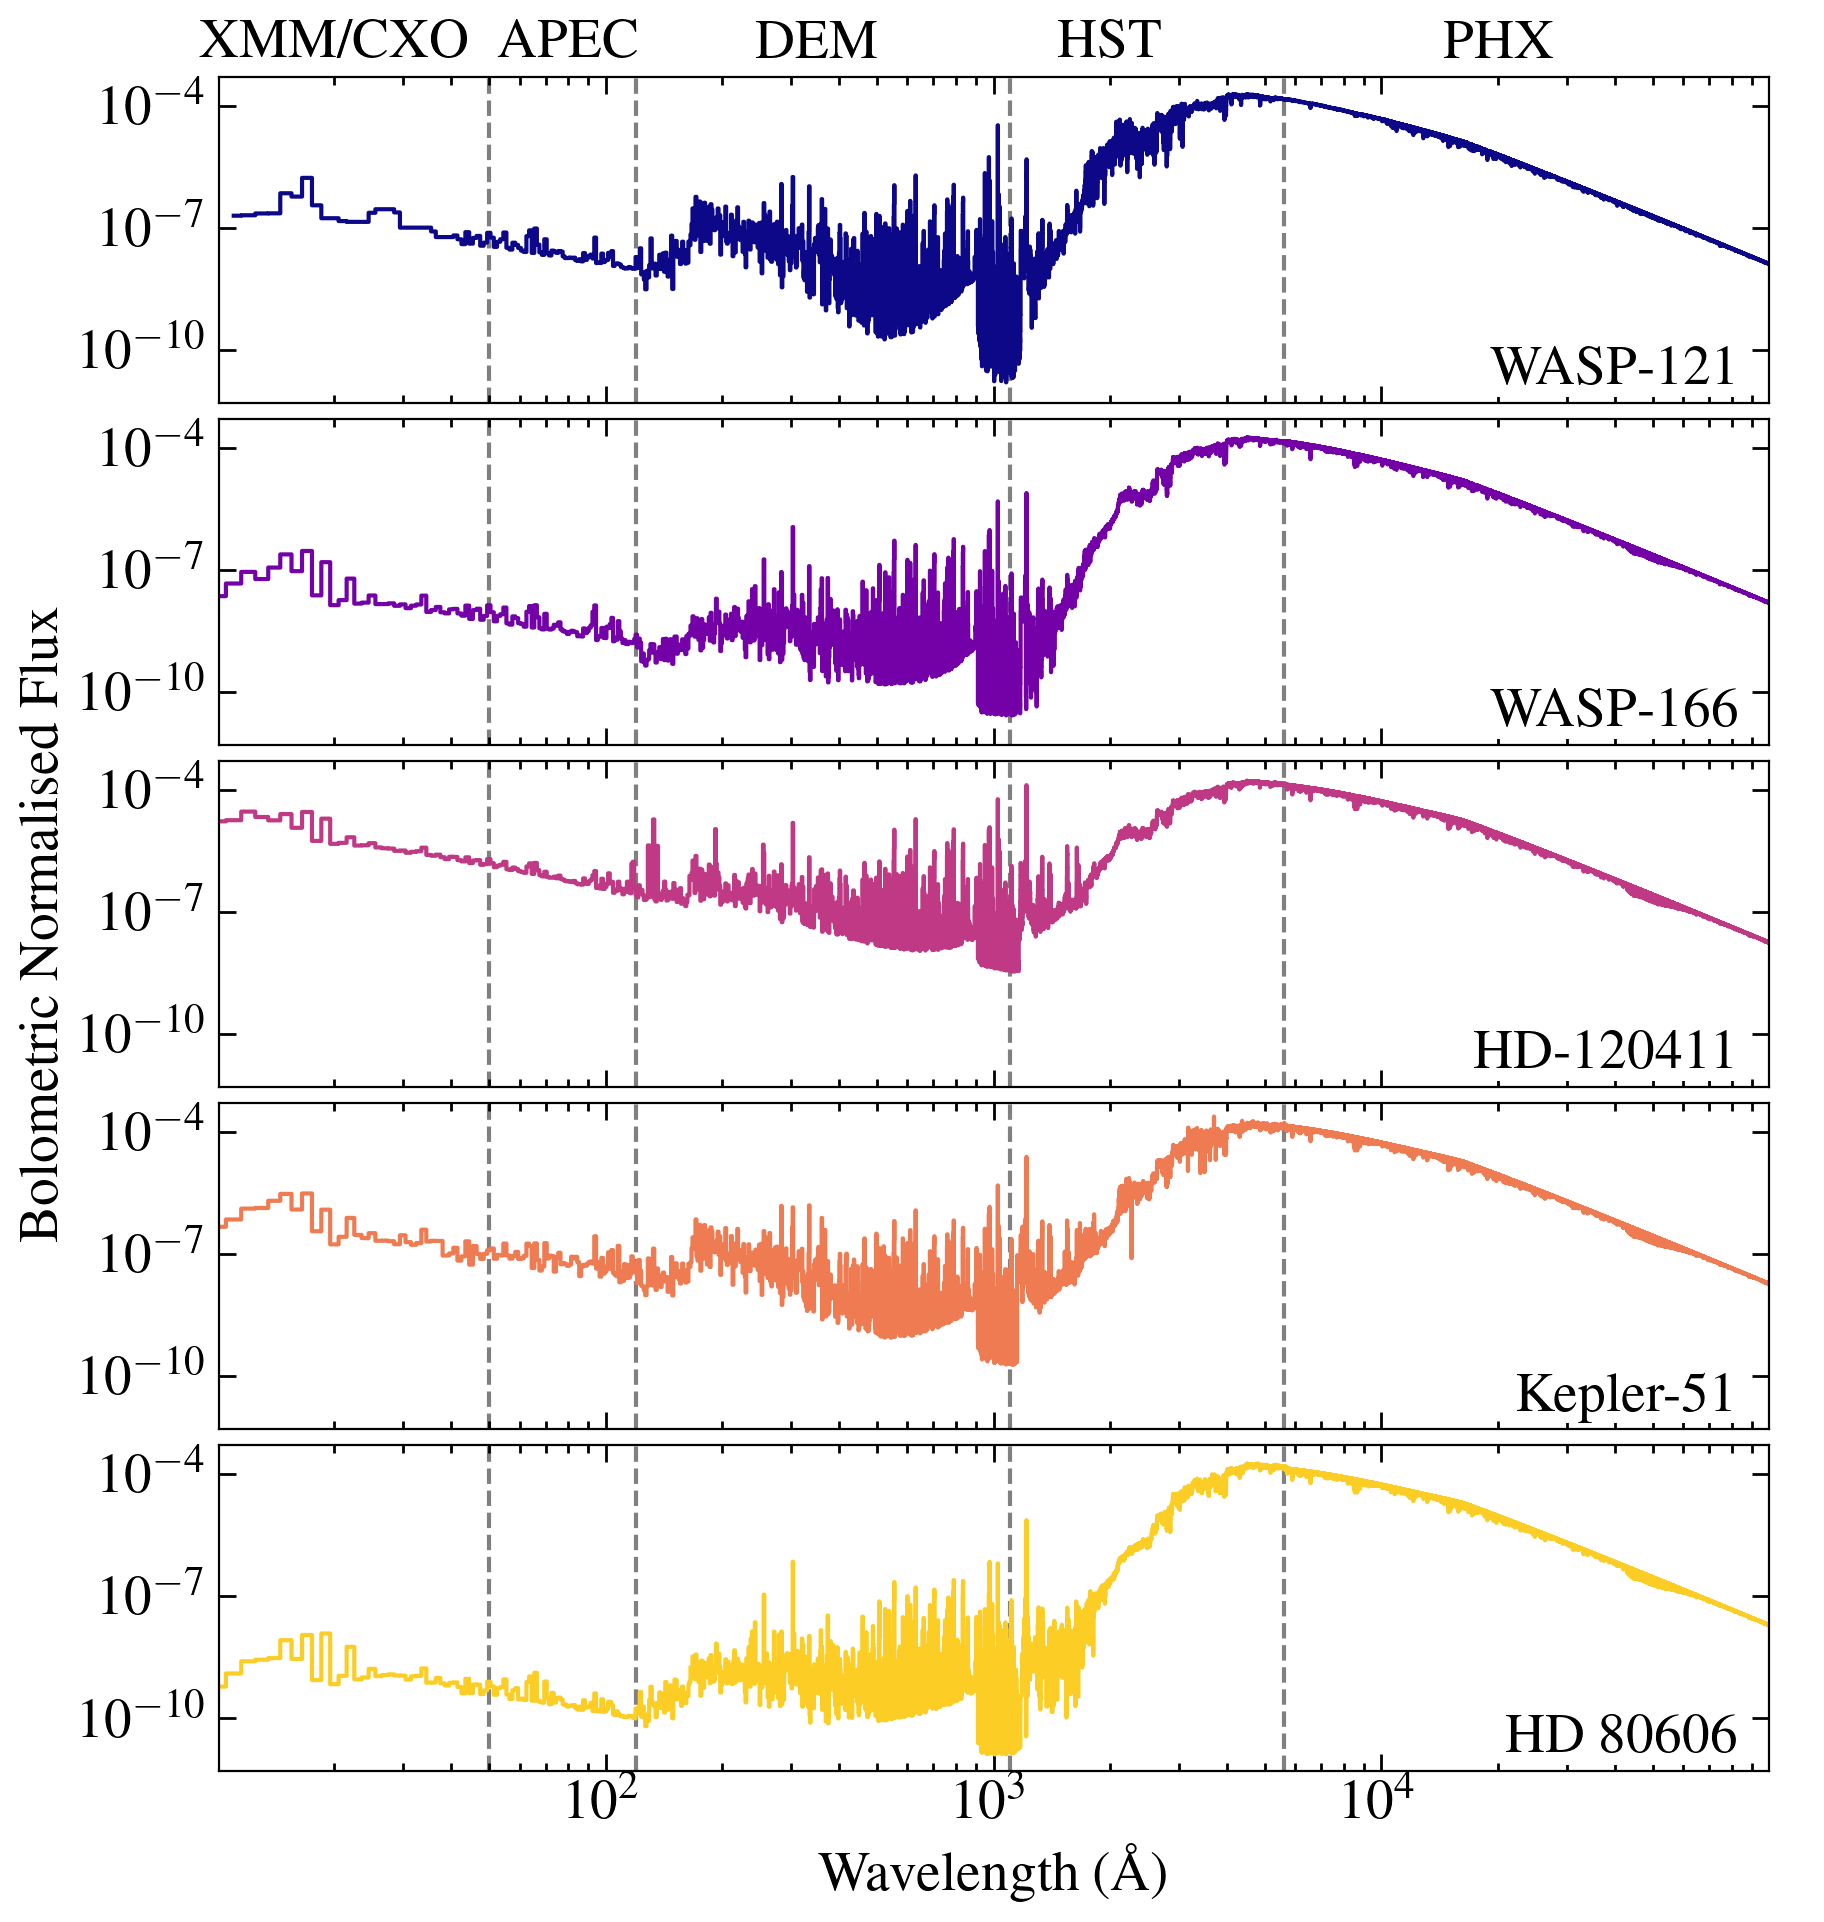

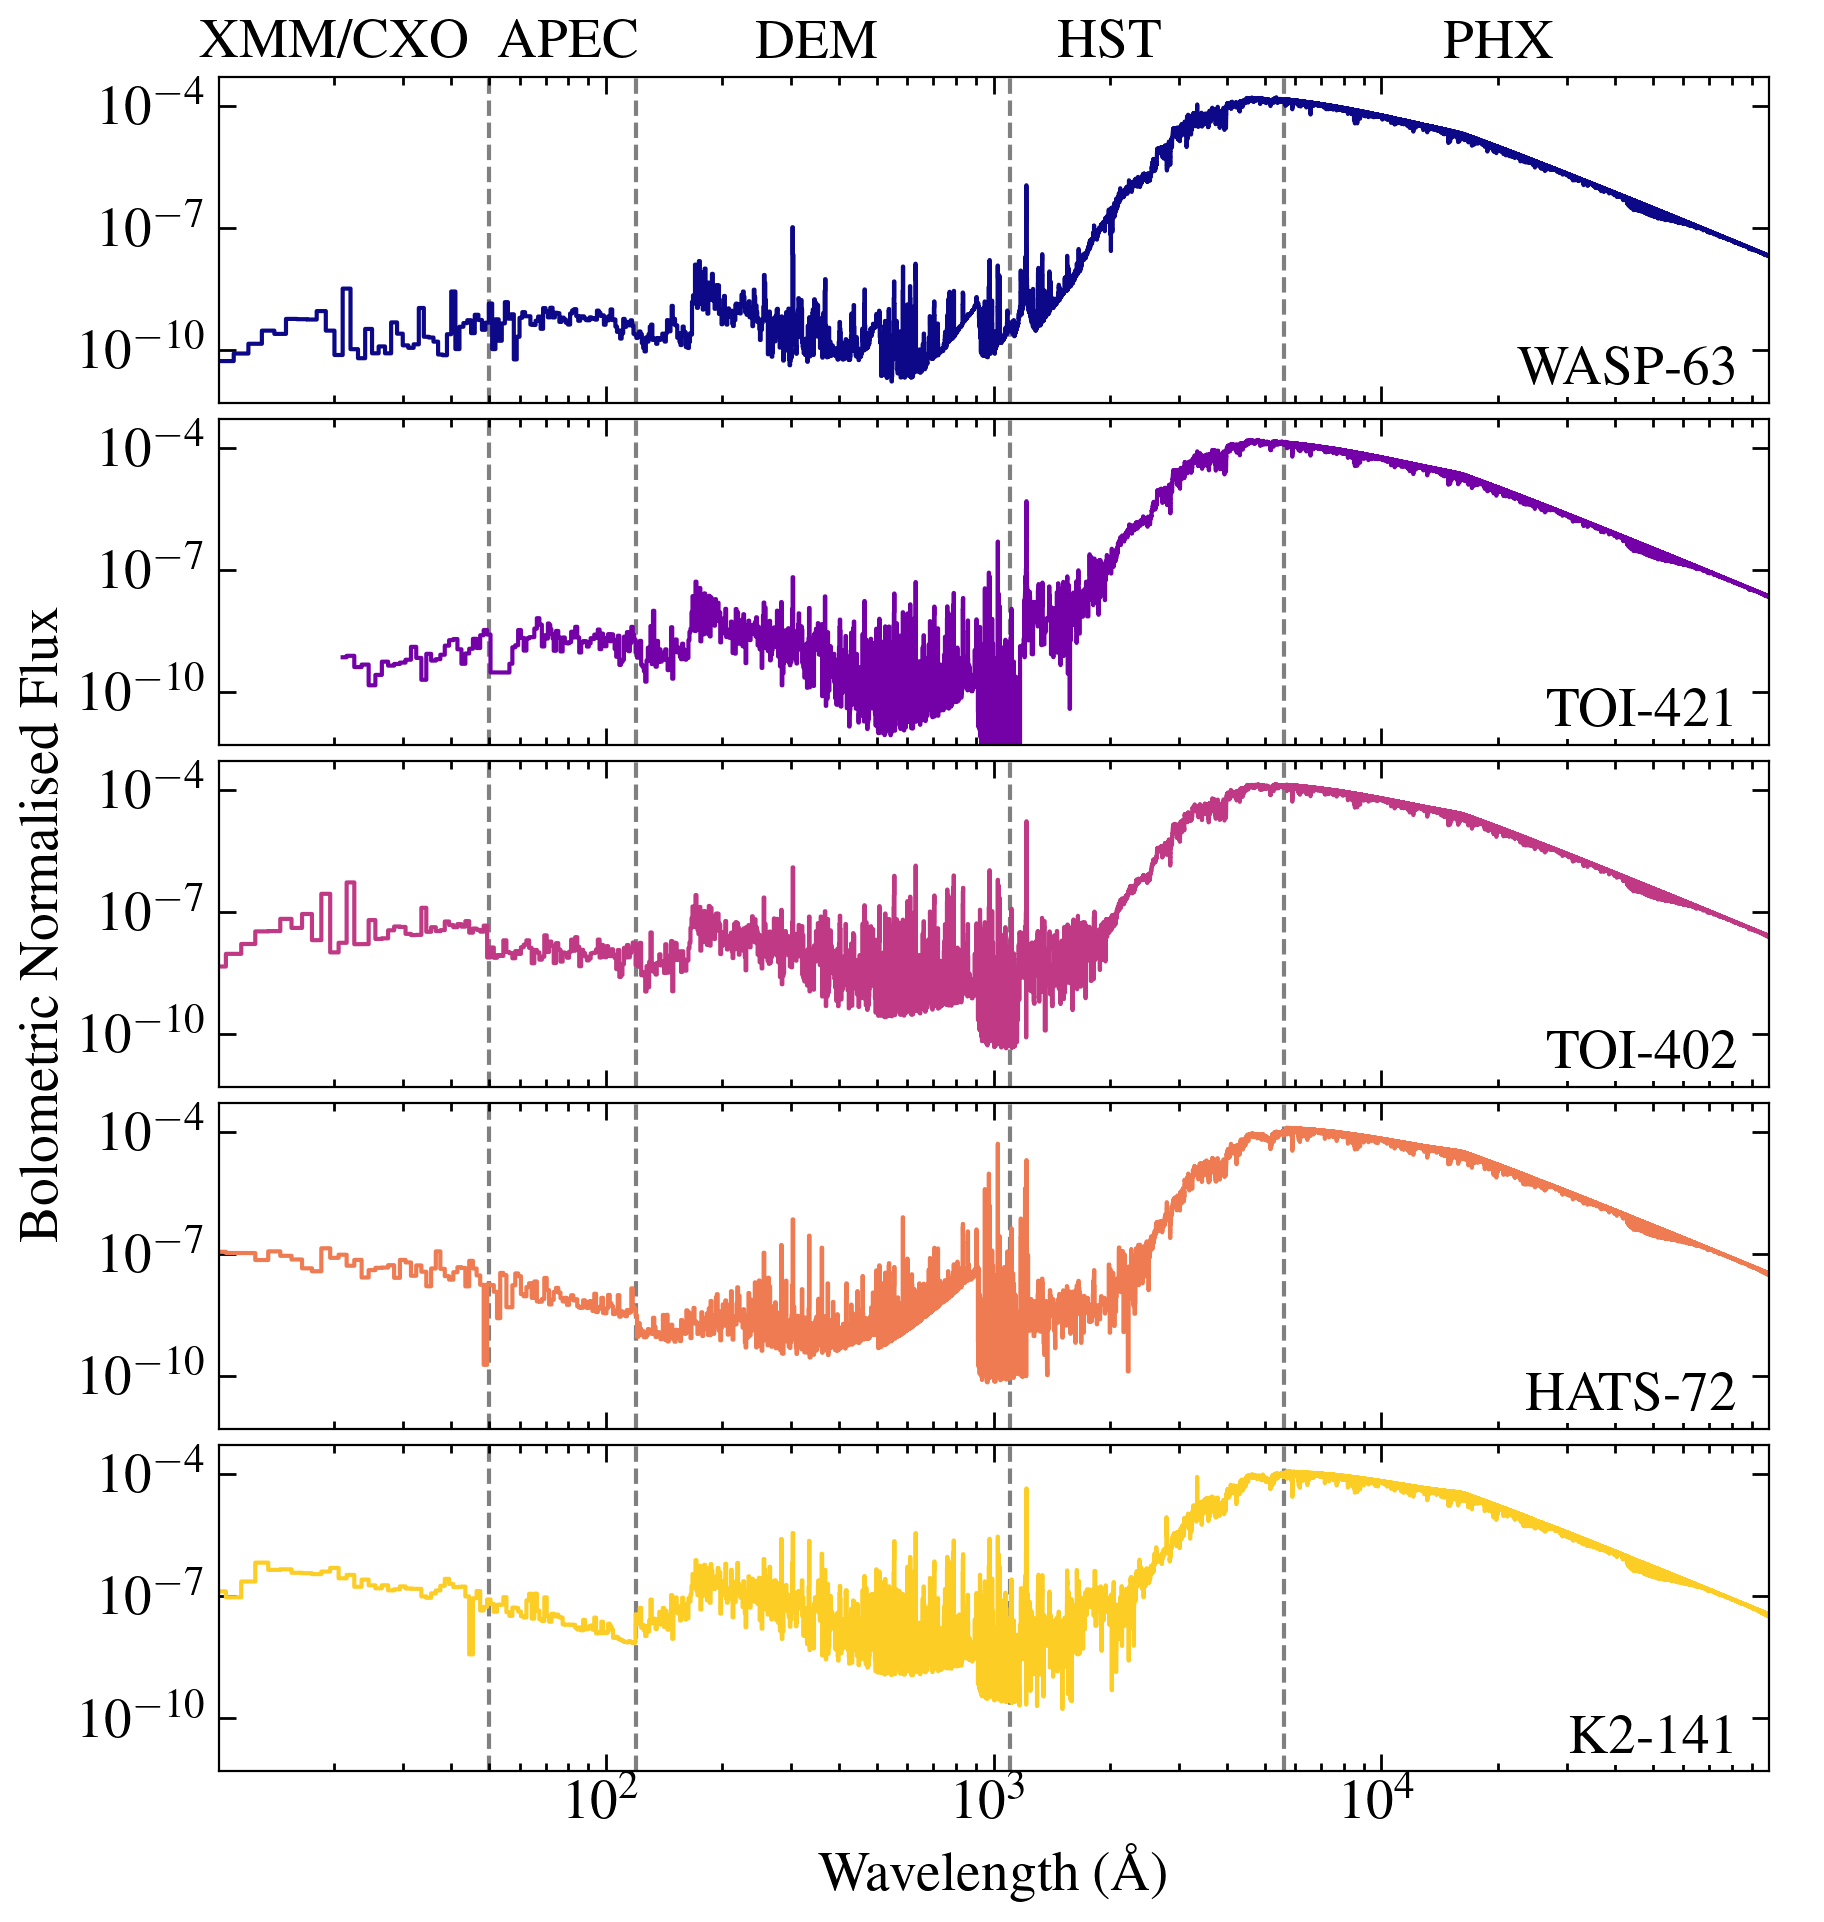

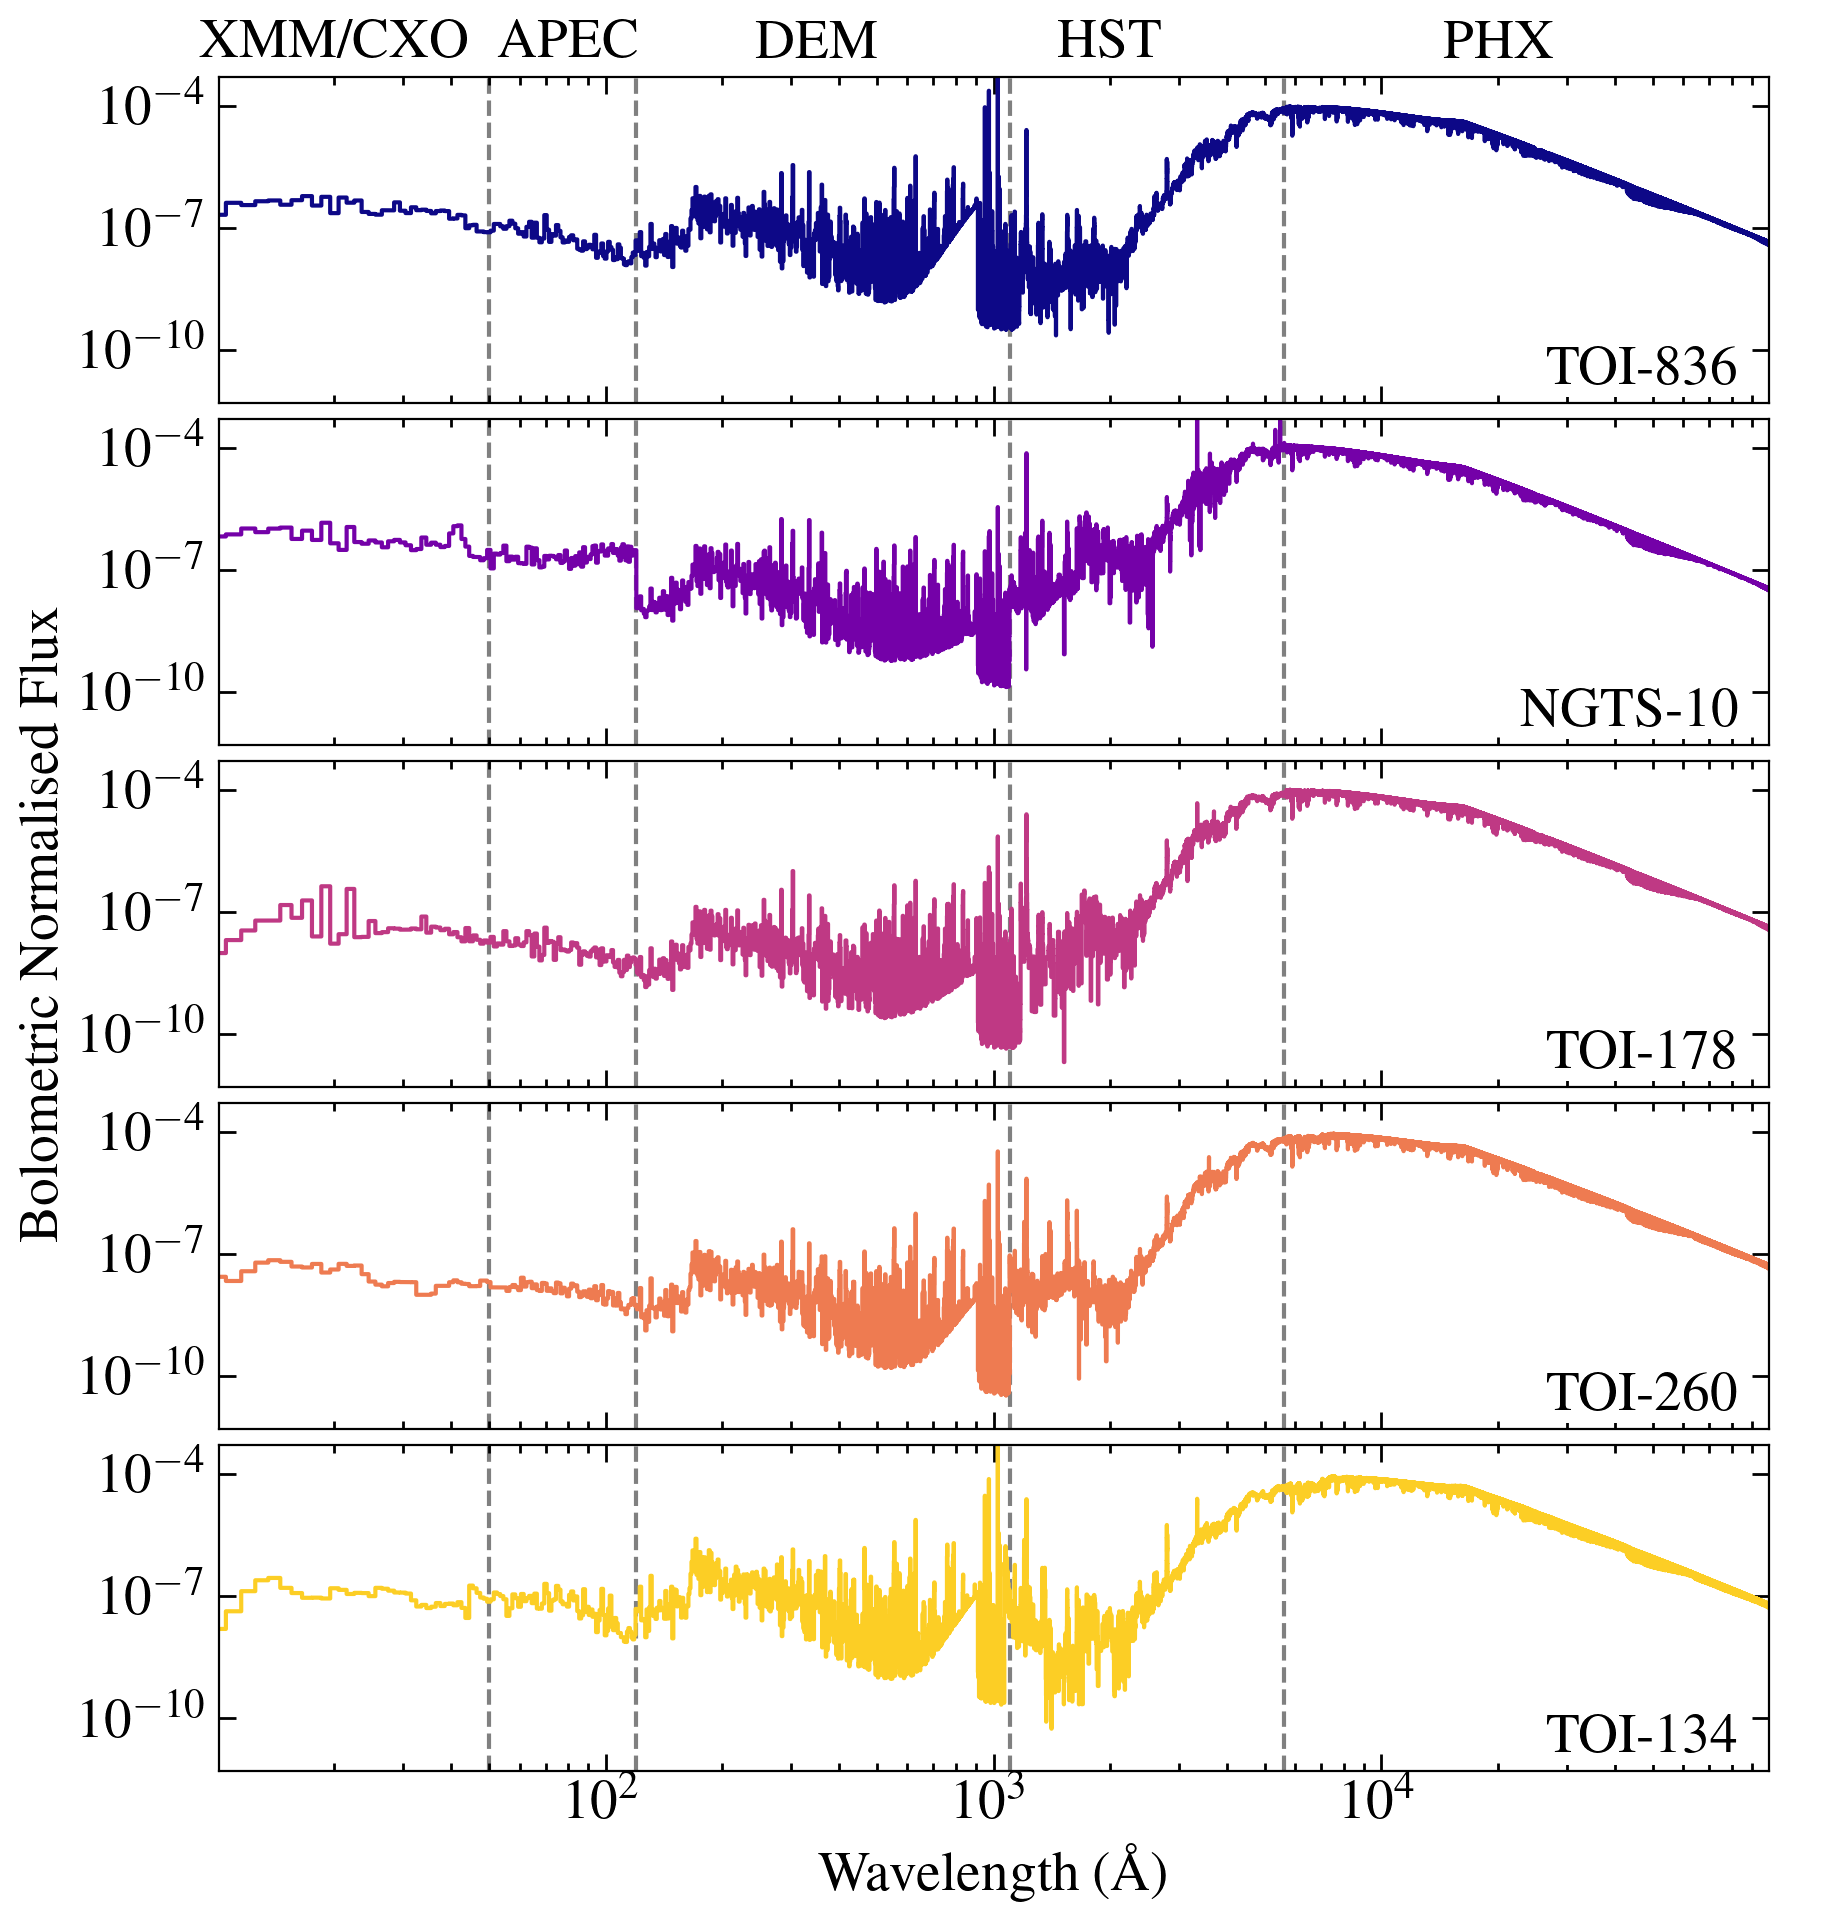

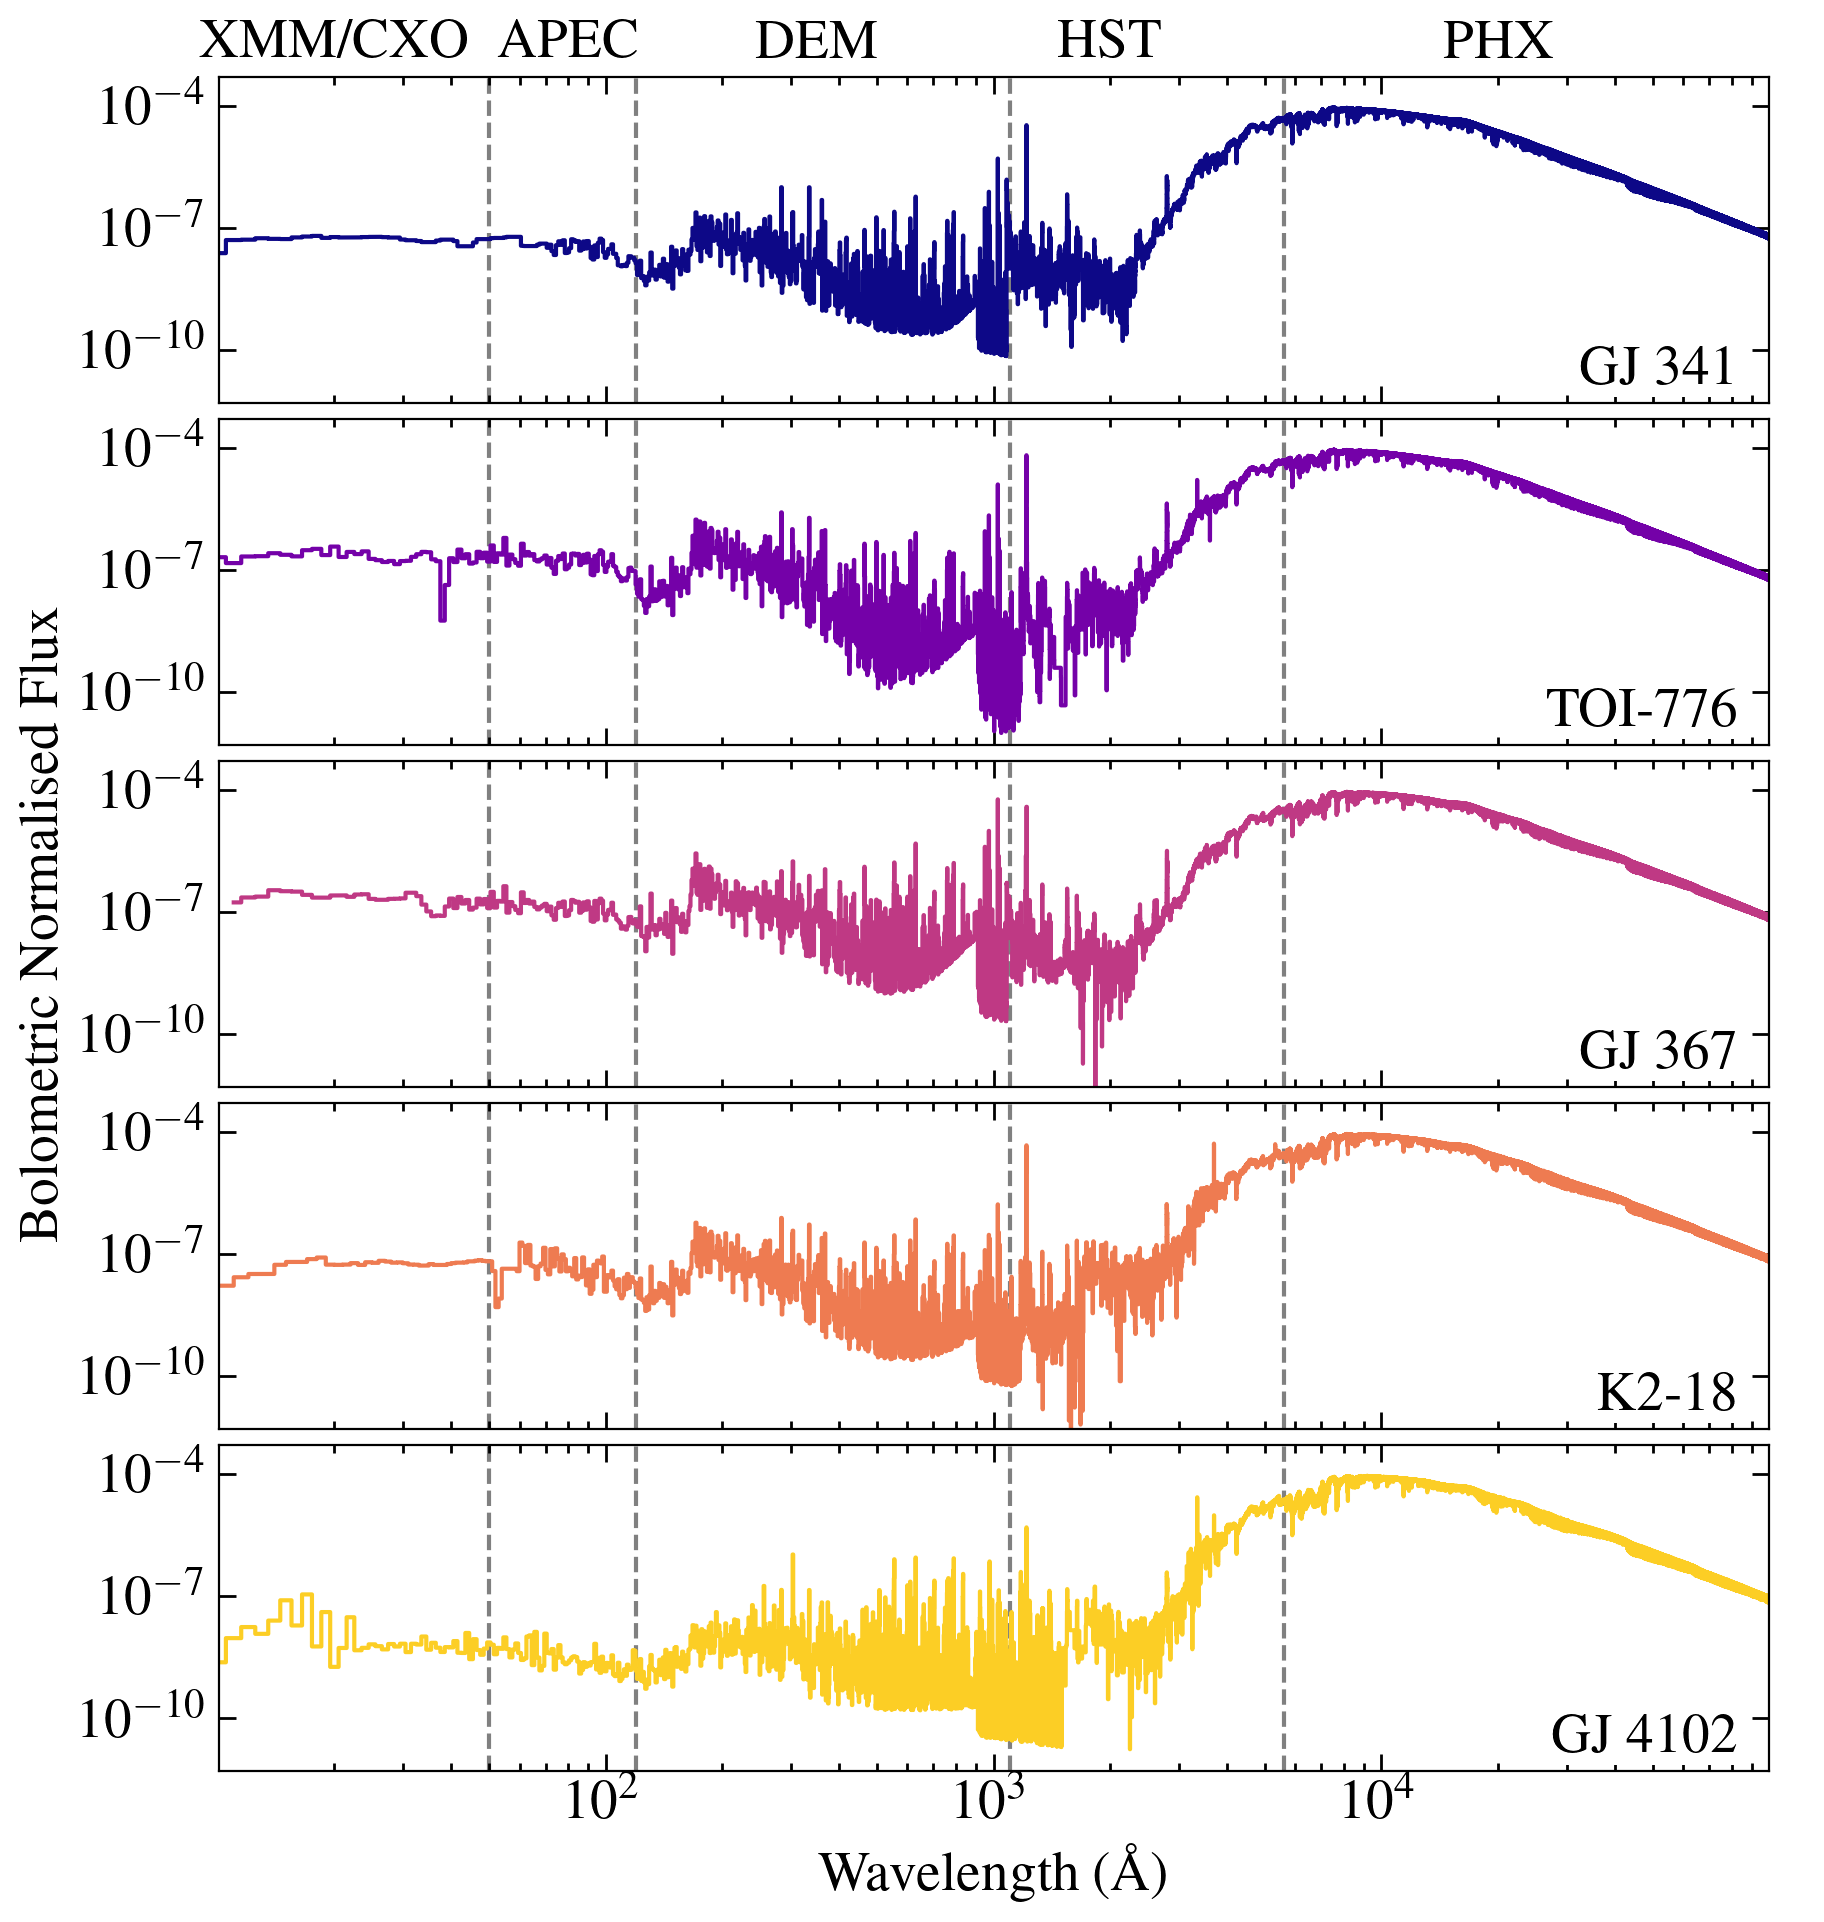

In [14]:
nstars = 5 #number of stars to plot in each plot

stars_done = [] # all seds that appear in this plot

nplots = 4 
plotn = 1#counter for which plot you're on

cols = np.linspace(0, 0.9, nstars)

for i in range(nplots):
    fig, axes = plt.subplots(sharex=True, sharey=True, nrows=5, figsize=(10, 11))

    for j in range(nstars):
        ax = axes[j]
        sed_ind = j+i*nstars
        if sed_ind < len(seds_sort): #placeholder until they're done
            spec= seds_sort[::-1][sed_ind]

            data = fits.getdata(spec, 1)
            star = fits.getheader(spec)['TARGNAME']
            stars_done.append(star)
            star = star.upper().replace('_', ' ')
            w, f, e, inst = data['WAVELENGTH'], data['BOLOFLUX'], data['ERROR'], data['INSTRUMENT']
            w, f = w[f >0], f[f>0]
            w, f = w[w< 1e6], f[w < 1e6]
            ax.step(w, f, c=plt.cm.plasma(cols[j]), where='mid')
            ax.set_yscale('log')
            ax.set_xscale('log')
            ax.set_xlim(10.1, 99999.9)
            ax.set_ylim(5e-12, 5e-4,)
            ax.set_yticks((1e-10, 1e-7, 1e-4))
            # ax.annotate('{} ({}\,K)'.format(star, teffs_sort[j]), (0.98, 0.02), xycoords='axes fraction', 
            #      ha = 'right', va='bottom', bbox=dict(fc='w', ec='none', pad =0.1))
            if star == 'KEPLER-51':
                star = 'Kepler-51'
            ax.annotate('{}'.format(star), (0.98, 0.02), xycoords='axes fraction', 
                 ha = 'right', va='bottom', bbox=dict(fc='w', ec='none', pad =0.1))
            ax.axvline(50, ls ='--', c='0.5', zorder=-5)
            ax.axvline(120, ls ='--', c='0.5', zorder=-5)
            ax.axvline(1100, ls ='--', c='0.5', zorder=-5)
            ax.axvline(5600, ls ='--', c='0.5', zorder=-5)
        if j == 0:
            ylabel = 1.1
            ax.annotate('PHX', (2e4, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
            ax.annotate('HST', (2000, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
            ax.annotate('DEM', (350, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
            ax.annotate('APEC', (80, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
            ax.annotate('XMM/CXO', (20, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')

    
    bigax = fig.add_subplot(111, frame_on=False)
    bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
    bigax.set_ylabel('Bolometric Normalised Flux', size=20, labelpad=25)
    bigax.set_xlabel('Wavelength (\AA)', size=20)

    # fig.tight_layout()
    fig.subplots_adjust(hspace=0.05)
    fig.savefig('../plots/all_seds_plot_{}.pdf'.format(i+1))
    fig.savefig('../plots/all_seds_plot_{}.png'.format(i+1), facecolor='w')

Alternative - scale them all to the EEID and/or 10pc, plot on top of each other. Need params list.

In [15]:


#HIP 67522

# for star in stars_done:
    # if star.lower().replace('_',' ') in names:
        # print('yes')
    # else: print(star, 'no')



toi-836
hip 67522
hd 80606
ngts-10
toi-178
wasp-166
k2-18
hats-72
gj 4102
kepler-51
k2-141
wasp-63
toi-402
toi-776
toi-260
gj 341
toi-421
gj 367
toi-134
wasp-121


(10, 100000.0)

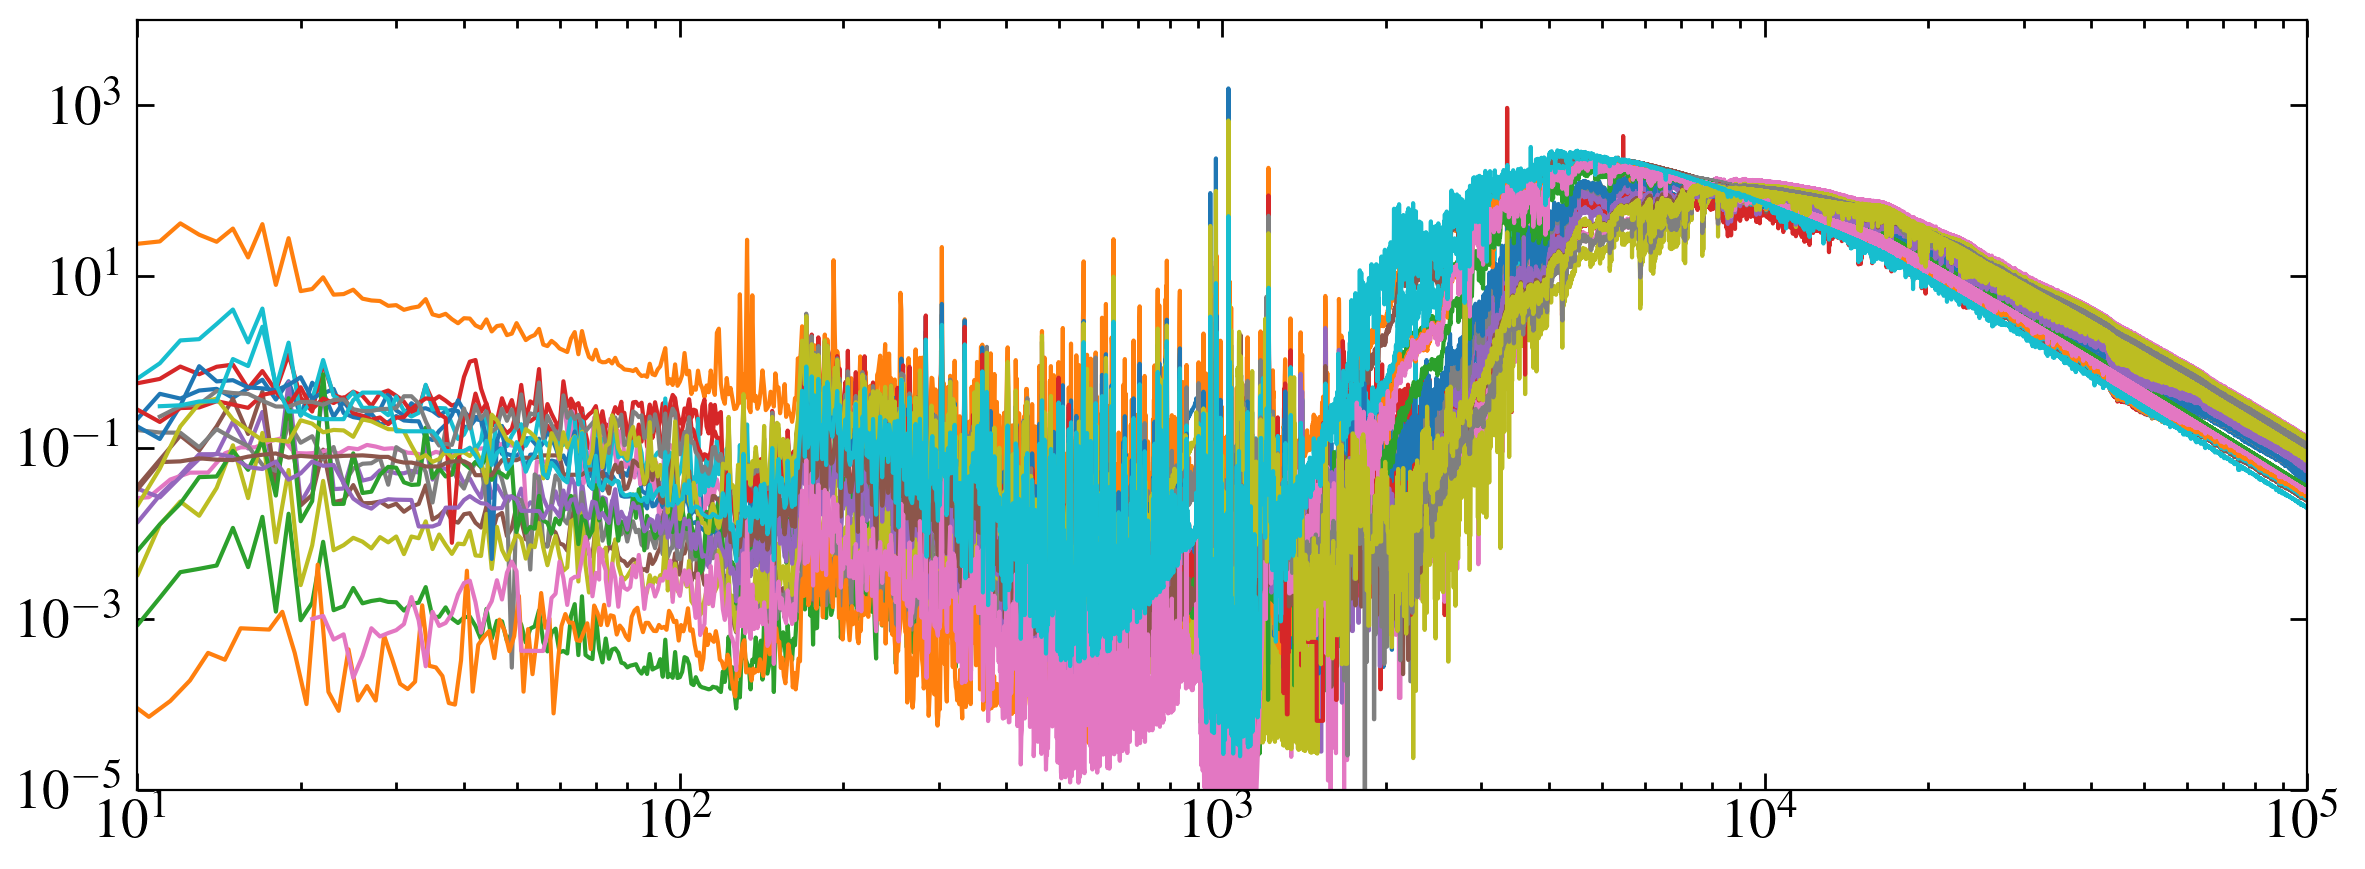

In [16]:
fig, ax = plt.subplots()

names = np.array([n.lower() for n in params['Name']])

names_done = []

for spec in plot_seds:
    
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
    star = star.lower().replace('_', ' ')
    if star == 'hd-120411':
        star  = 'hip 67522'
    print(star)
    names_done.append(star)
    ind = np.where(names == star)[0][0]
    # print(ind)
    row = params[ind]
    lum = ((row['Lbol (calculated)']*u.erg/u.s)/(const.L_sun.to(u.erg/u.s))).value
    eeid = 1*u.au * (lum**0.5)
    dstar = row['Dist (pc)']*u.pc
    scale = (dstar/(eeid.to(u.pc)))**2
    
    w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
    w, f = w[f >0], f[f>0]
    # w, f = w[w< 1e6], f[w < 1e6]

    ax.plot(w, f*scale)

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(1e-5, 1e4)
ax.set_xlim(10, 1e5)


gj 4102
k2-18
gj 367
toi-776
gj 341
toi-134
toi-260
toi-178
ngts-10
toi-836
k2-141
hats-72
toi-402
toi-421
wasp-63
hd 80606
kepler-51
hip 67522
wasp-166
wasp-121


(10, 100000.0)

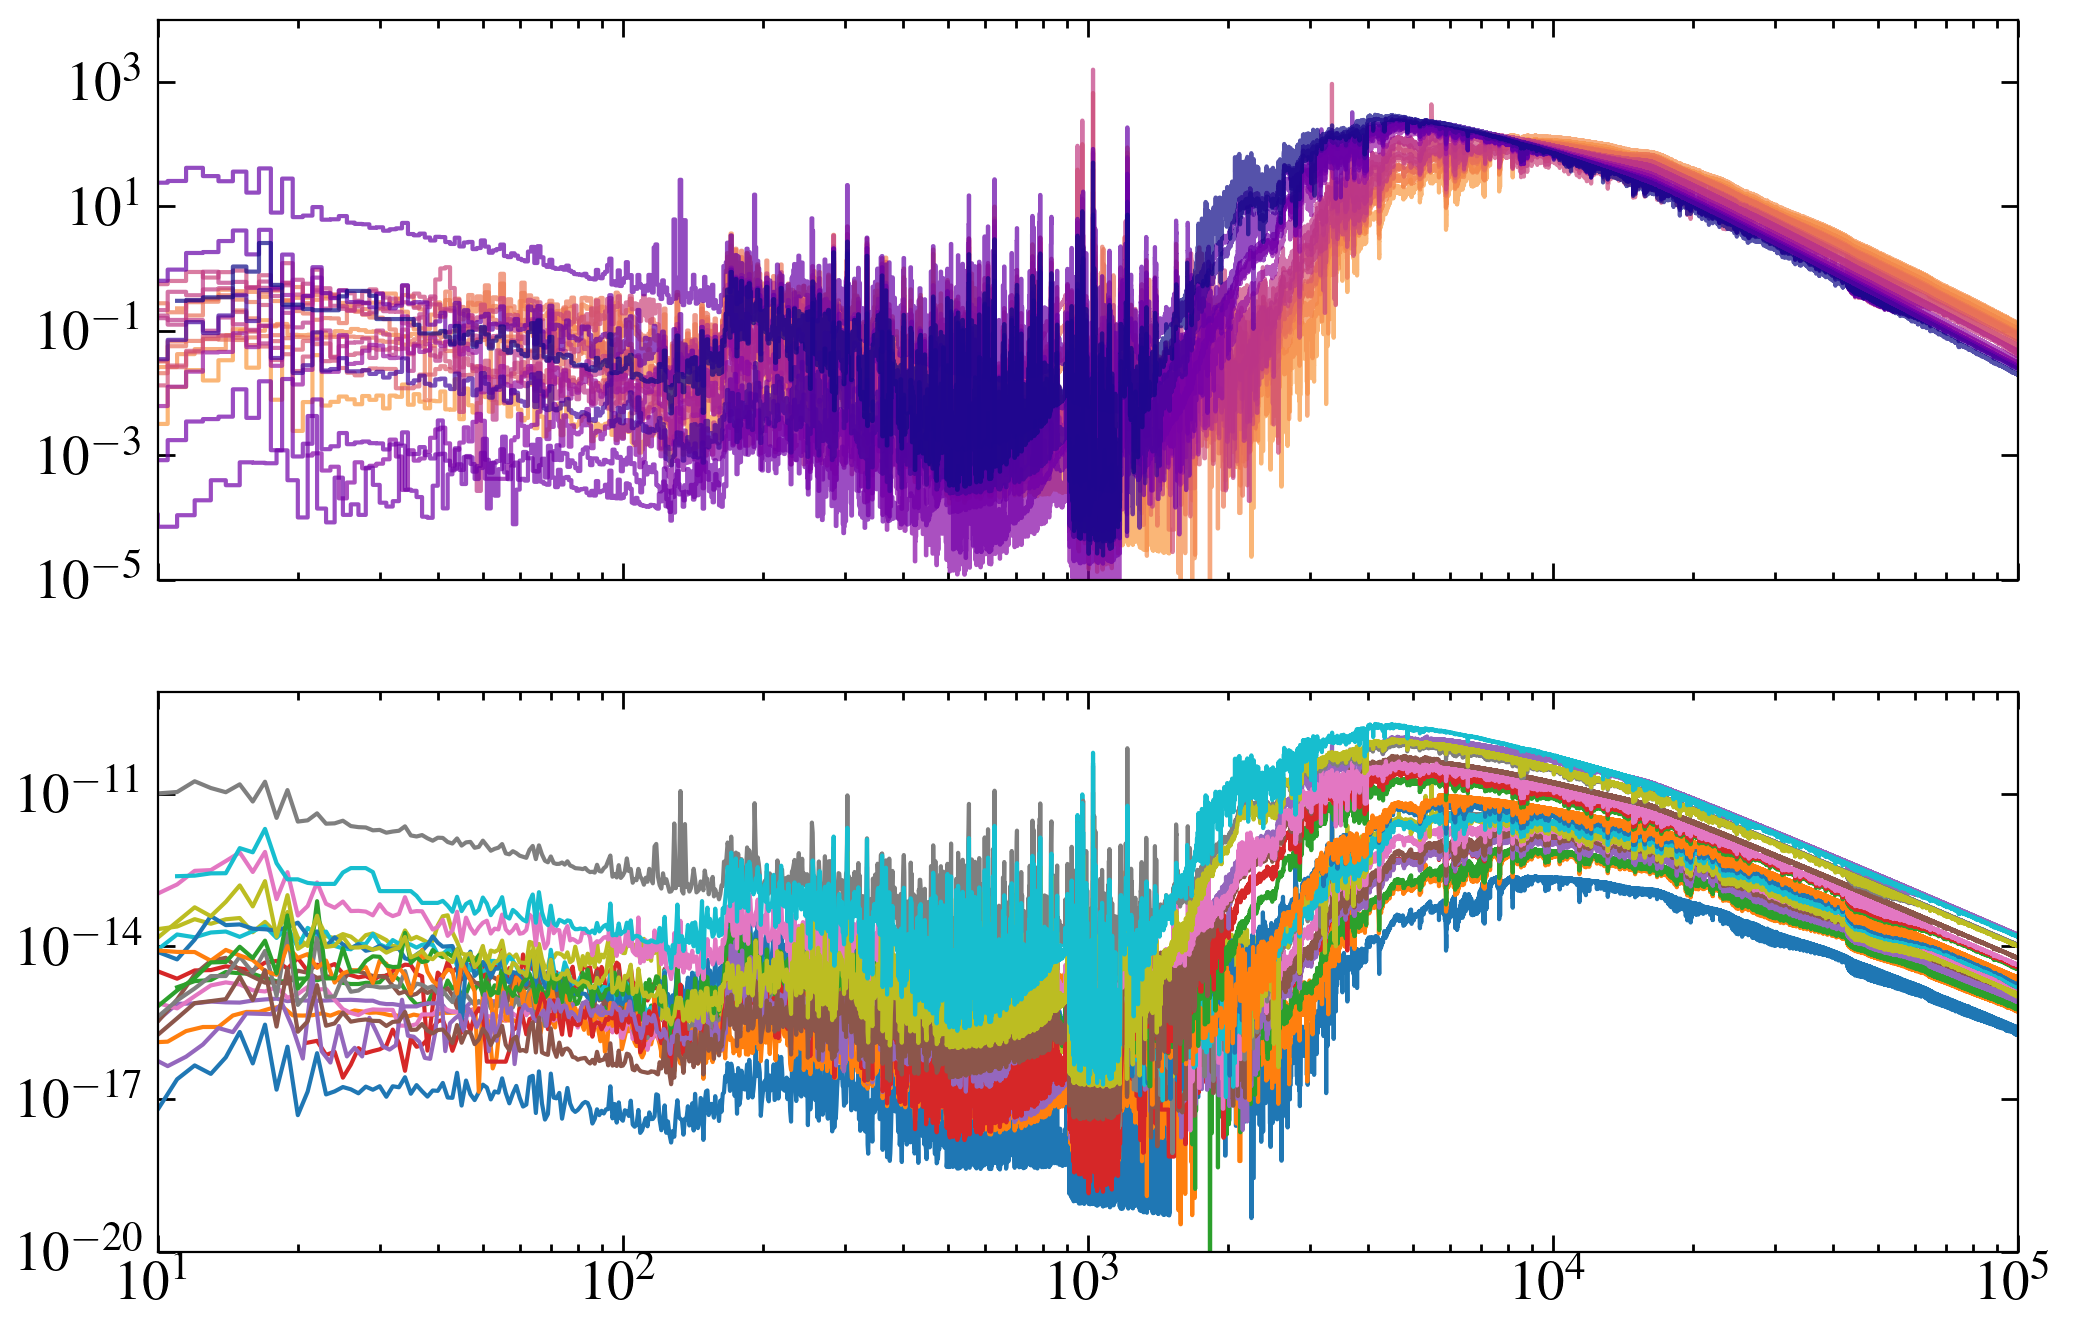

In [17]:
fig, axes = plt.subplots(nrows =2, sharex=True, figsize=(12, 8))

names = np.array([n.lower() for n in params['Name']])

ax = axes[0]
ax1= axes[1]

# cols = np.linspace(0, 0.9, len(seds_sort))[::-1]
# cols = ((teffs/max(teffs))*0.9)[::-1]

norm = plt.Normalize(vmin=min(teffs)-1000, vmax=max(teffs))


for i, spec in enumerate(seds_sort):


    
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
    star = star.lower().replace('_', ' ')
    if star == 'hd-120411':
        star  = 'hip 67522'
    print(star)
    ind = np.where(names == star)[0][0]
    # print(ind)
    row = params[ind]
    lum = ((row['Lbol (calculated)']*u.erg/u.s)/(const.L_sun.to(u.erg/u.s))).value
    eeid = 1*u.au * (lum**0.5)
    dstar = row['Dist (pc)']*u.pc
    scale = (dstar/(eeid.to(u.pc)))**2
    scale10 = (dstar/(10*u.pc))**2
    
    
    w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
    w, f = w[f >0], f[f>0]
    # w, f = w[w< 1e6], f[w < 1e6]

    # ax.step(w, f*scale, c=plt.cm.plasma(cols[i]), alpha=0.7, where='mid')
    ax.step(w, f*scale, c=plt.cm.plasma_r(norm(teffs[i])), alpha=0.7, where='mid')
    ax1.plot(w, f*scale10)

    

ax.set_yscale('log')
ax.set_xscale('log')

ax1.set_yscale('log')
ax1.set_xscale('log')

ax.set_ylim(1e-5, 1e4)
ax1.set_ylim(1e-20, 1e-9)
ax.set_xlim(10, 1e5)

# ax.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.plasma_r))



In [18]:
const.L_sun.to(u.erg/u.s)

<Quantity 3.828e+33 erg / s>

In [19]:
# params table
#name, spt, teff, radius, mass, prot, distance, av, refs
def make_unc_string(x, xu, xl):
    """
    Formats a parameter to latex with either a \pm or different upper and lower uncs.
    """
    if x == '--':
        return '--'
    elif xu != xl:
        return '${}^{{+{}}}_{{-{}}}$'.format(x, xu, xl)
    else:
        return '${}\pm{}$'.format(x, xl) 



for row in params:
    name = row['Name']
    spt = row['Sp Type']
    teff = make_unc_string(row['Teff (K)'], row['Teff uncertainty upper (K)'], row['Teff uncertainty lower (K)'])
    radius = make_unc_string(row['Radius (Rsun)'], row['Radius uncertainty upper'], row['Radius uncertainty lower'])
    mass = make_unc_string(row['Mass'], row['Mass uncertainty upper'], row['Mass uncertainty lower'])
    prot = make_unc_string(row['Prot (days)'], row['Prot Uncertainty Upper (days)'], row['Prot Uncertainty Lower (days)'])
    # distance = make_unc_string(row['Teff (K)'], row['Teff uncertainty upper (K)'], row['Teff uncertainty lower (K)'])
    distance = row['Dist (pc)']
    av = make_unc_string(row['AV (mag)'], row['AV uncertainty upper (mag)'], row['AV uncertainty lower (mag)'])
    

    line = '{} & {} & {} & {} & {} & {} & {} & {} & refs \\\\'.format(name, spt, teff, radius, mass, prot, distance, av)
    print(line)

for row in prox_params:
    name = row['Name']
    spt = row['Sp Type']
    teff = make_unc_string(row['Teff (K)'], row['Teff uncertainty upper (K)'], row['Teff uncertainty lower (K)'])
    radius = make_unc_string(row['Radius (Rsun)'], row['Radius uncertainty upper'], row['Radius uncertainty lower'])
    mass = make_unc_string(row['Mass'], row['Mass uncertainty upper'], row['Mass uncertainty lower'])
    prot = make_unc_string(row['Prot (days)'], row['Prot Uncertainty Upper (days)'], row['Prot Uncertainty Lower (days)'])
    # distance = make_unc_string(row['Teff (K)'], row['Teff uncertainty upper (K)'], row['Teff uncertainty lower (K)'])
    distance = row['Dist (pc)']
    av = make_unc_string(row['AV (mag)'], row['AV uncertainty upper (mag)'], row['AV uncertainty lower (mag)'])
    

    line = '{} & {} & {} & {} & {} & {} & {} & {} & refs \\\\'.format(name, spt, teff, radius, mass, prot, distance, av)
    print(line)

GJ 4102 & M3.5V & $3300^{+80}_{-30}$ & $0.2789\pm0.0014$ & $0.284\pm0.025$ & $79.32\pm0.0$ & 12.48 & $~0^{+0}_{-0.0}$ & refs \\
K2-18 & M2.5V & $3457\pm39$ & $0.411\pm0.038$ & $0.359\pm0.047$ & $38.6^{+0.6}_{-0.4}$ & 38.1 & $~0^{+0}_{-0.0}$ & refs \\
GJ 367 & M1 & $3522\pm70$ & $0.457\pm0.013$ & $0.454\pm0.011$ & $51.3\pm0.13$ & 9.42 & $~0^{+0}_{-0.0}$ & refs \\
TOI-776 & M1V & $3709\pm70$ & $0.538\pm0.024$ & $0.544\pm0.028$ & $0.0^{+30.0}_{-40.0}$ & 27.15 & $~0^{+0}_{-0.0}$ & refs \\
GJ 341 & M0 & $3770\pm40$ & $0.5066^{+0.0169}_{-0.0172}$ & $0.48\pm0.03$ & $0.0^{+7.9}_{-15.0}$ & 10.45 & $--\pm--$ & refs \\
TOI-134 & M1V & $3800\pm70$ & $0.6\pm0.022$ & $0.62\pm0.03$ & $29.8\pm1.3$ & 25.18 & $~0^{+0}_{-0.0}$ & refs \\
TOI-260 & M0V & $4111\pm171$ & $0.6182\pm0.0599$ & $--\pm--$ & $31.0\pm--$ & 20.21 & $--\pm--$ & refs \\
TOI-178 & mid/late K & $4316\pm70$ & $0.651\pm0.011$ & $0.65^{+0.027}_{-0.029}$ & $-36.0\pm0.0$ & 62.81 & $~0^{+0}_{-0.0}$ & refs \\
NGTS-10 & K5V & $4400\pm100$ & $0.

<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_8743/656630681.py:5: SyntaxWarning: invalid escape sequence '\p'
  Formats a parameter to latex with either a \pm or different upper and lower uncs.
/tmp/ipykernel_8743/656630681.py:12: SyntaxWarning: invalid escape sequence '\p'
  return '${}\pm{}$'.format(x, xl)


In [20]:
params.dtype.names

('Name',
 'Proxy',
 'Sp Type',
 'Rossby number',
 'Age (Gyr)',
 'Age Uncertianty Upper (Gyr)',
 'Age Uncertainty Lower (Gyr)',
 'Prot (days)',
 'Prot Uncertainty Upper (days)',
 'Prot Uncertainty Lower (days)',
 'AV (mag)',
 'AV uncertainty upper (mag)',
 'AV uncertainty lower (mag)',
 'Parallax (mas)',
 'Dist (pc)',
 'Teff (K)',
 'Teff uncertainty upper (K)',
 'Teff uncertainty lower (K)',
 'log g',
 'log g uncertainty upper',
 'log g uncertainty lower',
 'Radius (Rsun)',
 'Radius uncertainty upper',
 'Radius uncertainty lower',
 'Mass',
 'Mass uncertainty upper',
 'Mass uncertainty lower',
 'Lbol (calculated)',
 'Prot reference',
 'AV reference',
 'Teff reference',
 'log g reference',
 'Radius reference',
 'Mass reference',
 'Age reference')

In [21]:
# planets_table = Table.read('../planet_params/PS_2025.01.22_16.04.15.csv', format='csv', comment='#')
planets_table = Table.read('../planet_params/PS_2025.06.03_13.15.25.csv', format='csv', comment='#')

In [22]:
len(np.unique(planets_table['hostname']))

20

In [23]:
np.unique(planets_table['hostname'])

<Column name='hostname' dtype='str9' length=20>
   GJ 341
   GJ 367
  HATS-72
 HD 15337
 HD 80606
HIP 67522
   K2-141
    K2-18
Kepler-51
  L 168-9
  LHS 475
  NGTS-10
  TOI-178
  TOI-260
  TOI-421
  TOI-776
  TOI-836
 WASP-121
 WASP-166
  WASP-63

GJ 341 b  is only a candidate
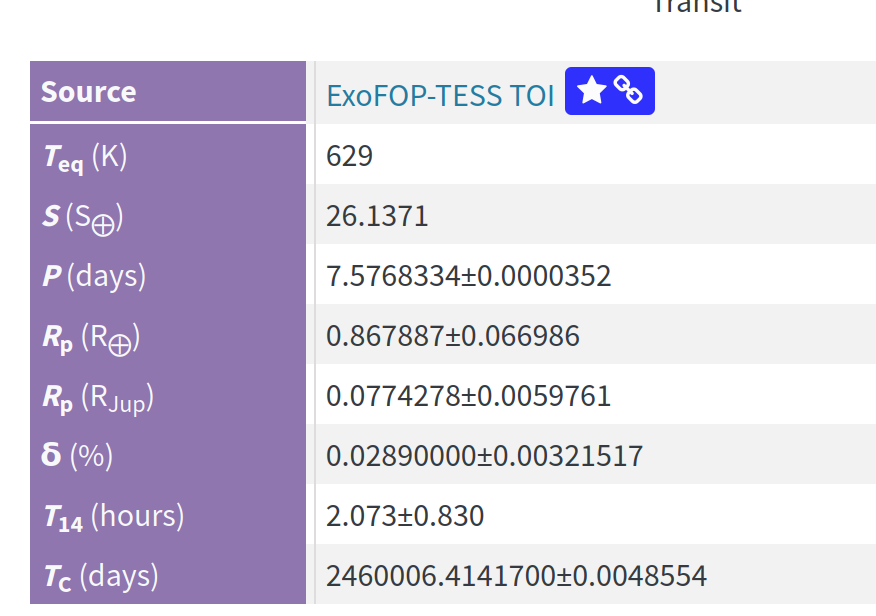

In [24]:
planets_table.dtype.names

('pl_name',
 'hostname',
 'default_flag',
 'sy_snum',
 'sy_pnum',
 'discoverymethod',
 'disc_year',
 'disc_facility',
 'soltype',
 'pl_controv_flag',
 'pl_refname',
 'pl_orbper',
 'pl_orbpererr1',
 'pl_orbpererr2',
 'pl_orbperlim',
 'pl_orbsmax',
 'pl_orbsmaxerr1',
 'pl_orbsmaxerr2',
 'pl_orbsmaxlim',
 'pl_rade',
 'pl_radeerr1',
 'pl_radeerr2',
 'pl_radelim',
 'pl_radj',
 'pl_radjerr1',
 'pl_radjerr2',
 'pl_radjlim',
 'pl_bmasse',
 'pl_bmasseerr1',
 'pl_bmasseerr2',
 'pl_bmasselim',
 'pl_bmassj',
 'pl_bmassjerr1',
 'pl_bmassjerr2',
 'pl_bmassjlim',
 'pl_bmassprov',
 'pl_orbeccen',
 'pl_orbeccenerr1',
 'pl_orbeccenerr2',
 'pl_orbeccenlim',
 'pl_insol',
 'pl_insolerr1',
 'pl_insolerr2',
 'pl_insollim',
 'pl_eqt',
 'pl_eqterr1',
 'pl_eqterr2',
 'pl_eqtlim',
 'ttv_flag',
 'st_refname',
 'st_spectype',
 'st_teff',
 'st_tefferr1',
 'st_tefferr2',
 'st_tefflim',
 'st_rad',
 'st_raderr1',
 'st_raderr2',
 'st_radlim',
 'st_mass',
 'st_masserr1',
 'st_masserr2',
 'st_masslim',
 'st_met',
 'st_me

In [25]:
planetmr = Table.read('cosmic_shoreline.csv')

In [26]:
#a, p, mp, rp

planets = np.unique(planets_table['pl_name'])
planet_hosts = []
planet_mass = []
planet_radius = []
planet_period = []
planet_a = []

def find_a(mstar, pplanet):
    """
    Mstar in M_Sun, pplanet in d
    """
    a = (((const.G * mstar*const.M_sun)/(4*np.pi**2))*((pplanet*u.d).to(u.s))**2)**(1/3)
    return a.to(u.au).value

for planet in planets:
    mask = planets_table['pl_name'] == planet
    pl_tab = planets_table[mask]
    # mask = (pl_tab['pl_bmasse'] > 0) & (pl_tab['pl_rade'] > 0) & (pl_tab['pl_orbper'] > 0) & (pl_tab['pl_orbsmax'] > 0)
    # mask = (pl_tab['pl_bmasse'] > 0) & (pl_tab['pl_rade'] > 0) & (pl_tab['pl_orbper'] > 0)# & (pl_tab['pl_orbsmax'] > 0)
    # mask =  (pl_tab['pl_rade'] > 0) & (pl_tab['pl_orbper'] > 0)# & (pl_tab['pl_orbsmax'] > 0)
    mask = (pl_tab['pl_orbper'] >0)# & (pl_tab['pl_rade'] >0) & (pl_tab['pl_bmasse'] >0) 
    pl_tab = pl_tab[mask]
    if len(pl_tab) == 0:
        mask = (pl_tab['pl_orbper'] >0) & (pl_tab['pl_rade'] >0) 
        pl_tab = pl_tab[mask]
    
    
    # if len(pl_tab) > 0:
    recent = np.argmax(pl_tab['pl_pubdate'])
    pl_tab = pl_tab[recent]
    planet_hosts.append(pl_tab['hostname'])
    planet_mass.append(pl_tab['pl_bmasse'])
    planet_radius.append(pl_tab['pl_rade'])
    planet_period.append(pl_tab['pl_orbper'])
    if pl_tab['pl_orbsmax'] > 0:
        a = pl_tab['pl_orbsmax']
        # planet_a.append(pl_tab['pl_orbsmax'])
    else:
        a = find_a(pl_tab['st_mass'], pl_tab['pl_orbper'])
    planet_a.append(a)
    
# else: 
    print(planet, a)
print(planet_a)



planet_hosts = np.array(planet_hosts)
planet_mass = np.array(planet_mass)
planet_radius = np.array(planet_radius)
planet_period = np.array(planet_period)
planet_a = np.array(planet_a)

GJ 341 b 0.05911181617432836
GJ 367 b 0.00709
GJ 367 c 0.07682340699914948
GJ 367 d 0.15911682768140456
HATS-72 b 0.06651428992726445
HD 15337 b 0.051993126026262465
HD 15337 c 0.12240820608741167
HD 80606 b 0.4602
HIP 67522 b 0.0747
HIP 67522 c 0.1228
K2-141 b 0.00747
K2-141 c 0.0683
K2-18 b 0.1591
K2-18 c 0.06
Kepler-51 b 0.24214674751437681
Kepler-51 c 0.37007974249800235
Kepler-51 d 0.49048908356953924
Kepler-51 e 0.7950700131902536
L 168-9 b 0.0208
LHS 475 b 0.02037
NGTS-10 b 0.0143
TOI-178 b 0.02607
TOI-178 c 0.037
TOI-178 d 0.0592
TOI-178 e 0.0783
TOI-178 f 0.1039
TOI-178 g 0.1275
TOI-260 b 0.091
TOI-421 b 0.0554
TOI-421 c 0.117
TOI-776 b 0.0653
TOI-776 c 0.1001
TOI-836 b 0.0422
TOI-836 c 0.075
WASP-121 b 0.025450130780204135
WASP-166 b 0.06417577231847621
WASP-63 b 0.05745329709231503
[np.float64(0.05911181617432836), np.float64(0.00709), np.float64(0.07682340699914948), np.float64(0.15911682768140456), np.float64(0.06651428992726445), np.float64(0.051993126026262465), np.float

/tmp/ipykernel_8743/3932744050.py:51: UserWarning: Warning: converting a masked element to nan.
  planet_mass = np.array(planet_mass)
/tmp/ipykernel_8743/3932744050.py:52: UserWarning: Warning: converting a masked element to nan.
  planet_radius = np.array(planet_radius)


In [27]:
const.M_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Solar mass' value=1.988409870698051e+30 uncertainty=4.468805426856864e+25 unit='kg' reference='IAU 2015 Resolution B 3 + CODATA 2018'>

In [28]:
mask = [planet[-1] == 'b' for planet in planets]
planet_b_a = np.array(planet_a)[mask]


for i , planet in enumerate(planet_b_a):
    print(np.array(planet_hosts)[mask][i], planet)

# print(planet_b_a, np.array(planet_hosts)[mask])
print(names_done)

print('gj 367', find_a(0.47, 7.5768334)) #gj367
print('toi-402', find_a(0.829, 4.7559804)) #gj367


GJ 341 0.05911181617432836
GJ 367 0.00709
HATS-72 0.06651428992726445
HD 15337 0.051993126026262465
HD 80606 0.4602
HIP 67522 0.0747
K2-141 0.00747
K2-18 0.1591
Kepler-51 0.24214674751437681
L 168-9 0.0208
LHS 475 0.02037
NGTS-10 0.0143
TOI-178 0.02607
TOI-260 0.091
TOI-421 0.0554
TOI-776 0.0653
TOI-836 0.0422
WASP-121 0.025450130780204135
WASP-166 0.06417577231847621
WASP-63 0.05745329709231503
['toi-836', 'hip 67522', 'hd 80606', 'ngts-10', 'toi-178', 'wasp-166', 'k2-18', 'hats-72', 'gj 4102', 'kepler-51', 'k2-141', 'wasp-63', 'toi-402', 'toi-776', 'toi-260', 'gj 341', 'toi-421', 'gj 367', 'toi-134', 'wasp-121']
gj 367 0.05869829592452165
toi-402 0.051993126026262465


In [29]:
# planet_as_temp = [0.0422,0.0748,0.06417577231847622,0.1591,0.2448,0.05745,0.051993126026262465,0.0943, 0.0653,0.058698,0.0554,0.00709,0.0208,0.0254]

# semi major axis for SEDS done as of 20250219

gj 4102
k2-18
gj 367
toi-776
gj 341
toi-134
toi-260
toi-178
ngts-10


<>:69: SyntaxWarning: invalid escape sequence '\A'
<>:70: SyntaxWarning: invalid escape sequence '\A'
<>:72: SyntaxWarning: invalid escape sequence '\m'
<>:69: SyntaxWarning: invalid escape sequence '\A'
<>:70: SyntaxWarning: invalid escape sequence '\A'
<>:72: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_8743/2521364969.py:69: SyntaxWarning: invalid escape sequence '\A'
  bigax.set_ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25, labelpad=25)
/tmp/ipykernel_8743/2521364969.py:70: SyntaxWarning: invalid escape sequence '\A'
  bigax.set_xlabel('Wavelength (\AA)', size=25)
/tmp/ipykernel_8743/2521364969.py:72: SyntaxWarning: invalid escape sequence '\m'
  fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.plasma_r),ax=ax, label='$T_{\mathrm{eff}}$ (K)', pad=0.05)


toi-836
k2-141
hats-72
toi-402
toi-421
wasp-63
hd 80606
kepler-51
hip 67522
wasp-166
wasp-121


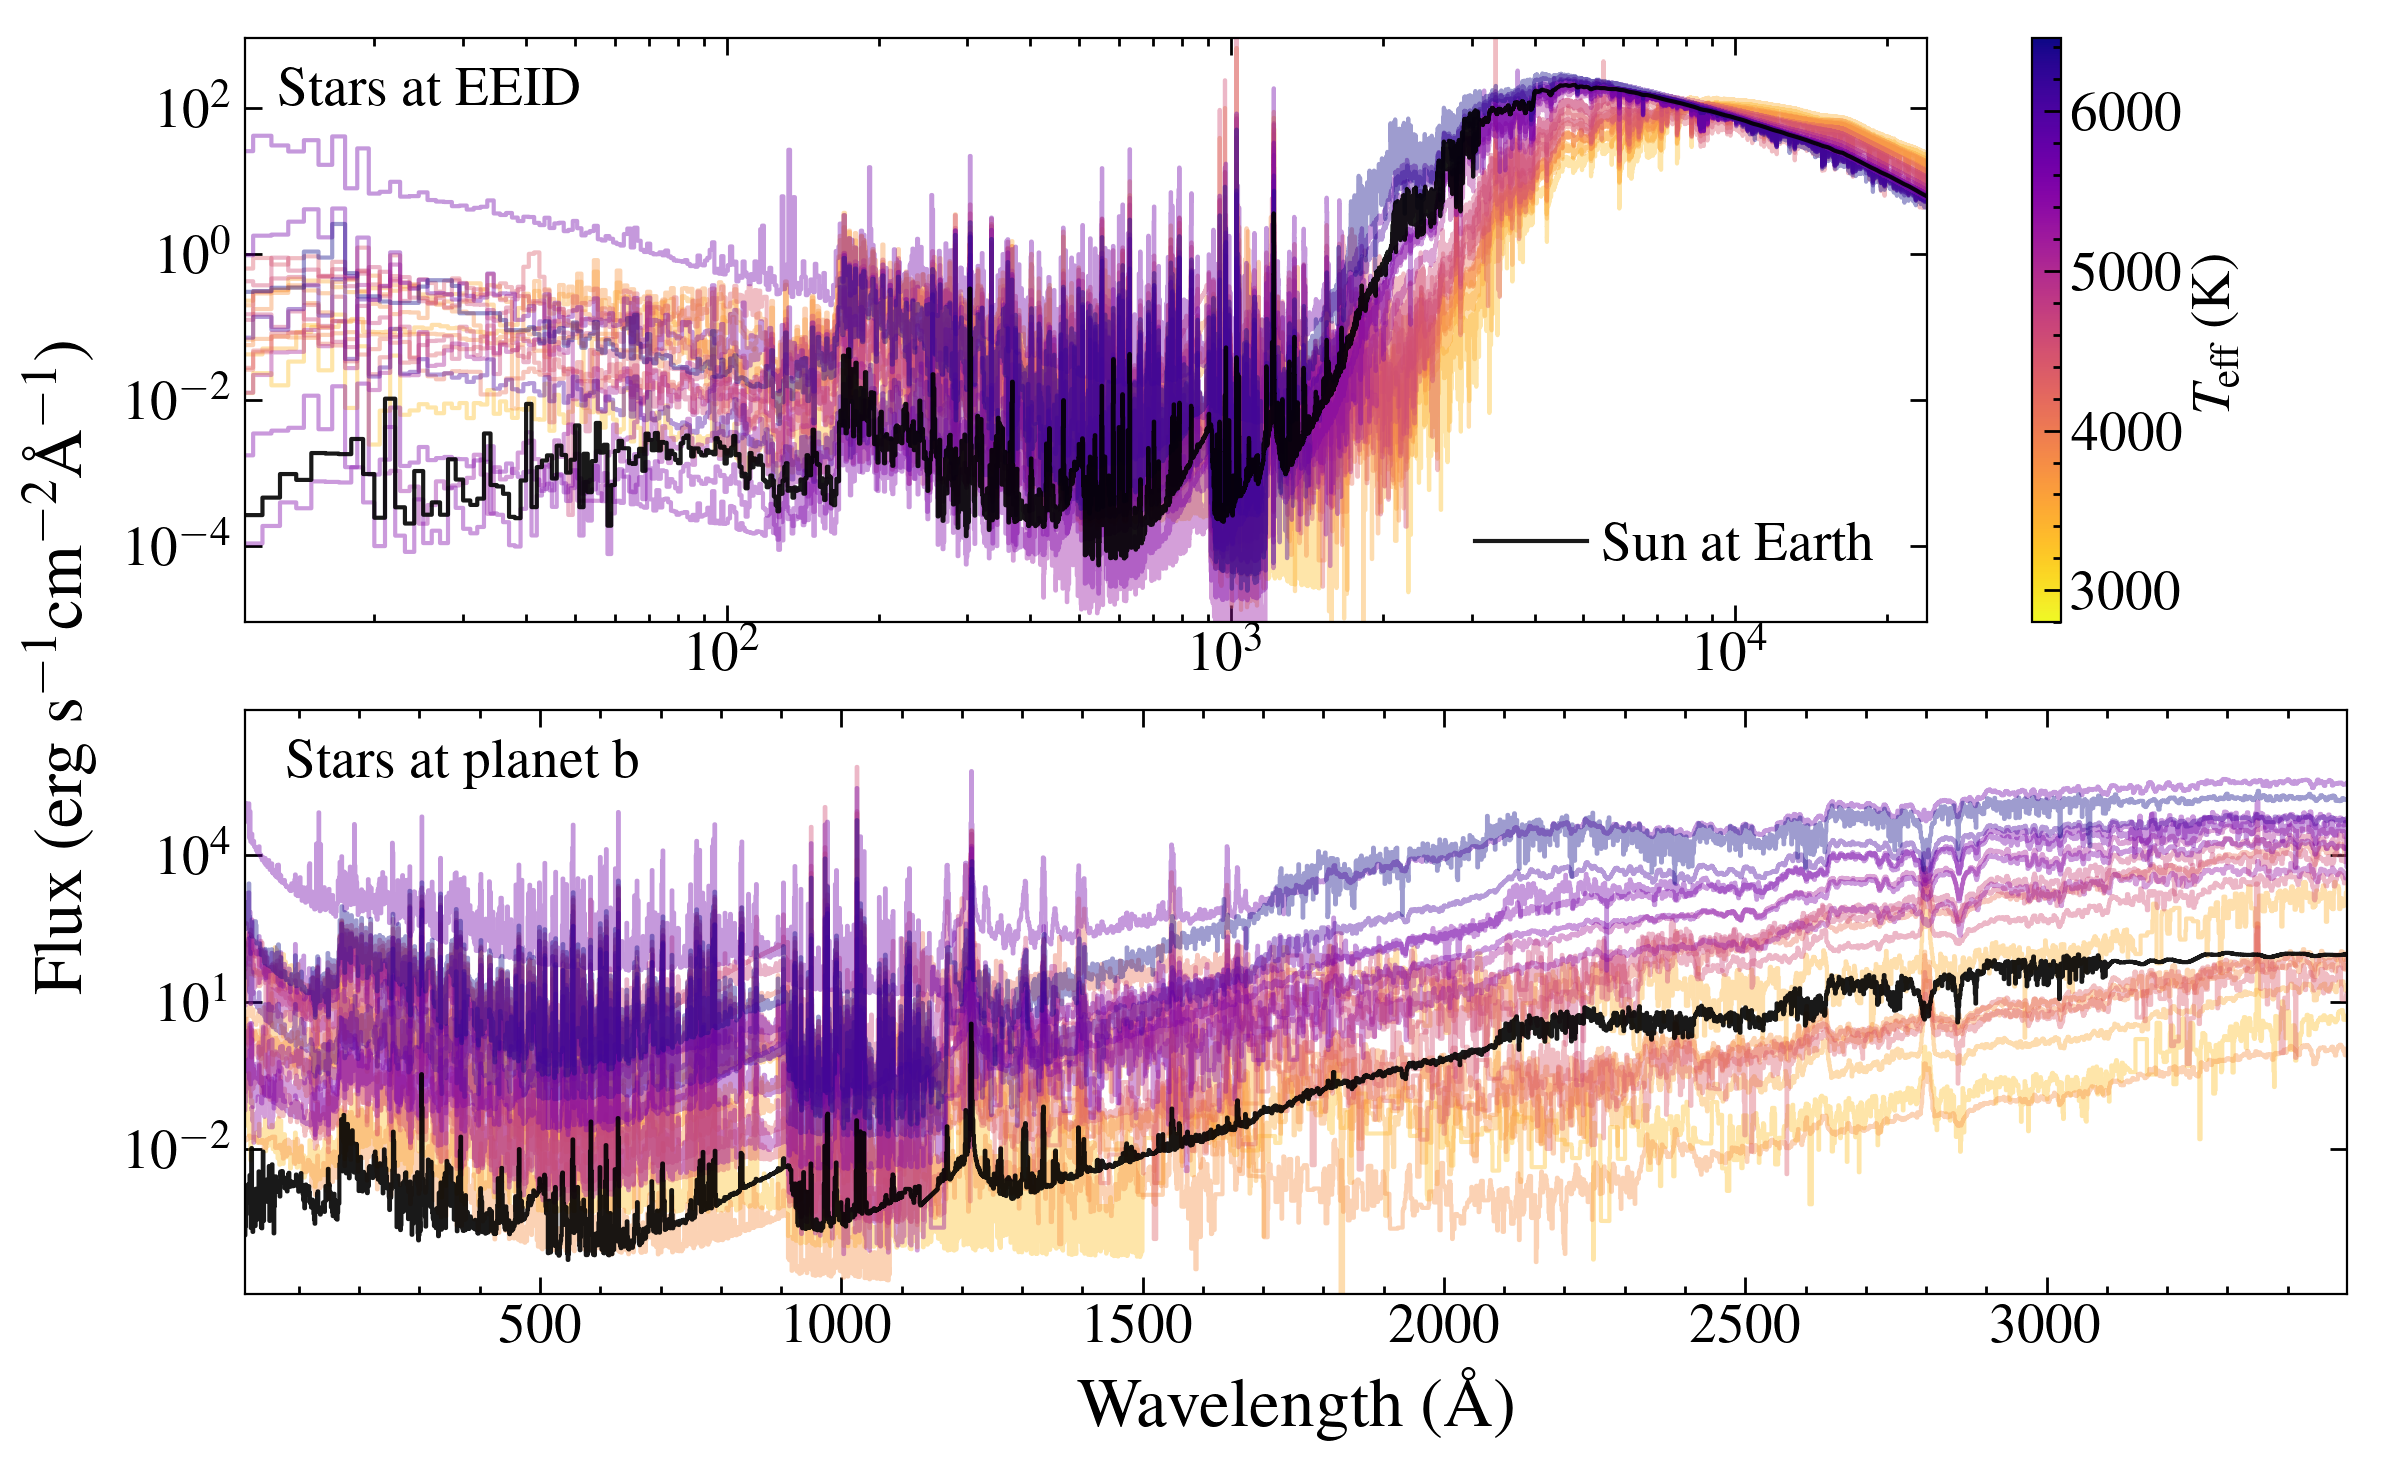

In [30]:
# fig, axes = plt.subplots(nrows =2, sharex=True, figsize=(14, 8))
fig, axes = plt.subplots(nrows =2, figsize=(13, 8))

names = np.array([n.lower() for n in params['Name']])

ax = axes[0]
ax1= axes[1]

# cols = np.linspace(0, 0.9, len(seds_sort))[::-1]
# cols = ((teffs/max(teffs))*0.9)[::-1]

norm = plt.Normalize(vmin=min(teffs)-500, vmax=max(teffs))


for i, spec in enumerate(seds_sort):


    
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
    star = star.lower().replace('_', ' ')
    if star == 'hd-120411':
        star  = 'hip 67522'
    print(star)
    ind = np.where(names == star)[0][0]
    # print(ind)
    row = params[ind]
    lum = ((row['Lbol (calculated)']*u.erg/u.s)/(const.L_sun.to(u.erg/u.s))).value
    eeid = 1*u.au * (lum**0.5)
    dstar = row['Dist (pc)']*u.pc
    scale = (dstar/(eeid.to(u.pc)))**2
    a_planet_b = planet_b_a[i] 
    # scale10 = (dstar/(10*u.pc))**2
    scale_planetb = (dstar/((a_planet_b*u.au).to(u.pc)))**2
    
    
    w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
    w, f = w[f >0], f[f>0]
    # w, f = w[w< 1e6], f[w < 1e6]

    # ax.step(w, f*scale, c=plt.cm.plasma(cols[i]), alpha=0.7, where='mid')
    ax.step(w, f*scale, c=plt.cm.plasma_r(norm(teffs[i])), alpha=0.4, where='mid')
    ax1.step(w, f*scale_planetb, c=plt.cm.plasma_r(norm(teffs[i])), alpha=0.4, where='mid')

ax.step(sw, sf, c='k', alpha=0.9, label = 'Sun at Earth', where='mid')
ax1.step(sw, sf, c='k',alpha=0.9, label = 'Sun', where='mid')
# ax.annotate('Stars at EEID', (0.98, 0.05), xycoords='axes fraction', va='bottom', ha='right')
# ax1.annotate('Stars at planet b', (0.98, 0.05), xycoords='axes fraction', va='bottom', ha='right')

ax.annotate('Stars at EEID', (0.02, 0.95), xycoords='axes fraction', va='top', ha='left')
ax1.annotate('Stars at planet b', (0.02, 0.95), xycoords='axes fraction', va='top', ha='left')
    

ax.set_yscale('log')
ax.set_xscale('log')

ax1.set_yscale('log')
# ax1.set_xscale('log')

ax.set_ylim(9.1e-6, 9.1e2)
ax1.set_ylim(1.1e-5, 9.1e6)
ax.set_xlim(11.1, sw[-1])
ax1.set_xlim(11.1, 3499)

ax.legend(loc=4)

bigax = fig.add_subplot(111, frame_on=False)
bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
bigax.set_ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25, labelpad=25)
bigax.set_xlabel('Wavelength (\AA)', size=25)

fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.plasma_r),ax=ax, label='$T_{\mathrm{eff}}$ (K)', pad=0.05)
# fig.colorbar(norm, ax=ax1)

fig.tight_layout()
fig.subplots_adjust(hspace=0.15)

fig.savefig('../plots/stars_eeid_planet_b.pdf')
fig.savefig('../plots/pngs/stars_eeid_planet_b.png',facecolor='w')


In [31]:
xrays = glob.glob('../draft_hlsp/*/*epic*.fits')
for x in xrays:
    data = fits.getdata(x, 1)
    print(data['WAVELENGTH'][-1])

58.668915
9.3
9.3
48.37098
40.11478
55.925232
70.20434
73.48241
34.69384
56.56202
40.42364


Making an example split plot for Dolon

In [32]:
# xs = np.arange(100) #making some fake data
# ys = np.random.random(100)

# fig, axes = plt.subplots(ncols=3, sharey = True) #making a plot with three subplots that we'll combine
# # fig, axes = plt.subplot_mosaic([[0, 1, 1]], sharey =True) #use this one for more complicated subplots; in this case a plot where the first planel is half the width of the second  

# axes[0].set_ylim(-0.09, 1.09) # should only need to set the ylims on the first subplot because sharey = True
# axes[0].set_xlim(2.1, 11.9) #setting up the ranges that the plots will cover
# axes[1].set_xlim(34.1, 54.9)
# axes[2].set_xlim(76.1, 92.9)

# #setting up the slanted lines
# d = 1.  # proportion of vertical to horizontal extent of the slanted line
# kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
#               linestyle="none", color='k', mec='k', mew=1, clip_on=False)

# for i in range(len(axes)):
    
#     axes[i].scatter(xs, ys, edgecolor='k') #add the points to each plot
    
#     if i > 0: #turn off yticks for everything except the first plot
#         axes[i].yaxis.set_tick_params(labelleft=False)
    

    
#     if i != len(axes)-1: #do these things for every subplot exept the last
#         axes[i].spines.right.set_visible(False) #turn off right ax
#         axes[i].tick_params(right = False, which='both') #turn off right ticks
#         axes[i].plot([1, 1], [0, 1], transform=axes[i].transAxes, **kwargs) #add the slanted line to the right corners
   
#     if i > 0: #do these things for every subplot except the first
#         axes[i].spines.left.set_visible(False) #as for the last loop but for the left
#         axes[i].tick_params(left = False, which='both')
#         axes[i].plot([0, 0], [1, 0], transform=axes[i].transAxes, **kwargs)
        
# #add a frame that goes around all the subplots to add the labels       
# bigax = fig.add_subplot(111, frame_on=False)
# bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# bigax.set_ylabel('Y label', labelpad=15) #change labelpad if the label is overlapping the tick labels
# bigax.set_xlabel('X label')
# bigax.set_title('Example plot with the slanted lines', pad =15) 

# fig.tight_layout()
# fig.subplots_adjust(wspace=0.05) #change the gap in between the subplots





In [33]:
print(([0.1, 10]*u.keV).to(u.AA, equivalencies=u.spectral()))


[123.98419843   1.23984198] Angstrom


In [34]:
#trappist-1 ratio
moons = (1.017, 1.156, 0.297,0.772, 0.934,1.148, 0.331)*u.M_earth
m_star = 0.0898*u.M_sun

print(np.sum(moons).to(u.M_sun)/m_star)

#bds
print((1e-4*13*u.M_jup).to(u.M_earth))


0.00018913955754734115
0.41317692857307725 earthMass


Plot of all spectral types in MUSCLES +

In [92]:
spt_table = Table.read('../misc_data/spectral_types_collection.csv')

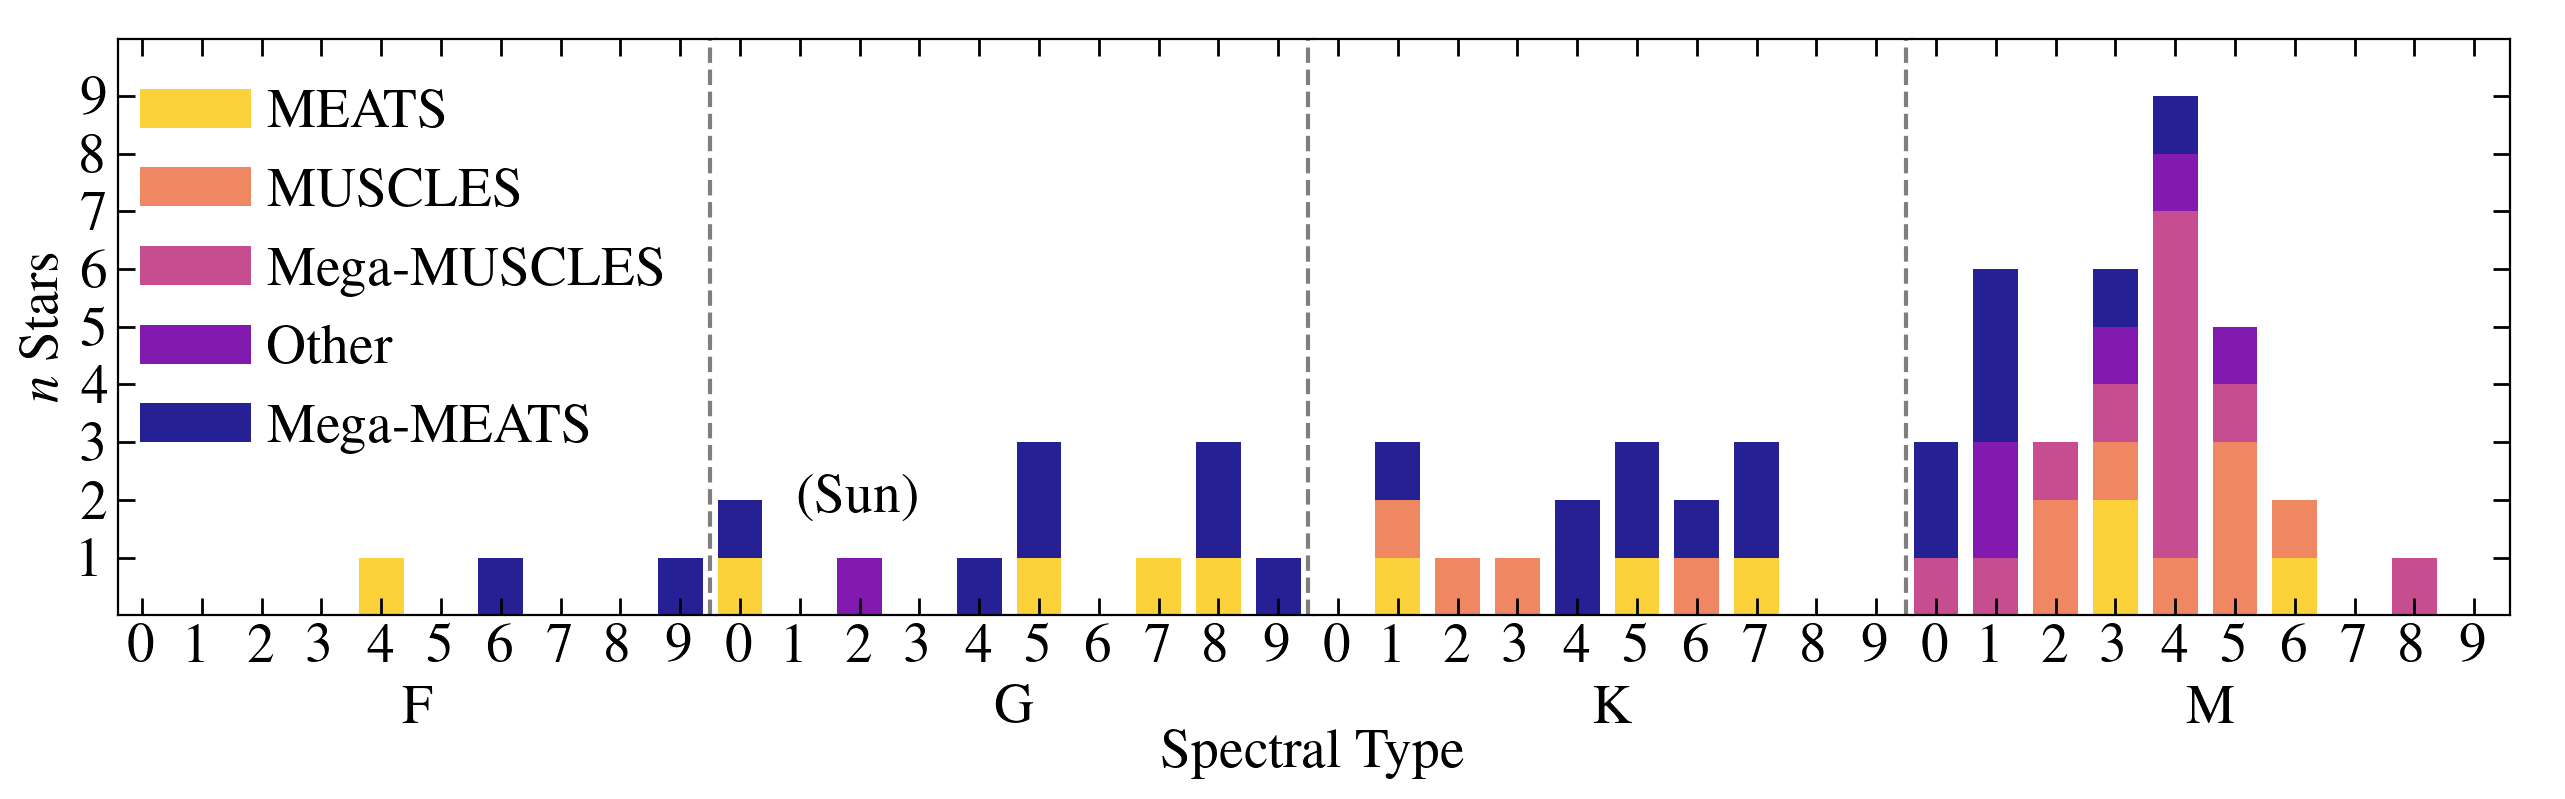

In [99]:
spts = spt_table['Spt']
for i in range(len(spts)):
    # print(spts[i])
    if spts[i][-2:] == '.5':
        num = int(spts[i][1])+1
        spts[i] = spts[i][0]+str(num)
        # print('new', spts[i])

# surveys = np.unique(np.array(spt_table['Survey']))
# print(surveys)
surveys = ['MEATS','MUSCLES','Mega-MUSCLES','Other','Mega-MEATS'] #putting mMeats on top
spt_letters = ['F', 'G', 'K', 'M']
spt_numbers = np.arange(0, 10, 1)

fig, axes = plt.subplots(ncols = 4, sharey=True, figsize=(13, 4))
width =0.75
blank_list = np.zeros(10)
ncols = np.linspace(0, 0.9, (len(surveys)))[::-1]
# print(blank_list)
for i, letter in enumerate(spt_letters):
    # print(letter)
    nstars = {}
    
    for survey in surveys:
        nstars[survey] = np.copy(blank_list)
    # print(nstars)
    for row in spt_table:
        sptletter, sptnumber, sv = row['Spt'][0], int(row['Spt'][1]), row['Survey']
        # print(sptletter, sptnumber, survey)
        if sptletter == letter:
            # print('yes')
            nstars[sv][sptnumber] +=1
    # print(nstars)
    ax = axes[i]
    bottom = np.copy(blank_list)
    n = 0
    for survey, num in nstars.items():
        # p = ax.bar(spt_numbers, num, width, label=survey, bottom=bottom, alpha=0.9)
        p = ax.bar(spt_numbers, num, width, label=survey, bottom=bottom, alpha=0.9, color= plt.cm.plasma(ncols[n]))
        bottom += num
        n+=1

    ax.set_xticks(spt_numbers)
    ax.minorticks_off()
    ax.set_xlabel(letter)

    
    
    if i != len(axes)-1: #do these things for every subplot exept the last
        axes[i].spines.right.set_visible(False) #turn off right ax
        axes[i].tick_params(right = False, which='both') #turn off right ticks
        # axes[i].plot([1, 1], [0, 1], transform=axes[i].transAxes, **kwargs) #add the slanted line to the right corners
   
    if i > 0: #do these things for every subplot except the first
        axes[i].spines.left.set_visible(False) #as for the last loop but for thethis afernoon left
        axes[i].tick_params(left = False, which='both')
        # axes[i].plot([0, 0], [1, 0], transform=axes[i].transAxes, **kwargs)
    ax.set_xlim(-0.4, 9.6)
    
    # ax.axvline(9.49, ymin=-0.2, ymax=0.0 )
    if i < 3:
        ax.axvline(9.5, ls='--', c='k', alpha=0.5)

axes[0].set_ylim(0.01, 9.99)
axes[0].set_ylabel('$n$ Stars')
axes[0].legend(loc=1)
# axes[0].legend(loc='upper left', bbox_to_anchor=(0.001, 0.99))
axes[0].set_yticks(np.arange(1, 10, 1))

axes[1].annotate('(Sun)', (2, 2), va='center', ha='center')

bigax = fig.add_subplot(111, frame_on=False)
bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# bigax.set_ylabel('Y label', labelpad=15) #change labelpad if the label iloc='upper right', bbox_to_anchor=(0.5, 0.5)s overlapping the tick labels
bigax.set_xlabel('Spectral Type', labelpad=20)
# bigax.set_title('Example plot with the slanted lines', pad =15) 



# fig.tight_layout()
fig.subplots_adjust(wspace=0, right=0.97, top=0.97, bottom=0.25, left=0.05)

fig.savefig('../plots/spectral_type_numbers.pdf')
fig.savefig('../plots/pngs/spectral_type_numbers.png')

In [37]:
0.02/3.1

0.0064516129032258064

In [38]:
# from specutils import Spectrum1D


How hard would an instantanious cosmic shoreline be? Complicated and not really relavent (they're all gas giants). Have been convinced that it is relevant actually (compare with atmospheric escape). Complile a table.

GJ 4102
[nan] [0.975]
[<Quantity nan m / s>]
K2-18
[8.63 7.51] [2.61  nan]
[<Quantity 20329.34307685 m / s>, <Quantity nan m / s>]
GJ 367
[0.633 4.13  6.03 ] [0.699   nan   nan]
[<Quantity 10639.01614646 m / s>, <Quantity nan m / s>, <Quantity nan m / s>]
TOI-776
[5.  6.9] [1.798 2.047]
[<Quantity 18643.53916193 m / s>, <Quantity 20525.9763845 m / s>]
GJ 341
[4.] [0.88]
[<Quantity 23835.64235959 m / s>]
TOI-134
[] []
[]
TOI-260
[3.3] [1.47291596]
[<Quantity 16734.2474558 m / s>]
TOI-178
[1.5  4.77 3.01 3.86 7.72 3.94] [1.152 1.669 2.572 2.207 2.287 2.87 ]
[<Quantity 12757.26540712 m / s>, <Quantity 18900.32282022 m / s>, <Quantity 12094.44563082 m / s>, <Quantity 14785.31857644 m / s>, <Quantity 20540.63042833 m / s>, <Quantity 13099.21780672 m / s>]


/tmp/ipykernel_8743/4094580935.py:61: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  xuv = np.trapz(f[xuvmask], w[xuvmask])
/tmp/ipykernel_8743/4094580935.py:64: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(vescs[j]/1000, xuv*scale_planet[j], c=plt.cm.plasma_r(norm(teffs[i])))


NGTS-10
[687.14846] [13.506845]
[<Quantity 79741.89123429 m / s>]
toi-836
[] []
[]
K2-141
[4.97 8.  ] [1.51 7.  ]
[<Quantity 20282.8006213 m / s>, <Quantity 11951.82359177 m / s>]
HATS-72
[nan] [nan]
[<Quantity nan m / s>]
TOI-402
[] []
[]
TOI-421
[ 6.7 14.1] [2.64 5.09]
[<Quantity 17810.39858447 m / s>, <Quantity 18607.53592002 m / s>]
WASP-63
[nan] [nan]
[<Quantity nan m / s>]
HD 80606
[1322.16617312] [nan]
[<Quantity nan m / s>]
kepler-51
[] []
[]
HIP 67522
[nan nan] [9.763      7.93595834]
[<Quantity nan m / s>, <Quantity nan m / s>]
WASP-166
[nan] [nan]
[<Quantity nan m / s>]
WASP-121
[nan] [nan]
[<Quantity nan m / s>]


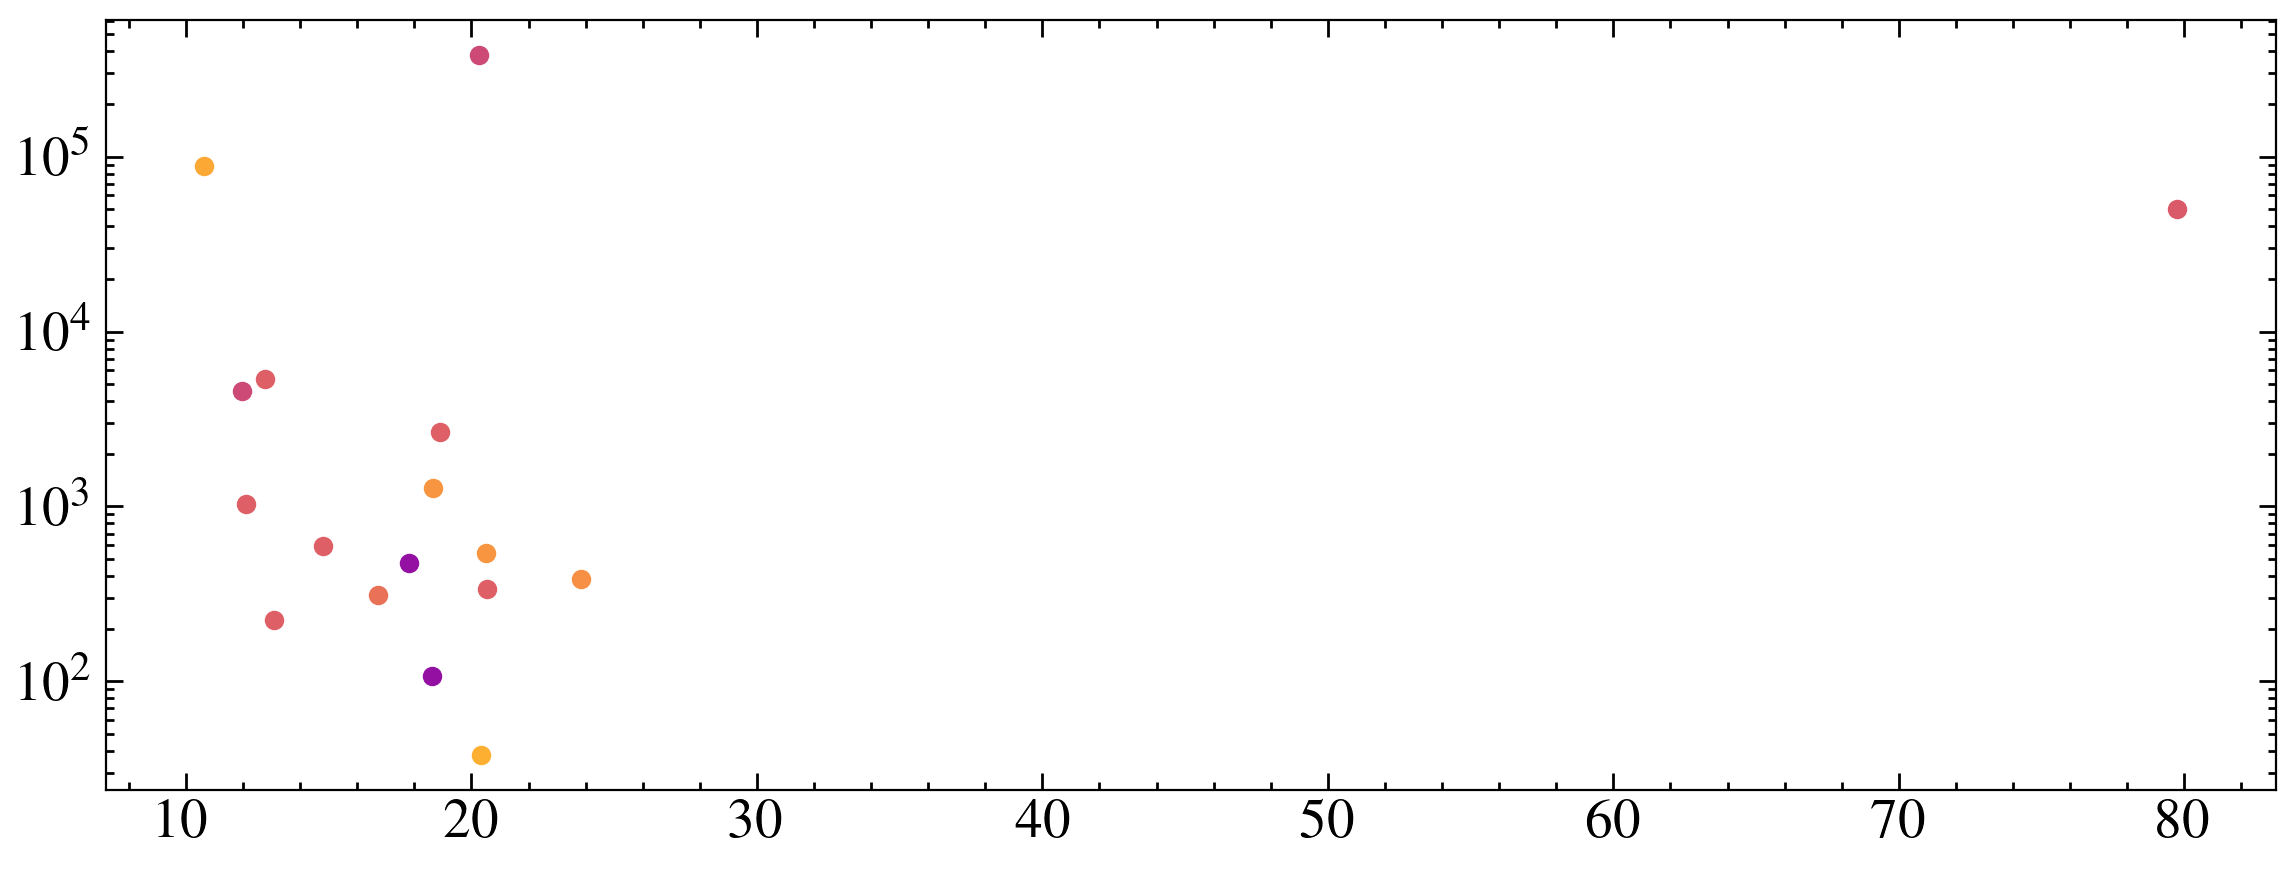

In [39]:
# fig, axes = plt.subplots(nrows =2, sharex=True, figsize=(14, 8))
# fig, axes = plt.subplots(nrows =2, figsize=(13, 8))
fig, ax = plt.subplots()



# ax = axes[0]
# ax1= axes[1]

# cols = np.linspace(0, 0.9, len(seds_sort))[::-1]
# cols = ((teffs/max(teffs))*0.9)[::-1]

norm = plt.Normalize(vmin=min(teffs)-500, vmax=max(teffs))


for i, spec in enumerate(seds_sort):
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
    star = star.replace('_', ' ')
    # star = star.lower().replace('_', ' ')
    if star == 'hd-120411':
        star  = 'HIP 67522'

    print(star)
    ind = np.where(names == star.lower())[0][0]
    if star == 'GJ 4102':
        star = 'LHS 475'
    # print(ind)
    row = params[ind]
    lum = ((row['Lbol (calculated)']*u.erg/u.s)/(const.L_sun.to(u.erg/u.s))).value
    eeid = 1*u.au * (lum**0.5)
    dstar = row['Dist (pc)']*u.pc
    # scale = (dstar/(eeid.to(u.pc)))**2
    # a_planet_b = planet_b_a[i] 
    # scale10 = (dstar/(10*u.pc))**2
    # scale_planetb = (dstar/((a_planet_b*u.au).to(u.pc)))**2
    
    # planet_hosts = []
    # planet_mass = []
    # planet_radius = []
    # planet_period = []
    # planet_a = []

    mask = (planet_hosts == star)
    print(planet_mass[mask], planet_radius[mask])
    # print(mask)
    # print(planet_a[mask])
    # if len(planet_a[mask]) == 1:
        # scale_planet = (dstar/((planet_a[mask]*u.au).to(u.pc)))**2
        # vescs = ((2*const.G * (planet_mass[mask]*u.M_earth).to(u.kg))/(planet_radius[mask]*u.R_earth).to(u.m))**0.5 
    # else:
    scale_planet = [(dstar/((a_planet*u.au).to(u.pc)))**2 for a_planet in planet_a[mask]]
    vescs = [((2*const.G * M.to(u.kg))/R.to(u.m))**0.5 for M, R in zip(planet_mass[mask]*u.M_earth, planet_radius[mask]*u.R_earth)]
    print(vescs)


    
    w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
    w, f = w[f >0], f[f>0]
    xuvmask = w < 1000
    xuv = np.trapz(f[xuvmask], w[xuvmask])

    for j in range(len(planet_a[mask])):
        ax.scatter(vescs[j]/1000, xuv*scale_planet[j], c=plt.cm.plasma_r(norm(teffs[i])))

ax.set_yscale('log')
# ax.set_xscale('log')
    # w, f = w[w< 1e6], f[w < 1e6]

    # ax.step(w, f*scale, c=plt.cm.plasma(cols[i]), alpha=0.7, where='mid')

# ax.legend(loc=4)

# bigax = fig.add_subplot(111, frame_on=False)
# bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# bigax.set_ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25, labelpad=25)
# bigax.set_xlabel('Wavelength (\AA)', size=25)

# fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.plasma_r),ax=ax, label='$T_{\mathrm{eff}}$ (K)', pad=0.05)
# # fig.colorbar(norm, ax=ax1)

# fig.tight_layout()
# fig.subplots_adjust(hspace=0.15)

# fig.savefig('../plots/stars_eeid_planet_b.pdf')


In [40]:
planet_radius

array([ 0.88      ,  0.699     ,         nan,         nan,         nan,
        1.77      ,  2.526     ,         nan,  9.763     ,  7.93595834,
        1.51      ,  7.        ,  2.61      ,         nan,         nan,
               nan,         nan,         nan,  1.63      ,  0.975     ,
       13.506845  ,  1.152     ,  1.669     ,  2.572     ,  2.207     ,
        2.287     ,  2.87      ,  1.47291596,  2.64      ,  5.09      ,
        1.798     ,  2.047     ,  1.704     ,  2.587     ,         nan,
               nan,         nan])

In [41]:
len(np.unique(planet_hosts))

20

<>:71: SyntaxWarning: invalid escape sequence '\,'
<>:72: SyntaxWarning: invalid escape sequence '\,'
<>:73: SyntaxWarning: invalid escape sequence '\,'
<>:96: SyntaxWarning: invalid escape sequence '\m'
<>:97: SyntaxWarning: invalid escape sequence '\m'
<>:113: SyntaxWarning: invalid escape sequence '\A'
<>:71: SyntaxWarning: invalid escape sequence '\,'
<>:72: SyntaxWarning: invalid escape sequence '\,'
<>:73: SyntaxWarning: invalid escape sequence '\,'
<>:96: SyntaxWarning: invalid escape sequence '\m'
<>:97: SyntaxWarning: invalid escape sequence '\m'
<>:113: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_8743/912048766.py:71: SyntaxWarning: invalid escape sequence '\,'
  axes[k][j].scatter(xnums[j], xuv*scale[k], color=plt.cm.plasma(0.3), marker='o', edgecolor='k',label='XUV ({}--{}\,\AA)'.format(xuvrange[0], xuvrange[1]))
/tmp/ipykernel_8743/912048766.py:72: SyntaxWarning: invalid escape sequence '\,'
  axes[k][j].scatter(xnums[j], fuv*scale[k], color=plt.cm.plasma(0.

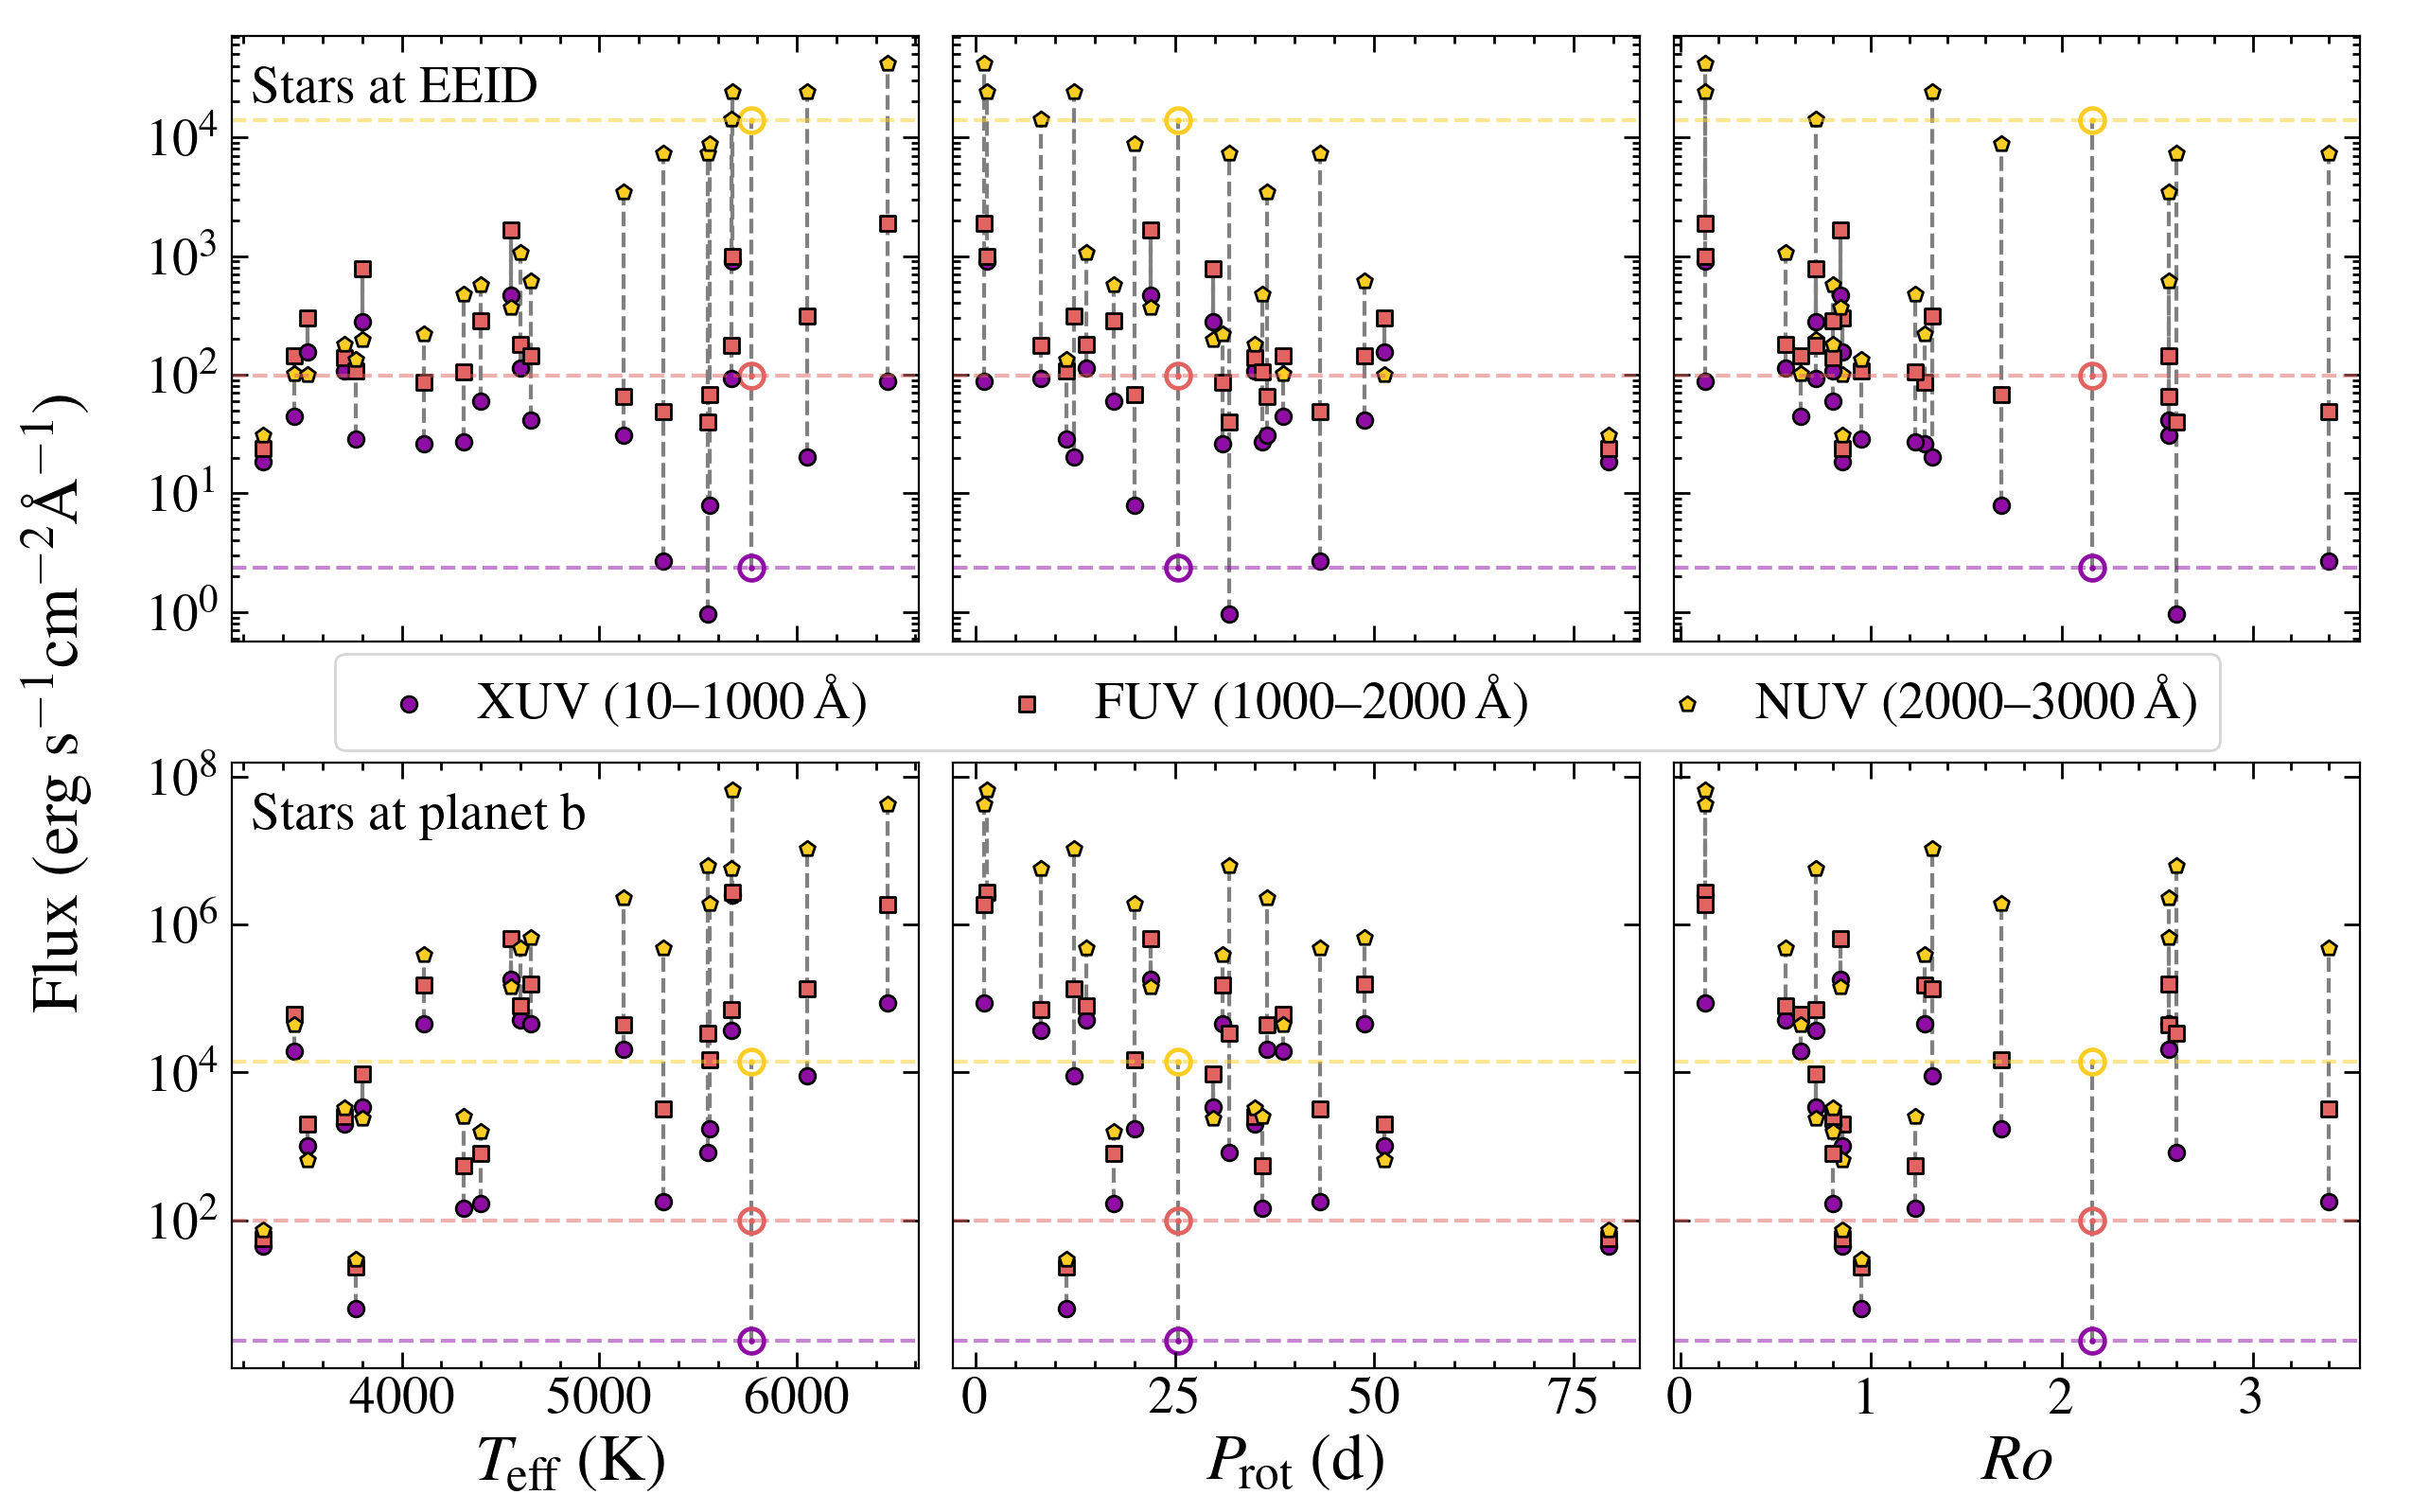

In [43]:
fig, axes = plt.subplots(nrows =2, ncols=3, sharey='row', figsize=(13, 8), sharex='col')

names = np.array([n.lower() for n in params['Name']])

# ax1= axes[1]

# cols = np.linspace(0, 0.9, len(seds_sort))[::-1]
# cols = ((teffs/max(teffs))*0.9)[::-1]

norm = plt.Normalize(vmin=min(teffs)-500, vmax=max(teffs))

xuvrange = [10, 1000]
fuvrange = [1000, 2000]
nuvrange = [2000, 3000]
#solar at 1au
xuvmask = (sw > xuvrange[0]) & (sw <xuvrange[1])
sxuv = np.trapz(sf[xuvmask], sw[xuvmask])
fuvmask = (sw > fuvrange[0]) & (sw <fuvrange[1])
sfuv = np.trapz(sf[fuvmask], sw[fuvmask])
nuvmask = (sw > nuvrange[0]) & (sw < nuvrange[1])
snuv = np.trapz(sf[nuvmask], sw[nuvmask])
sfluxes = [sxuv, sfuv, snuv]

solnums = [5772, (609.12*u.hr).to(u.d).value, 2.16]

for i, spec in enumerate(seds_sort):


    
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
    star = star.lower().replace('_', ' ')
    if star == 'hd-120411':
        star  = 'hip 67522'
    # print(star)
    ind = np.where(names == star)[0][0]
    # print(ind)
    row = params[ind]
    lum = ((row['Lbol (calculated)']*u.erg/u.s)/(const.L_sun.to(u.erg/u.s))).value
    eeid = 1*u.au * (lum**0.5)
    dstar = row['Dist (pc)']*u.pc
    escale = (dstar/(eeid.to(u.pc)))**2
    a_planet_b = planet_b_a[i] 
    # scale10 = (dstar/(10*u.pc))**2
    scale_planetb = (dstar/((a_planet_b*u.au).to(u.pc)))**2
    
    
    w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
    w, f = w[f >0], f[f>0]
    # w, f = w[w< 1e6], f[w < 1e6]
    xuvmask = (w > xuvrange[0]) & (w <xuvrange[1])
    xuv = np.trapz(f[xuvmask], w[xuvmask])

    fuvmask = (w > fuvrange[0]) & (w <fuvrange[1])
    fuv = np.trapz(f[fuvmask], w[fuvmask])

    nuvmask = (w > nuvrange[0]) & (w < nuvrange[1])
    nuv = np.trapz(f[nuvmask], w[nuvmask])

    teff= teffs[i]
    prot = abs(params['Prot (days)'][i])
    if prot == 0: 
        prot = np.mean([params['Prot Uncertainty Lower (days)'][i], params['Prot Uncertainty Upper (days)'][i]])
    ro = abs(params['Rossby number'][i])

    xnums = [teff, prot, ro]
    scale = [escale, scale_planetb]

    for j in range(3):
        for k in range(2):
            axes[k][j].scatter(xnums[j], xuv*scale[k], color=plt.cm.plasma(0.3), marker='o', edgecolor='k',label='XUV ({}--{}\,\AA)'.format(xuvrange[0], xuvrange[1]))
            axes[k][j].scatter(xnums[j], fuv*scale[k], color=plt.cm.plasma(0.6), marker='s', edgecolor='k', label='FUV ({}--{}\,\AA)'.format(fuvrange[0], fuvrange[1]))
            axes[k][j].scatter(xnums[j], nuv*scale[k], color=plt.cm.plasma(0.9), marker='p', edgecolor='k', label='NUV ({}--{}\,\AA)'.format(nuvrange[0], nuvrange[1]))

            axes[k][j].plot([xnums[j], xnums[j], xnums[j]], [xuv, fuv, nuv]*scale[k], ls='--', c='0.5', zorder=-10)

            if i == 0:
                axes[k][j].scatter(solnums[j], sxuv, color=plt.cm.plasma(0.3), marker=r'$\bigodot$', s=100)
                axes[k][j].scatter(solnums[j], sfuv, color=plt.cm.plasma(0.6), marker=r'$\bigodot$',  s=100)
                axes[k][j].scatter(solnums[j], snuv, color=plt.cm.plasma(0.9), marker=r'$\bigodot$',  s=100)
    
                axes[k][j].plot([solnums[j], solnums[j], solnums[j]], [sxuv, sfuv, snuv], ls='--', c='0.5', zorder=-10)

                axes[k][j].axhline(sxuv, color=plt.cm.plasma(0.3), ls='--', alpha=0.5)
                axes[k][j].axhline(sfuv, color=plt.cm.plasma(0.6), ls='--', alpha=0.5)
                axes[k][j].axhline(snuv, color=plt.cm.plasma(0.9), ls='--', alpha=0.5)

            
  

  

axes[0][0].set_yscale('log')
axes[1][0].set_yscale('log')

axes[1][0].set_xlabel('$T_{\mathrm{eff}}$ (K)', size=25)
axes[1][1].set_xlabel('$P_{\mathrm{rot}}$ (d)', size=25)
axes[1][2].set_xlabel('$Ro$', size=25)

axes[0][0].annotate('Stars at EEID', (0.03, 0.95), xycoords='axes fraction', va='top', ha='left')
axes[1][0].annotate('Stars at planet b', (0.03, 0.95), xycoords='axes fraction', va='top', ha='left')
    
handles, labels = plt.gca().get_legend_handles_labels()

by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), frameon=True, loc='center', 
           ncols=3, bbox_to_anchor=(0.55, 0.55))



bigax = fig.add_subplot(111, frame_on=False)
bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
bigax.set_ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25, labelpad=25)
# bigax.set_xlabel('Wavelength (\AA)', size=25)

# fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.plasma_r),ax=ax, label='$T_{\mathrm{eff}}$ (K)', pad=0.05)
# # fig.colorbar(norm, ax=ax1)

# lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels)
# ax.legend(by_label.values(), by_label.keys(), frameon=True, loc=4)



# fig.tight_layout()
fig.subplots_adjust(wspace=0.05, top =0.99, right=0.99)

fig.savefig('../plots/stars_v_tpr.pdf')
fig.savefig('../plots/pngs/stars_v_tpr.png', facecolor='w')


<>:117: SyntaxWarning: invalid escape sequence '\m'
<>:117: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_8743/2184176840.py:117: SyntaxWarning: invalid escape sequence '\m'
  axes[0].set_ylabel('$F_{\mathrm{EEID}}$ (erg s$^{-1}$cm$^{-2}$)', size=25)
/tmp/ipykernel_8743/2184176840.py:18: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  sxuv = np.trapz(sf[xuvmask], sw[xuvmask])
/tmp/ipykernel_8743/2184176840.py:20: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  sfuv = np.trapz(sf[fuvmask], sw[fuvmask])
/tmp/ipykernel_8743/2184176840.py:22: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  snuv = np.trapz(sf[nuvmask], sw[nuvmask])
/tmp/ipykernel_8743/2184176840.py:53: DeprecationWarning: `trapz` is deprecated. U

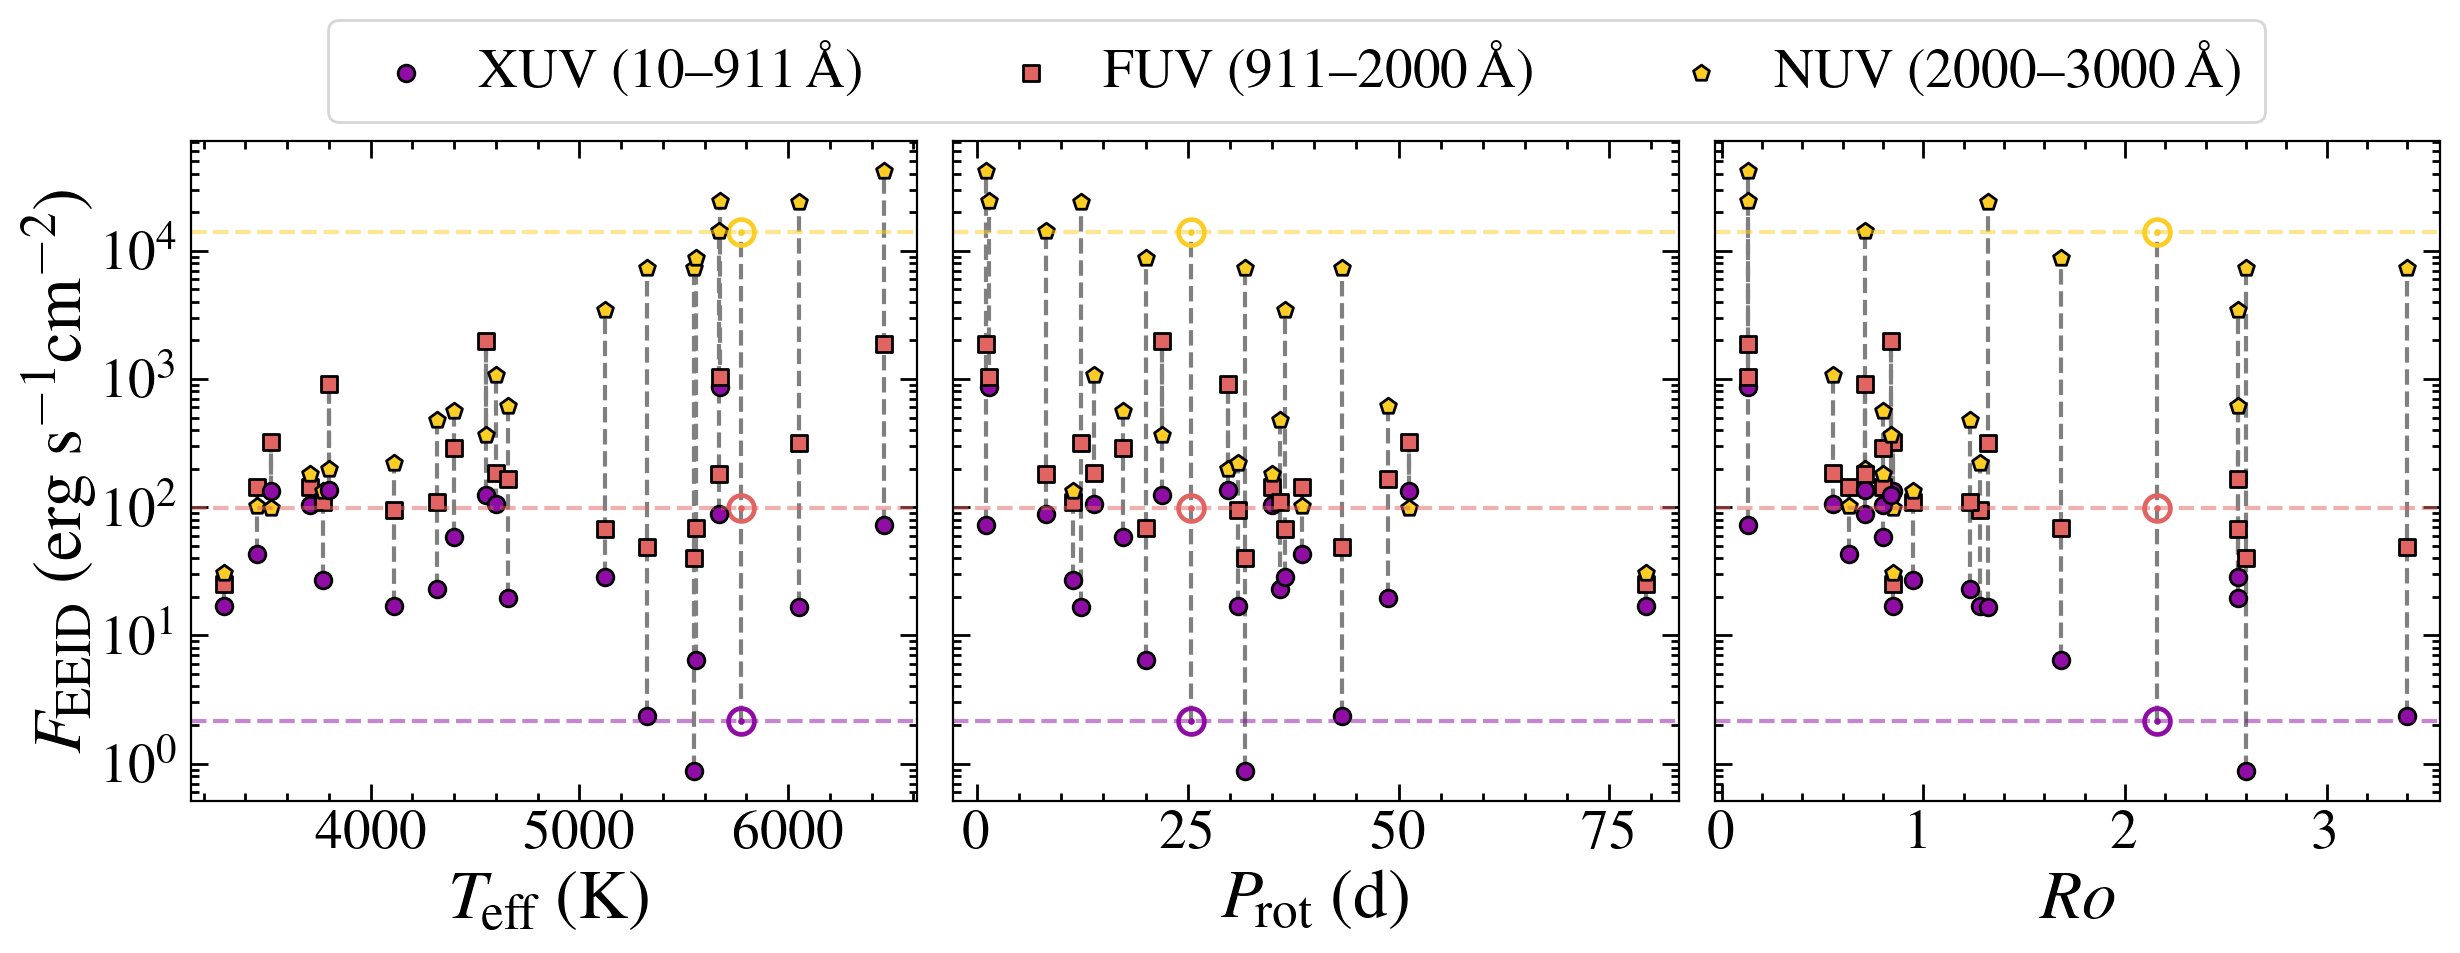

In [65]:
# fig, axes = plt.subplots(nrows =2, ncols=3, sharey='row', figsize=(13, 8), sharex='col')
fig, axes = plt.subplots(ncols=3, sharey='row', figsize=(13, 5), sharex='col')

names = np.array([n.lower() for n in params['Name']])

# ax1= axes[1]

# cols = np.linspace(0, 0.9, len(seds_sort))[::-1]
# cols = ((teffs/max(teffs))*0.9)[::-1]

norm = plt.Normalize(vmin=min(teffs)-500, vmax=max(teffs))

xuvrange = [10, 911]
fuvrange = [911, 2000]
nuvrange = [2000, 3000]
#solar at 1au
xuvmask = (sw > xuvrange[0]) & (sw <xuvrange[1])
sxuv = np.trapz(sf[xuvmask], sw[xuvmask])
fuvmask = (sw > fuvrange[0]) & (sw <fuvrange[1])
sfuv = np.trapz(sf[fuvmask], sw[fuvmask])
nuvmask = (sw > nuvrange[0]) & (sw < nuvrange[1])
snuv = np.trapz(sf[nuvmask], sw[nuvmask])
sfluxes = [sxuv, sfuv, snuv]

solnums = [5772, (609.12*u.hr).to(u.d).value, 2.16]

for i, spec in enumerate(seds_sort):


    
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
    star = star.lower().replace('_', ' ')
    if star == 'hd-120411':
        star  = 'hip 67522'
    # print(star)
    ind = np.where(names == star)[0][0]
    # print(ind)
    row = params[ind]
    lum = ((row['Lbol (calculated)']*u.erg/u.s)/(const.L_sun.to(u.erg/u.s))).value
    eeid = 1*u.au * (lum**0.5)
    dstar = row['Dist (pc)']*u.pc
    escale = (dstar/(eeid.to(u.pc)))**2
    a_planet_b = planet_b_a[i] 
    # scale10 = (dstar/(10*u.pc))**2
    scale_planetb = (dstar/((a_planet_b*u.au).to(u.pc)))**2
    
    
    w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
    w, f = w[f >0], f[f>0]
    # w, f = w[w< 1e6], f[w < 1e6]
    xuvmask = (w > xuvrange[0]) & (w <xuvrange[1])
    xuv = np.trapz(f[xuvmask], w[xuvmask])

    fuvmask = (w > fuvrange[0]) & (w <fuvrange[1])
    fuv = np.trapz(f[fuvmask], w[fuvmask])

    nuvmask = (w > nuvrange[0]) & (w < nuvrange[1])
    nuv = np.trapz(f[nuvmask], w[nuvmask])

    teff= teffs[i]
    prot = abs(params['Prot (days)'][i])
    if prot == 0: 
        prot = np.mean([params['Prot Uncertainty Lower (days)'][i], params['Prot Uncertainty Upper (days)'][i]])
    ro = abs(params['Rossby number'][i])

    xnums = [teff, prot, ro]
    # scale = [escale, scale_planetb]
    scale = [escale]

    for j in range(3):
        for k in range(1):
            axes[j].scatter(xnums[j], xuv*scale[k], color=plt.cm.plasma(0.3), marker='o', edgecolor='k',label=r'XUV ({}--{}\,\AA)'.format(xuvrange[0], xuvrange[1]))
            axes[j].scatter(xnums[j], fuv*scale[k], color=plt.cm.plasma(0.6), marker='s', edgecolor='k', label=r'FUV ({}--{}\,\AA)'.format(fuvrange[0], fuvrange[1]))
            axes[j].scatter(xnums[j], nuv*scale[k], color=plt.cm.plasma(0.9), marker='p', edgecolor='k', label=r'NUV ({}--{}\,\AA)'.format(nuvrange[0], nuvrange[1]))

            axes[j].plot([xnums[j], xnums[j], xnums[j]], [xuv, fuv, nuv]*scale[k], ls='--', c='0.5', zorder=-10)

            if i == 0:
                axes[j].scatter(solnums[j], sxuv, color=plt.cm.plasma(0.3), marker=r'$\bigodot$', s=100)
                axes[j].scatter(solnums[j], sfuv, color=plt.cm.plasma(0.6), marker=r'$\bigodot$',  s=100)
                axes[j].scatter(solnums[j], snuv, color=plt.cm.plasma(0.9), marker=r'$\bigodot$',  s=100)
    
                axes[j].plot([solnums[j], solnums[j], solnums[j]], [sxuv, sfuv, snuv], ls='--', c='0.5', zorder=-10)

                axes[j].axhline(sxuv, color=plt.cm.plasma(0.3), ls='--', alpha=0.5)
                axes[j].axhline(sfuv, color=plt.cm.plasma(0.6), ls='--', alpha=0.5)
                axes[j].axhline(snuv, color=plt.cm.plasma(0.9), ls='--', alpha=0.5)

            
  

  

axes[0].set_yscale('log')
# axes[1][0].set_yscale('log')

axes[0].set_xlabel(r'$T_{\mathrm{eff}}$ (K)', size=25)
axes[1].set_xlabel(r'$P_{\mathrm{rot}}$ (d)', size=25)
axes[2].set_xlabel(r'$Ro$', size=25)

# axes[0].annotate('Stars at EEID', (0.03, 0.95), xycoords='axes fraction', va='top', ha='left')
# axes[1[0].annotate('Stars at planet b', (0.03, 0.95), xycoords='axes fraction', va='top', ha='left')
    
handles, labels = plt.gca().get_legend_handles_labels()

by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), frameon=True, loc='center', 
           ncols=3, bbox_to_anchor=(0.55, 0.93))



# bigax = fig.add_subplot(111, frame_on=False)
# bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# bigax.set_ylabel(r'Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25, labelpad=25)
# axes[0].set_ylabel(r'Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25, labelpad=25)
axes[0].set_ylabel('$F_{\mathrm{EEID}}$ (erg s$^{-1}$cm$^{-2}$)', size=25)

# bigax.set_xlabel('Wavelength (\AA)', size=25)

# fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.plasma_r),ax=ax, label='$T_{\mathrm{eff}}$ (K)', pad=0.05)
# # fig.colorbar(norm, ax=ax1)

# lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# fig.legend(lines, labels)
# ax.legend(by_label.values(), by_label.keys(), frameon=True, loc=4)



# fig.tight_layout()
fig.subplots_adjust(wspace=0.05, top =0.86, right=0.99, bottom=0.2)

fig.savefig('../plots/stars_v_tpr_onerow.pdf')


In [66]:
planet_esc = Table.read('planet_atm.csv')
planet_esc

<Table length=31>
  Star     Planet  ...               Notes               
  str9     str10   ...               str34               
-------- --------- ... ----------------------------------
   GJ341    GJ341b ... mass is nonsense, changed to Venus
   GJ367    GJ367b ...                                 --
 HATS-72  HATS-72b ...                                 --
 HD15337  HD15337b ...                                 --
 HD15337  HD15337c ...                                 --
 HD80606  HD80606b ...                                 --
HIP67522 HIP67522b ...                                 --
  K2-141   K2-141b ...                                 --
  K2-141   K2-141c ...                                 --
     ...       ... ...                                ...
 TOI-260  TOI-260b ...                                 --
 TOI-421  TOI-421b ...                                 --
 TOI-421  TOI-421c ...                                 --
 TOI-776  TOI-776b ...                                 --
 TOI-776  TOI-776c ...                                 --
 TOI-836  TOI-836b ...                                 --
 TOI-836  TOI-836c ...                                 --
WASP-121 WASP-121b ...                                 --
WASP-166 WASP-166b ...                                 --
 WASP-63  WASP-63b ...                                 --

In [67]:
sol = Table.read('../../../misc/solar_system.csv')
mask = (sol['Name'] != 'MOON') & (sol['Name'] != 'PLUTO')
sol = sol[mask]
sol

<Table length=8>
  Name  Mass (1024kg) Mass( kg) ... Ring System? Global Magnetic Field?
  str7     float64     float64  ...     str3              str7         
------- ------------- --------- ... ------------ ----------------------
MERCURY          0.33   3.3e+23 ...           No                    Yes
  VENUS          4.87  4.87e+24 ...           No                     No
  EARTH          5.97  5.97e+24 ...           No                    Yes
   MARS         0.642  6.42e+23 ...           No                     No
JUPITER        1898.0 1.898e+27 ...          Yes                    Yes
 SATURN         568.0  5.68e+26 ...          Yes                    Yes
 URANUS          86.8  8.68e+25 ...          Yes                    Yes
NEPTUNE         102.0  1.02e+26 ...          Yes                    Yes

<>:127: SyntaxWarning: invalid escape sequence '\m'
<>:127: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_8743/2097882385.py:127: SyntaxWarning: invalid escape sequence '\m'
  axes[2].set_xlabel('$V_{\mathrm{esc}}$ (km\,s$^{-1}$)')
/tmp/ipykernel_8743/2097882385.py:68: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  xuv = np.trapz(f[xuvmask], w[xuvmask])


0.43052015


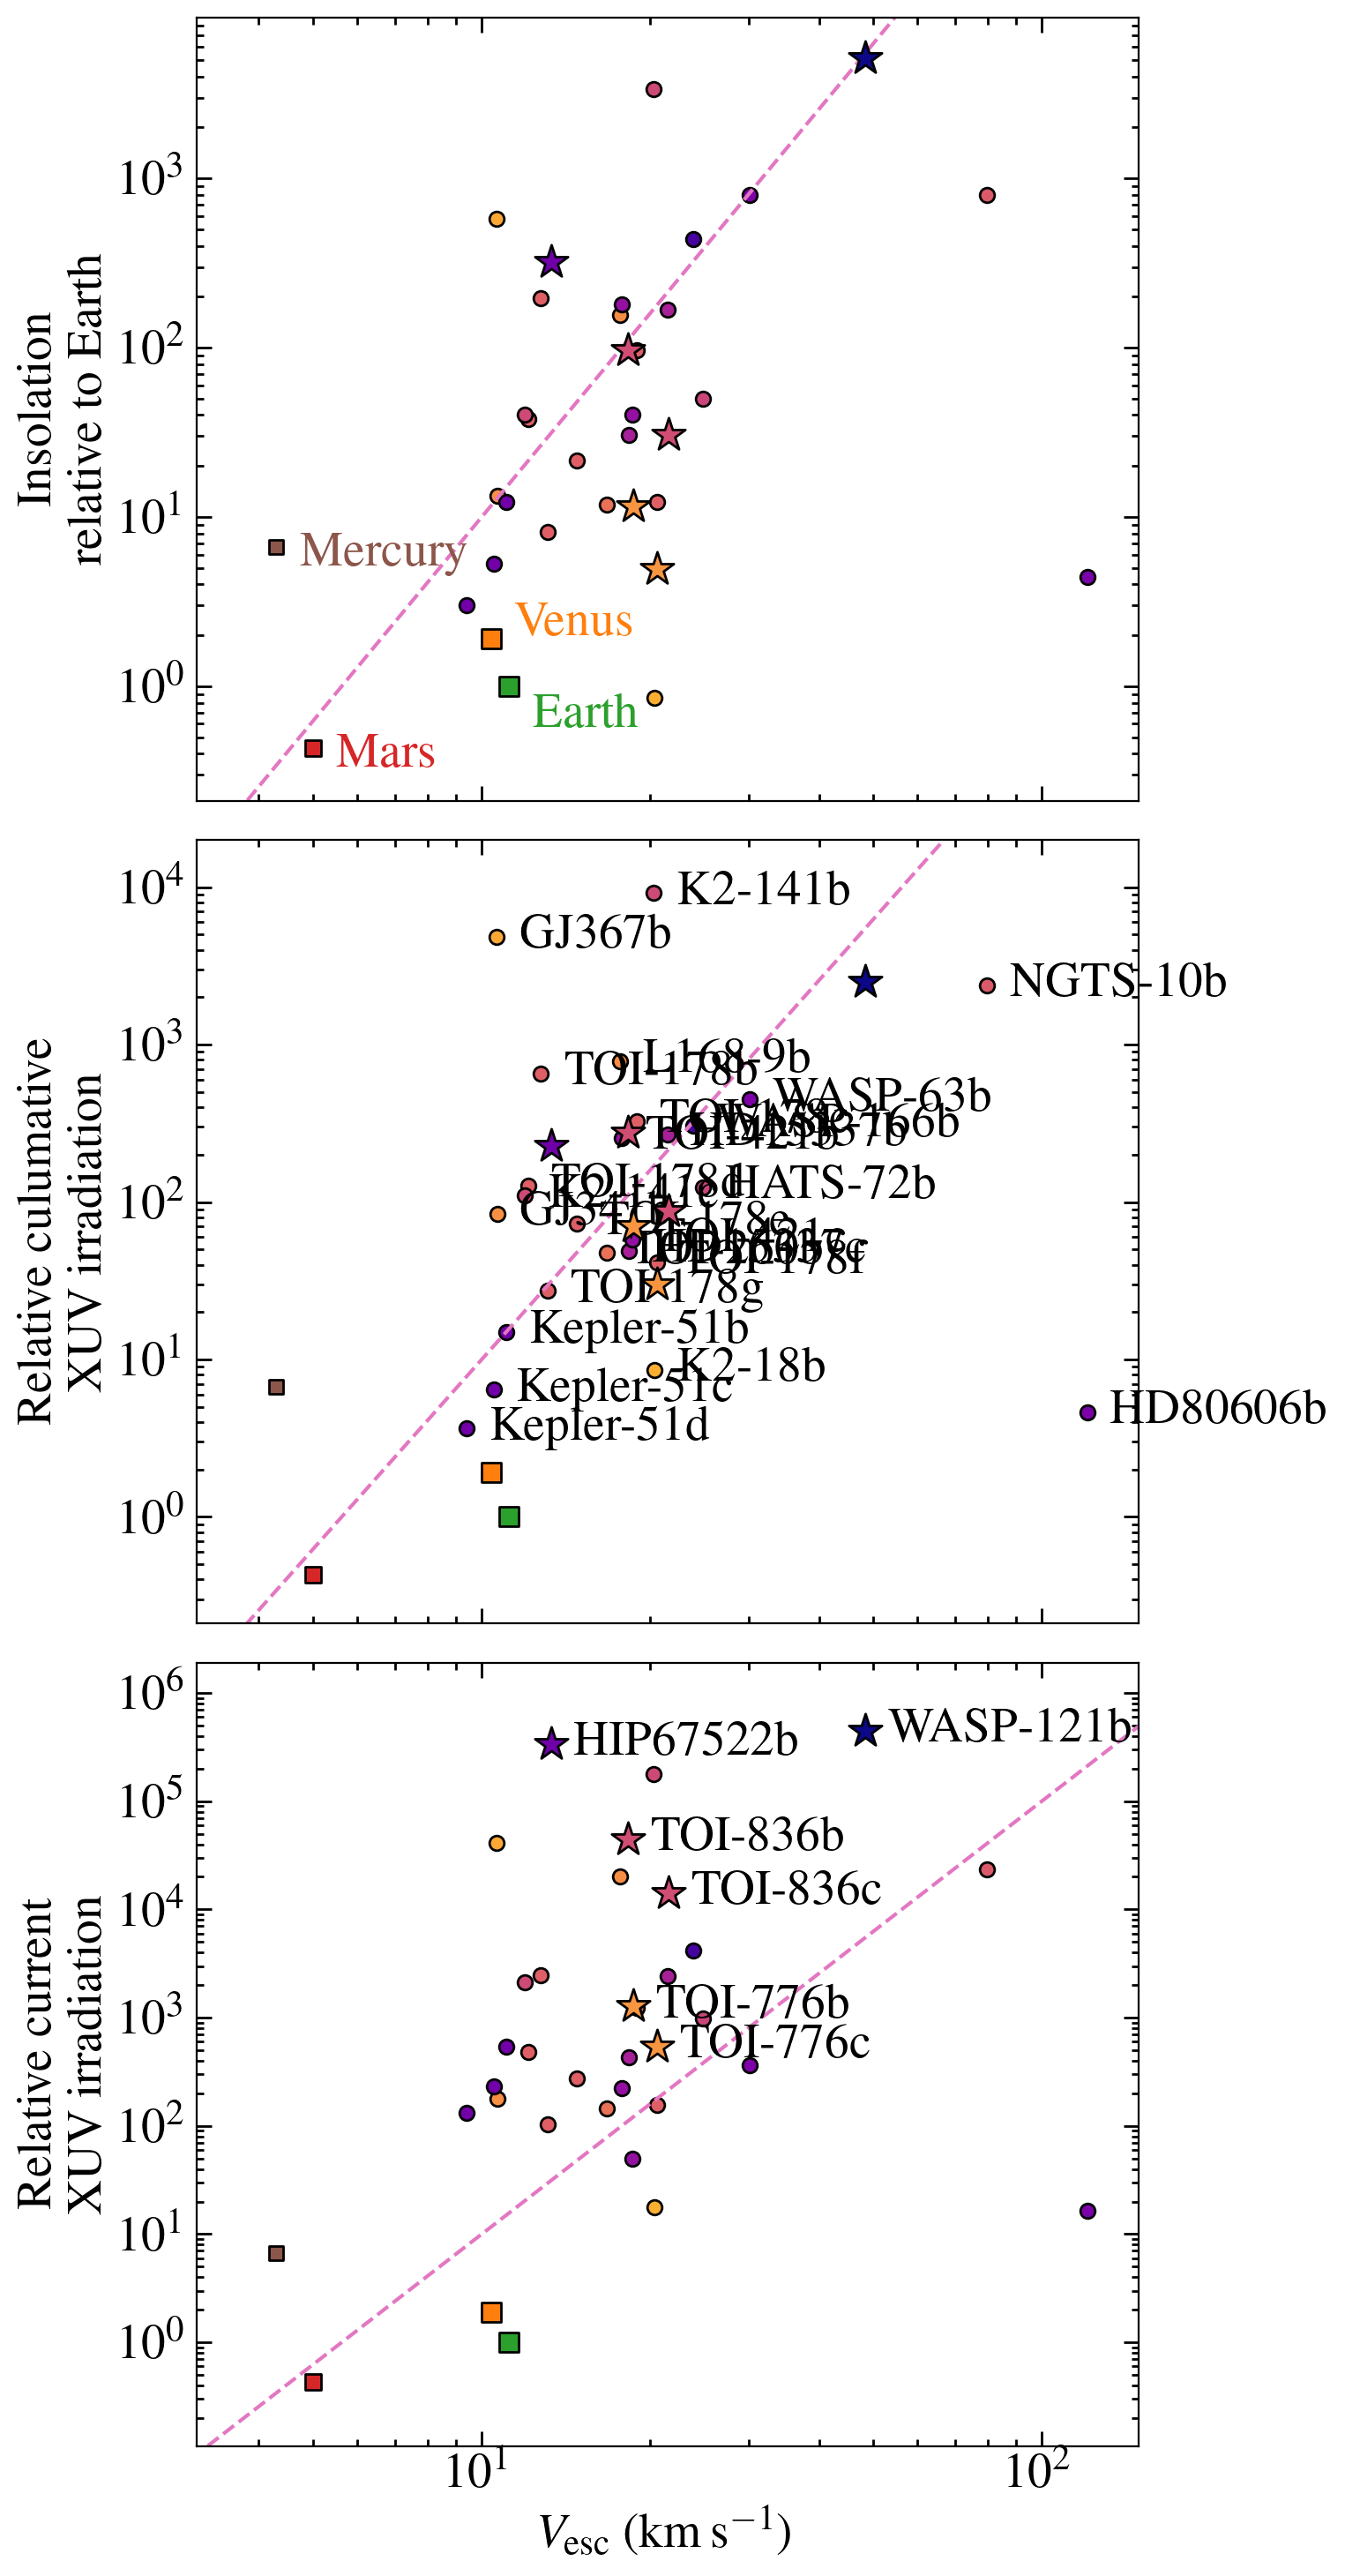

In [68]:
#a, p, mp, rp, name, host, ref, escape y/n, reff 



# planets = np.unique(planets_table['pl_name'])


# fig, axes = plt.subplots(nrows =2, sharex=True, figsize=(14, 8))
# fig, axes = plt.subplots(nrows =2, figsize=(13, 8))
fig, axes = plt.subplots(nrows=3, figsize=(8, 15), sharex=True)


mars_esc=5.0
mars_xuv = (sxuv*(149.6/228.0)**2)/sxuv
print(mars_xuv)
# ax = axes[0]
# ax1= axes[1]

# cols = np.linspace(0, 0.9, len(seds_sort))[::-1]
# cols = ((teffs/max(teffs))*0.9)[::-1]

norm = plt.Normalize(vmin=min(teffs)-500, vmax=max(teffs))


for i, spec in enumerate(seds_sort):
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
    star = star.replace('_', ' ')
    # star = star.lower().replace('_', ' ')
    if star == 'hd-120411':
        star  = 'HIP 67522'

    # print(star)
    ind = np.where(names == star.lower())[0][0]
    if star == 'GJ 4102':
        star = 'LHS 475'
    # print(ind)
    row = params[ind]
    lum = ((row['Lbol (calculated)']*u.erg/u.s)/(const.L_sun.to(u.erg/u.s))).value
    eeid = 1*u.au * (lum**0.5)
    dstar = row['Dist (pc)']*u.pc

    star = star.replace(' ','').upper()
    if star == 'TOI-134':
        star = 'L168-9'
    if star == 'KEPLER-51':
        star = 'Kepler-51'
    if star == 'TOI-402':
        star = 'HD15337'
    if star in planet_esc['Star']:
        # print(star)
        mask = (planet_esc['Star'] == star)
        
        scale_planet = [(dstar/((a_planet*u.au).to(u.pc)))**2 for a_planet in planet_esc['a'][mask]]
        # vescs = [((2*const.G * M.to(u.kg))/R.to(u.m))**0.5 for M, R in zip(planet_mass[mask]*u.M_earth, planet_radius[mask]*u.R_earth)]
        vescs = [(((2*const.G * M.to(u.kg))/R.to(u.m))**0.5).value for M, R in zip(abs(planet_esc['Mass'][mask])*u.M_earth, planet_esc['Radius'][mask]*u.R_earth)]
        vescs = np.array(vescs)
        # print(vescs/1000)

        I = [lum/(((a_planet*u.au).value)**2) for a_planet in planet_esc['a'][mask]]
        Ixuv = np.array(I) * lum**-0.6
    

        
        w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
        w, f = w[f >0], f[f>0]
        xuvmask = w < 1000
        xuv = np.trapz(f[xuvmask], w[xuvmask])
    
        for j in range(len(planet_esc[mask])):
            if planet_esc['Escape'][mask][j] == 'Y':
                axes[0].scatter(vescs[j]/1000, I[j], color=plt.cm.plasma_r(norm(teffs[i])), marker='*', s=200, edgecolor='k', zorder=20)
                axes[1].scatter(vescs[j]/1000, Ixuv[j], color=plt.cm.plasma_r(norm(teffs[i])), marker='*', s=200, edgecolor='k',  zorder=20)
                
                axes[2].scatter(vescs[j]/1000, xuv*scale_planet[j], color=plt.cm.plasma_r(norm(teffs[i])), marker='*', s=200, edgecolor='k', zorder=20)
                axes[2].annotate(planet_esc['Planet'][mask][j], (1.1*vescs[j]/1000, xuv*scale_planet[j]), va='center', ha='left')
            else:
                axes[0].scatter(vescs[j]/1000, I[j], color=plt.cm.plasma_r(norm(teffs[i])),edgecolor='k')
                axes[1].scatter(vescs[j]/1000, Ixuv[j], color=plt.cm.plasma_r(norm(teffs[i])),edgecolor='k')
                
                axes[2].scatter(vescs[j]/1000, (xuv*scale_planet[j])/sxuv, color=plt.cm.plasma_r(norm(teffs[i])),edgecolor='k')
                axes[1].annotate(planet_esc['Planet'][mask][j], (1.1*vescs[j]/1000, Ixuv[j]), va='center', ha='left')
                

cols = [5, 1, 2, 3, 6, 6,0,0]
for i, planet in enumerate(sol['Name'][0:4]):
    row = sol[i]
    vesc = row['Escape Velocity (km/s)']
    a = float(row['Distance from Sun (106 km)'])/149.6
    I = 1*u.Lsun /(a**2)
    xuv = (1/a)**2
    
    size = (row['Diameter (km)']/max(sol['Diameter (km)']))**0.5*200
    # ax.scatter(row['Orbital Period (days)'], row['Mass (Me)'], s=size, edgecolor='k', color= 'C{}'.format(cols[i]))
    axes[0].scatter(vesc, I, s=size, edgecolor='k', color= 'C{}'.format(cols[i]), marker='s')
    axes[1].scatter(vesc, I, s=size, edgecolor='k', color= 'C{}'.format(cols[i]), marker='s')
    axes[2].scatter(vesc, xuv, s=size, edgecolor='k', color= 'C{}'.format(cols[i]), marker='s')
    
    off = 'center'
    if planet in ['EARTH', ]:
        off = 'top'
    if planet in ['VENUS', 'URANUS']:
        off = 'bottom'
    # ax.annotate(planet.capitalize(), (row['Orbital Period (days)']*1.3, row['Mass (Me)']*0.9), va=off, ha='left')
    axes[0].annotate(planet.capitalize(), (vesc*1.1, I.value*0.9), va=off, ha='left', color= 'C{}'.format(cols[i]))


# axes[2].scatter(mars_esc, mars_xuv, marker='o', c='r', s=100)

csx = np.linspace(1, 200, 100)
csy = np.array([(1e-3*i**4) for i in csx])
for i in range(3):
    axes[i].plot(csx, csy, ls='--', color= 'C6')
# axes[1].plot(csx, csy, ls='--')
# axes[2].plot(csx, csy, ls='--')



# csy = np.array([1e-3 * (i**4) for i in csx])
# axes[2].plot(csx, csy, ls='--')

axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[2].set_yscale('log')
axes[2].set_xscale('log')

axes[2].set_xlabel('$V_{\mathrm{esc}}$ (km\,s$^{-1}$)')
axes[0].set_ylabel('Insolation \n relative to Earth')
axes[1].set_ylabel('Relative culumative \n XUV irradiation')
axes[2].set_ylabel('Relative current \n XUV irradiation')

axes[0].set_ylim(2.1e-1,0.89e4)
axes[1].set_ylim(2.1e-1,1.99e4)
axes[2].set_ylim(0.11,1.9e6)
axes[2].set_xlim(3.1, 149)

    # w, f = w[w< 1e6], f[w < 1e6]

    # ax.step(w, f*scale, c=plt.cm.plasma(cols[i]), alpha=0.7, where='mid')

# ax.legend(loc=4)

# bigax = fig.add_subplot(111, frame_on=False)
# bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# bigax.set_ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25, labelpad=25)
# bigax.set_xlabel('Wavelength (\AA)', size=25)

# fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.plasma_r),ax=ax, label='$T_{\mathrm{eff}}$ (K)', pad=0.05)
# # fig.colorbar(norm, ax=ax1)

fig.tight_layout()
fig.subplots_adjust(hspace=0.05)

# fig.savefig('../plots/stars_eeid_planet_b.pdf')


K2-18b 20.329343076848712 17.62448482996798
GJ367b 10.639016146456456 41181.535392799626
TOI-776b 18.643539161932768 582.626749119998
TOI-776c 20.525976384504578 247.94115920593808
GJ341b 10.659623320682176 179.21999617560505
L168-9b 17.6661373755831 20112.684216680605
TOI-260b 16.734247455804933 143.47742277556046
TOI-178b 12.757265407115936 2478.3987836979577
TOI-178c 18.900322820224964 1230.4098564693359
TOI-178d 12.094445630824886 480.6288501833342
TOI-178e 14.785318576437273 274.7449544040947
TOI-178f 20.540630428330257 156.03504642397138
TOI-178g 13.099217806720661 103.61744519840188
NGTS-10b 79.74189123429493 22405.809827993464
TOI-836b 18.22856606815397 20716.796013051033
TOI-836c 21.536523684729307 6558.808713223435
K2-141b 20.282800621297472 175674.00084725735
K2-141c 11.951823591771111 2101.3930347506
HATS-72b 24.803450984560886 964.4704099163575
HD15337b 21.455668880338507 2400.7412072788943
HD15337c 18.332443972284285 433.12787987498456
TOI-421b 17.810398584466625 221.6678

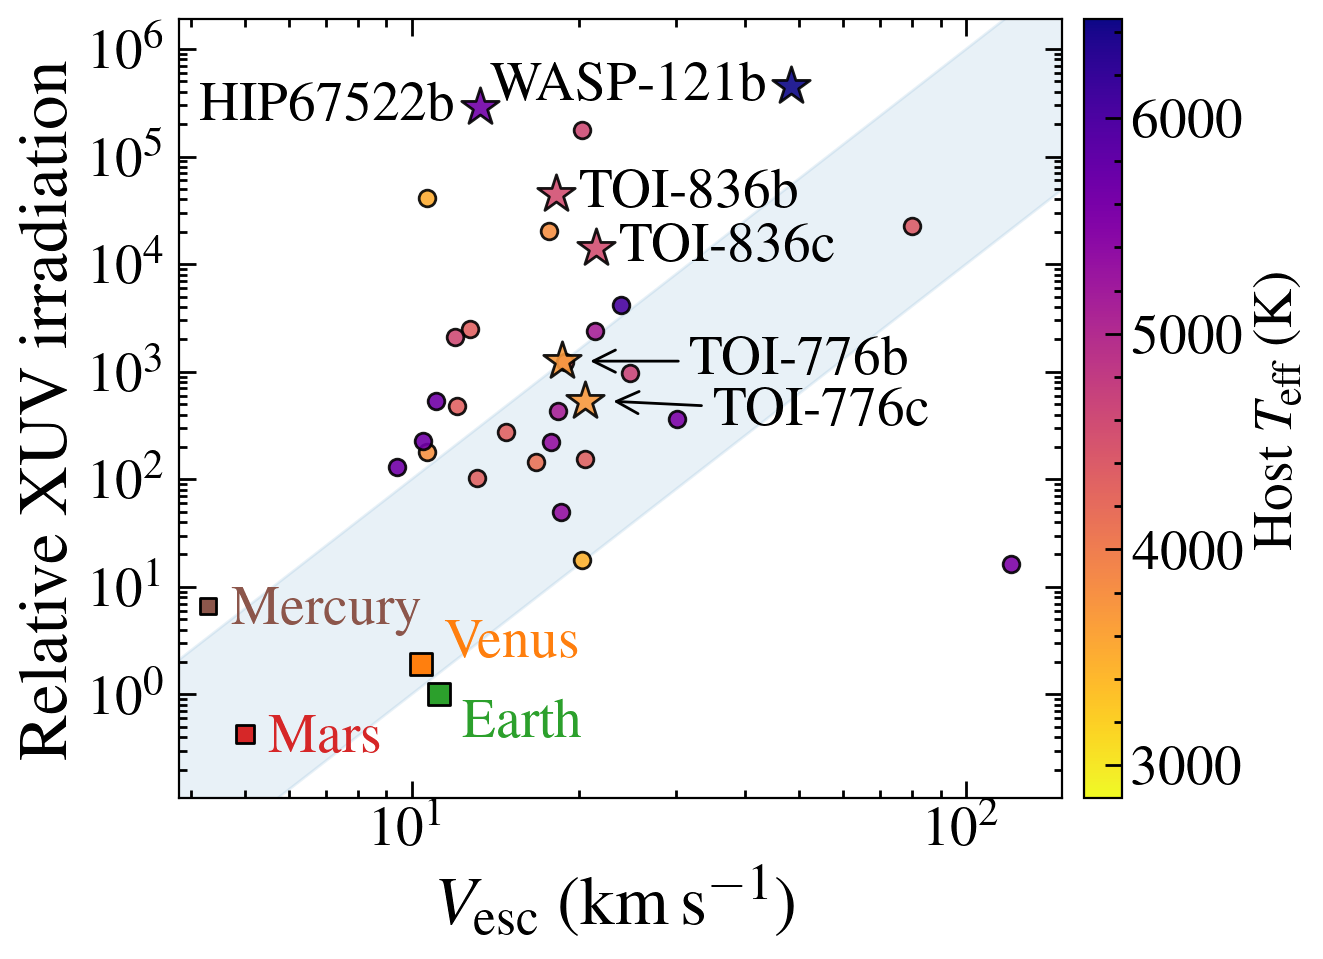

In [88]:
#a, p, mp, rp, name, host, ref, escape y/n, reff 

#as above but with just the bottom plot

# planets = np.unique(planets_table['pl_name'])


# fig, axes = plt.subplots(nrows =2, sharex=True, figsize=(14, 8))
# fig, axes = plt.subplots(nrows =2, figsize=(13, 8))
# fig, axes = plt.subplots(nrows=3, figsize=(8, 15), sharex=True)
fig, ax = plt.subplots(figsize=(7, 5))



norm = plt.Normalize(vmin=min(teffs)-450, vmax=max(teffs))


for i, spec in enumerate(seds_sort):
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
    star = star.replace('_', ' ')
    # star = star.lower().replace('_', ' ')
    if star == 'hd-120411':
        star  = 'HIP 67522'

    # print(star)
    ind = np.where(names == star.lower())[0][0]
    if star == 'GJ 4102':
        star = 'LHS 475'
    # print(ind)
    row = params[ind]
    lum = ((row['Lbol (calculated)']*u.erg/u.s)/(const.L_sun.to(u.erg/u.s))).value
    eeid = 1*u.au * (lum**0.5)
    dstar = row['Dist (pc)']*u.pc

    star = star.replace(' ','').upper()
    if star == 'TOI-134':
        star = 'L168-9'
    if star == 'KEPLER-51':
        star = 'Kepler-51'
    if star == 'TOI-402':
        star = 'HD15337'
    if star in planet_esc['Star']:
        # print(star)
        mask = (planet_esc['Star'] == star)
        
        scale_planet = [(dstar/((a_planet*u.au).to(u.pc)))**2 for a_planet in planet_esc['a'][mask]]
        # vescs = [((2*const.G * M.to(u.kg))/R.to(u.m))**0.5 for M, R in zip(planet_mass[mask]*u.M_earth, planet_radius[mask]*u.R_earth)]
        vescs = [(((2*const.G * M.to(u.kg))/R.to(u.m))**0.5).value for M, R in zip(abs(planet_esc['Mass'][mask])*u.M_earth, planet_esc['Radius'][mask]*u.R_earth)]
        vescs = np.array(vescs)
        # print(vescs/1000)

        # I = [lum/(((a_planet*u.au).value)**2) for a_planet in planet_esc['a'][mask]]
        # Ixuv = np.array(I) * lum**-0.6
    

        
        w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
        w, f = w[f >0], f[f>0]
        xuvmask = (w > 10 ) & (w < 1000)
        xuv = np.trapezoid(f[xuvmask], w[xuvmask])
    
        for j in range(len(planet_esc[mask])):
            if planet_esc['Escape'][mask][j] == 'Y':
                # axes[0].scatter(vescs[j]/1000, I[j], color=plt.cm.plasma_r(norm(teffs[i])), marker='*', s=200, edgecolor='k', zorder=20)
                # axes[1].scatter(vescs[j]/1000, Ixuv[j], color=plt.cm.plasma_r(norm(teffs[i])), marker='*', s=200, edgecolor='k',  zorder=20)
                
                ax.scatter(vescs[j]/1000, xuv*scale_planet[j], color=plt.cm.plasma_r(norm(teffs[i])), marker='*', s=200, edgecolor='k', zorder=20, alpha=0.9)
                if planet_esc['Planet'][mask][j] in ['HIP67522b', 'WASP-121b']:
                    ax.annotate(planet_esc['Planet'][mask][j], (0.9*vescs[j]/1000, xuv*scale_planet[j]), va='center', ha='right')
                elif planet_esc['Planet'][mask][j] == 'TOI-776b':
                    # ax.annotate(planet_esc['Planet'][mask][j], (1.1*vescs[j]/1000, xuv*scale_planet[j]), va='bottom', ha='left')
                    ax.annotate(planet_esc['Planet'][mask][j], xy=(1.1*vescs[j]/1000, xuv*scale_planet[j]), 
                                xytext=(1.7*vescs[j]/1000, xuv*scale_planet[j]), va='center', ha='left', 
                                arrowprops = dict(arrowstyle="->"))
                elif planet_esc['Planet'][mask][j] == 'TOI-776c':
                    # ax.annotate(planet_esc['Planet'][mask][j], (1.1*vescs[j]/1000, xuv*scale_planet[j]), va='bottom', ha='left')
                    ax.annotate(planet_esc['Planet'][mask][j], xy=(1.1*vescs[j]/1000, xuv*scale_planet[j]), 
                                xytext=(1.7*vescs[j]/1000, 0.8*xuv*scale_planet[j]), va='center', ha='left', 
                                arrowprops = dict(arrowstyle="->"))
                    
                else:
                    ax.annotate(planet_esc['Planet'][mask][j], (1.1*vescs[j]/1000, xuv*scale_planet[j]), va='center', ha='left')
            else:
                # axes[0].scatter(vescs[j]/1000, I[j], color=plt.cm.plasma_r(norm(teffs[i])),edgecolor='k')
                # axes[1].scatter(vescs[j]/1000, Ixuv[j], color=plt.cm.plasma_r(norm(teffs[i])),edgecolor='k')
                
                ax.scatter(vescs[j]/1000, (xuv*scale_planet[j])/sxuv, color=plt.cm.plasma_r(norm(teffs[i])),edgecolor='k', alpha=0.9)
            print(planet_esc['Planet'][mask][j], vescs[j]/1000,(xuv*scale_planet[j])/sxuv)
                # axes[1].annotate(planet_esc['Planet'][mask][j], (1.1*vescs[j]/1000, Ixuv[j]), va='center', ha='left')
                

cols = [5, 1, 2, 3, 6, 6,0,0]
for i, planet in enumerate(sol['Name']):
    row = sol[i]
    vesc = row['Escape Velocity (km/s)']
    a = float(row['Distance from Sun (106 km)'])/149.6
    I = 1*u.Lsun /(a**2)
    xuv = (1/a)**2
    
    size = (row['Diameter (km)']/max(sol['Diameter (km)']))**0.5*200
    # ax.scatter(row['Orbital Period (days)'], row['Mass (Me)'], s=size, edgecolor='k', color= 'C{}'.format(cols[i]))
    # axes[0].scatter(vesc, I, s=size, edgecolor='k', color= 'C{}'.format(cols[i]), marker='s')
    # axes[1].scatter(vesc, I, s=size, edgecolor='k', color= 'C{}'.format(cols[i]), marker='s')
    ax.scatter(vesc, xuv, s=size, edgecolor='k', color= 'C{}'.format(cols[i]), marker='s')
    
    off = 'center'
    if planet in ['EARTH', ]:
        off = 'top'
    if planet in ['VENUS', 'URANUS']:
        off = 'bottom'
    # ax.annotate(planet.capitalize(), (row['Orbital Period (days)']*1.3, row['Mass (Me)']*0.9), va=off, ha='left')
    ax.annotate(planet.capitalize(), (vesc*1.1, I.value*0.9), va=off, ha='left', color= 'C{}'.format(cols[i]))


# axes[2].scatter(mars_esc, mars_xuv, marker='o', c='r', s=100)

csx = np.linspace(1, 200, 100)
csy = np.array([(1e-3*i**4) for i in csx])
# for i in range(3):
# ax.plot(csx, csy, ls='--', color= 'C6')
# ax.plot(csx, csy, ls='--', color= 'C6')
ax.fill_between(csx, csy*0.1, csy*10, color='C0', alpha=0.1, zorder=-10)
# axes[1].plot(csx, csy, ls='--')
# axes[2].plot(csx, csy, ls='--')




ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel(r'$V_{\mathrm{esc}}$ (km\,s$^{-1}$)', size=25)
ax.set_ylabel(r'Relative XUV irradiation', size=25)

# axes[0].set_ylim(2.1e-1,0.89e4)
# axes[1].set_ylim(2.1e-1,1.99e4)
ax.set_ylim(0.11,1.9e6)
ax.set_xlim(3.8, 149)

    # w, f = w[w< 1e6], f[w < 1e6]

    # ax.step(w, f*scale, c=plt.cm.plasma(cols[i]), alpha=0.7, where='mid')

# ax.legend(loc=4)

# bigax = fig.add_subplot(111, frame_on=False)
# bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# bigax.set_ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25, labelpad=25)
# bigax.set_xlabel('Wavelength (\AA)', size=25)

fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=plt.cm.plasma_r),ax=ax, label=r'Host $ T_{\mathrm{eff}}$ (K)',pad =0.02)
# # fig.colorbar(norm, ax=ax1)

fig.tight_layout()
fig.subplots_adjust(top=0.98)
fig.savefig('../plots/cosmic_shoreline_oneplanel.pdf')
fig.savefig('../plots/pngs/cosmic_shoreline_oneplanel.png', facecolor='w')


Cycle 2+ plots. Add to proxy plot as well. Need to add teff and prot to my SED list

In [70]:
jwstlist = Table.read('trexolists_June20_2025.csv')
jwstlist = jwstlist[jwstlist['st_teff'] > 0]
jwstlist.dtype.names


('hostname_nn',
 'letter_nn',
 'Event',
 'ProposalCategory',
 'ProposalID',
 'Cycle',
 'Observation',
 'Status',
 'ObservingMode',
 'GratingGrism',
 'Subarray',
 'ReadoutPattern',
 'Groups',
 'StartTime',
 'EndTime',
 'Hours',
 'LastName',
 'ProprietaryPeriod',
 'EquatorialCoordinates',
 'sy_kmag',
 'sy_dist',
 'st_teff',
 'st_mass',
 'st_rad',
 'st_logg',
 'pl_orbper',
 'pl_orbsmax',
 'pl_orbincl',
 'pl_massj',
 'pl_radj',
 'pl_g_SI',
 'pl_dens_cgs',
 'pl_Teq_K',
 'pl_trandep',
 'pl_trandur',
 'pl_TSM_K',
 'pl_ESM_3um',
 'PlanWindow',
 'st_met',
 'st_prot',
 'col40')

In [71]:
np.unique(jwstlist['Event'], return_counts=True)

(<Column name='Event' dtype='str7' length=3>
 Eclipse
  PhaseC
 Transit,
 array([32, 16, 97]))

In [72]:
spt_table = Table.read('../misc_data/spectral_types_collection.csv')

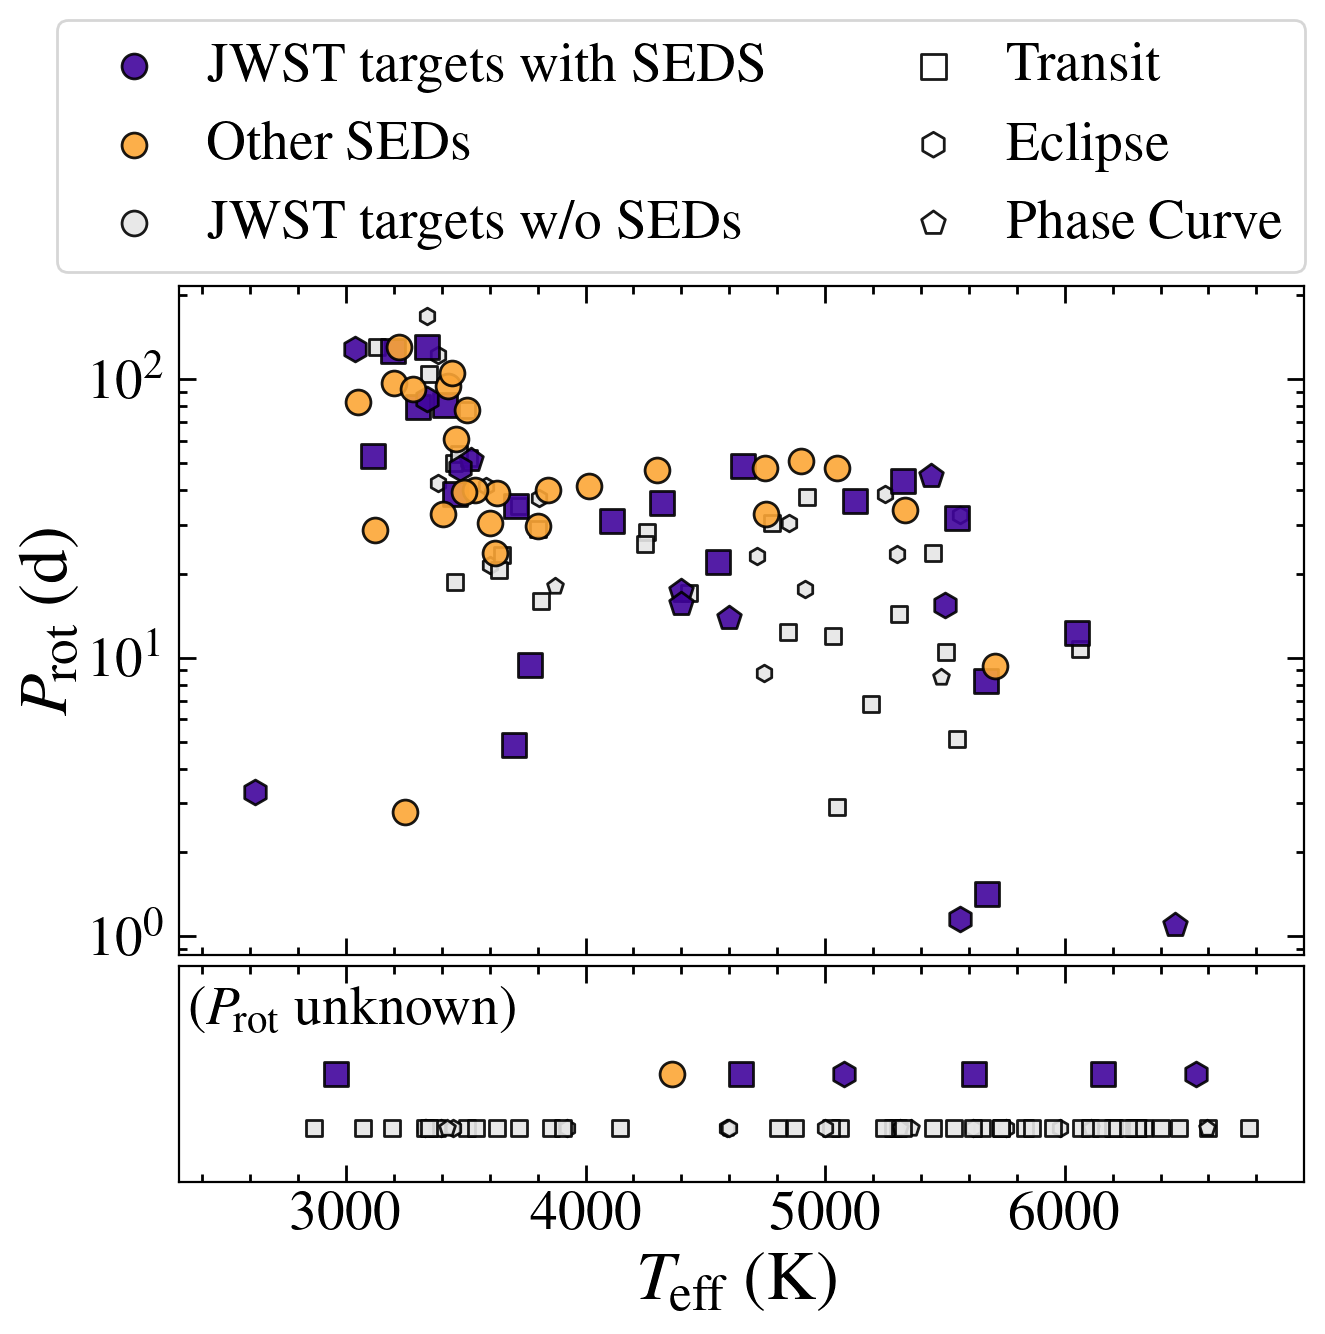

In [73]:
fig, axes = plt.subplot_mosaic([[0,0,0],[0,0,0],[0,0,0],[1,1,1]], figsize=(7, 7), sharex=True)



done_mask = np.isin(spt_table['Name'], jwstlist['hostname_nn'])
jwst_seds = spt_table['Name'][done_mask]
no_jwst_seds = spt_table['Name'][~done_mask]

no_sed_names = []

markers = dict(Transit='s', Eclipse='h', PhaseC='p')
for i, star in enumerate(jwstlist['hostname_nn']):
    marker = markers[jwstlist['Event'][i]]
    if star in jwst_seds:
        row =  spt_table[np.where(spt_table['Name'] ==star)[0][0]]
        if row['Prot (d)'] > 0.0:
            axes[0].scatter(row['Teff (K)'], row['Prot (d)'], alpha=0.9, color=plt.cm.plasma(0.1), marker=marker, edgecolor='k', s=80)
        else:
            axes[1].scatter(row['Teff (K)'], 1, alpha=0.9, color=plt.cm.plasma(0.1), marker=marker,edgecolor='k', s=80)
    else:
        row = jwstlist[i]
        no_sed_names.append(star)
        if row['st_prot'] > 0.0:
            axes[0].scatter(row['st_teff'], row['st_prot'], alpha=0.9, color='0.9', marker=marker,edgecolor='k', zorder=-10)
        else:
            axes[1].scatter(row['st_teff'], 0, alpha=0.9, color='0.9', marker=marker,edgecolor='k', zorder=-10)

#add seds with no jwst obs
for i, star in enumerate(no_jwst_seds):
    row = spt_table[np.where(spt_table['Name'] ==star)[0][0]]
    if row['Prot (d)'] > 0.0:
        axes[0].scatter(row['Teff (K)'], row['Prot (d)'], alpha=0.9, color=plt.cm.plasma(0.8), marker='o',edgecolor='k', s=80)
    else:
        axes[1].scatter(row['Teff (K)'], 1, alpha=0.9, color=plt.cm.plasma(0.8), marker='o',edgecolor='k', s=80)

axes[0].set_yscale('log')

axes[1].set_yticks([])
axes[1].set_ylim(-1, 3)

axes[1].set_xlim(2301, 6999) #A stars exculded

#adding points for the legend
markers = ['o', 'o', 'o', 's', 'h', 'p']
labels = ['JWST targets with SEDS', 'Other SEDs','JWST targets w/o SEDs', 'Transit', 'Eclipse', 'Phase Curve']
cols = [plt.cm.plasma(0.1), plt.cm.plasma(0.8), '0.9', 'none', 'none', 'none']
for i in range(len(markers)):
    axes[0].scatter(0, 0, alpha=0.9, color=cols[i], marker=markers[i],edgecolor='k', s=80, label=labels[i])



handles, labels = axes[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# axes[0].legend(by_label.values(), by_label.keys(), frameon=True, loc=4)
fig.legend(by_label.values(), by_label.keys(), frameon=True, loc='outside upper center', ncols=2, bbox_to_anchor=(0.515, 1.0))

axes[1].annotate(r'($P_{\mathrm{rot}}$ unknown)', (0.01, 0.9), xycoords='axes fraction', va='top', ha='left')
# axes[1].annotate('Four targets with $T_{\mathrm{eff}} > 8000$K excluded ', (0.99, 0.9), xycoords='axes fraction', va='top', ha='right')


axes[1].set_xlabel(r'$T_{\mathrm{eff}}$ (K)', size=25)
axes[0].set_ylabel(r'$P_{\mathrm{rot}}$ (d)', size=25)
fig.tight_layout()
fig.subplots_adjust(right=0.96, hspace=0.05, top=0.79, bottom=0.15)

fig.savefig('../plots/c1_4_targets.pdf')
fig.savefig('../plots/pngs/c1_4_targets.png', facecolor='w')

Need to reconcile where trexolist and my values don't match (e.g. TRAPPIST)

<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_8743/1699502764.py:34: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('$T_{\mathrm{eff}}$ (K)', size=25)


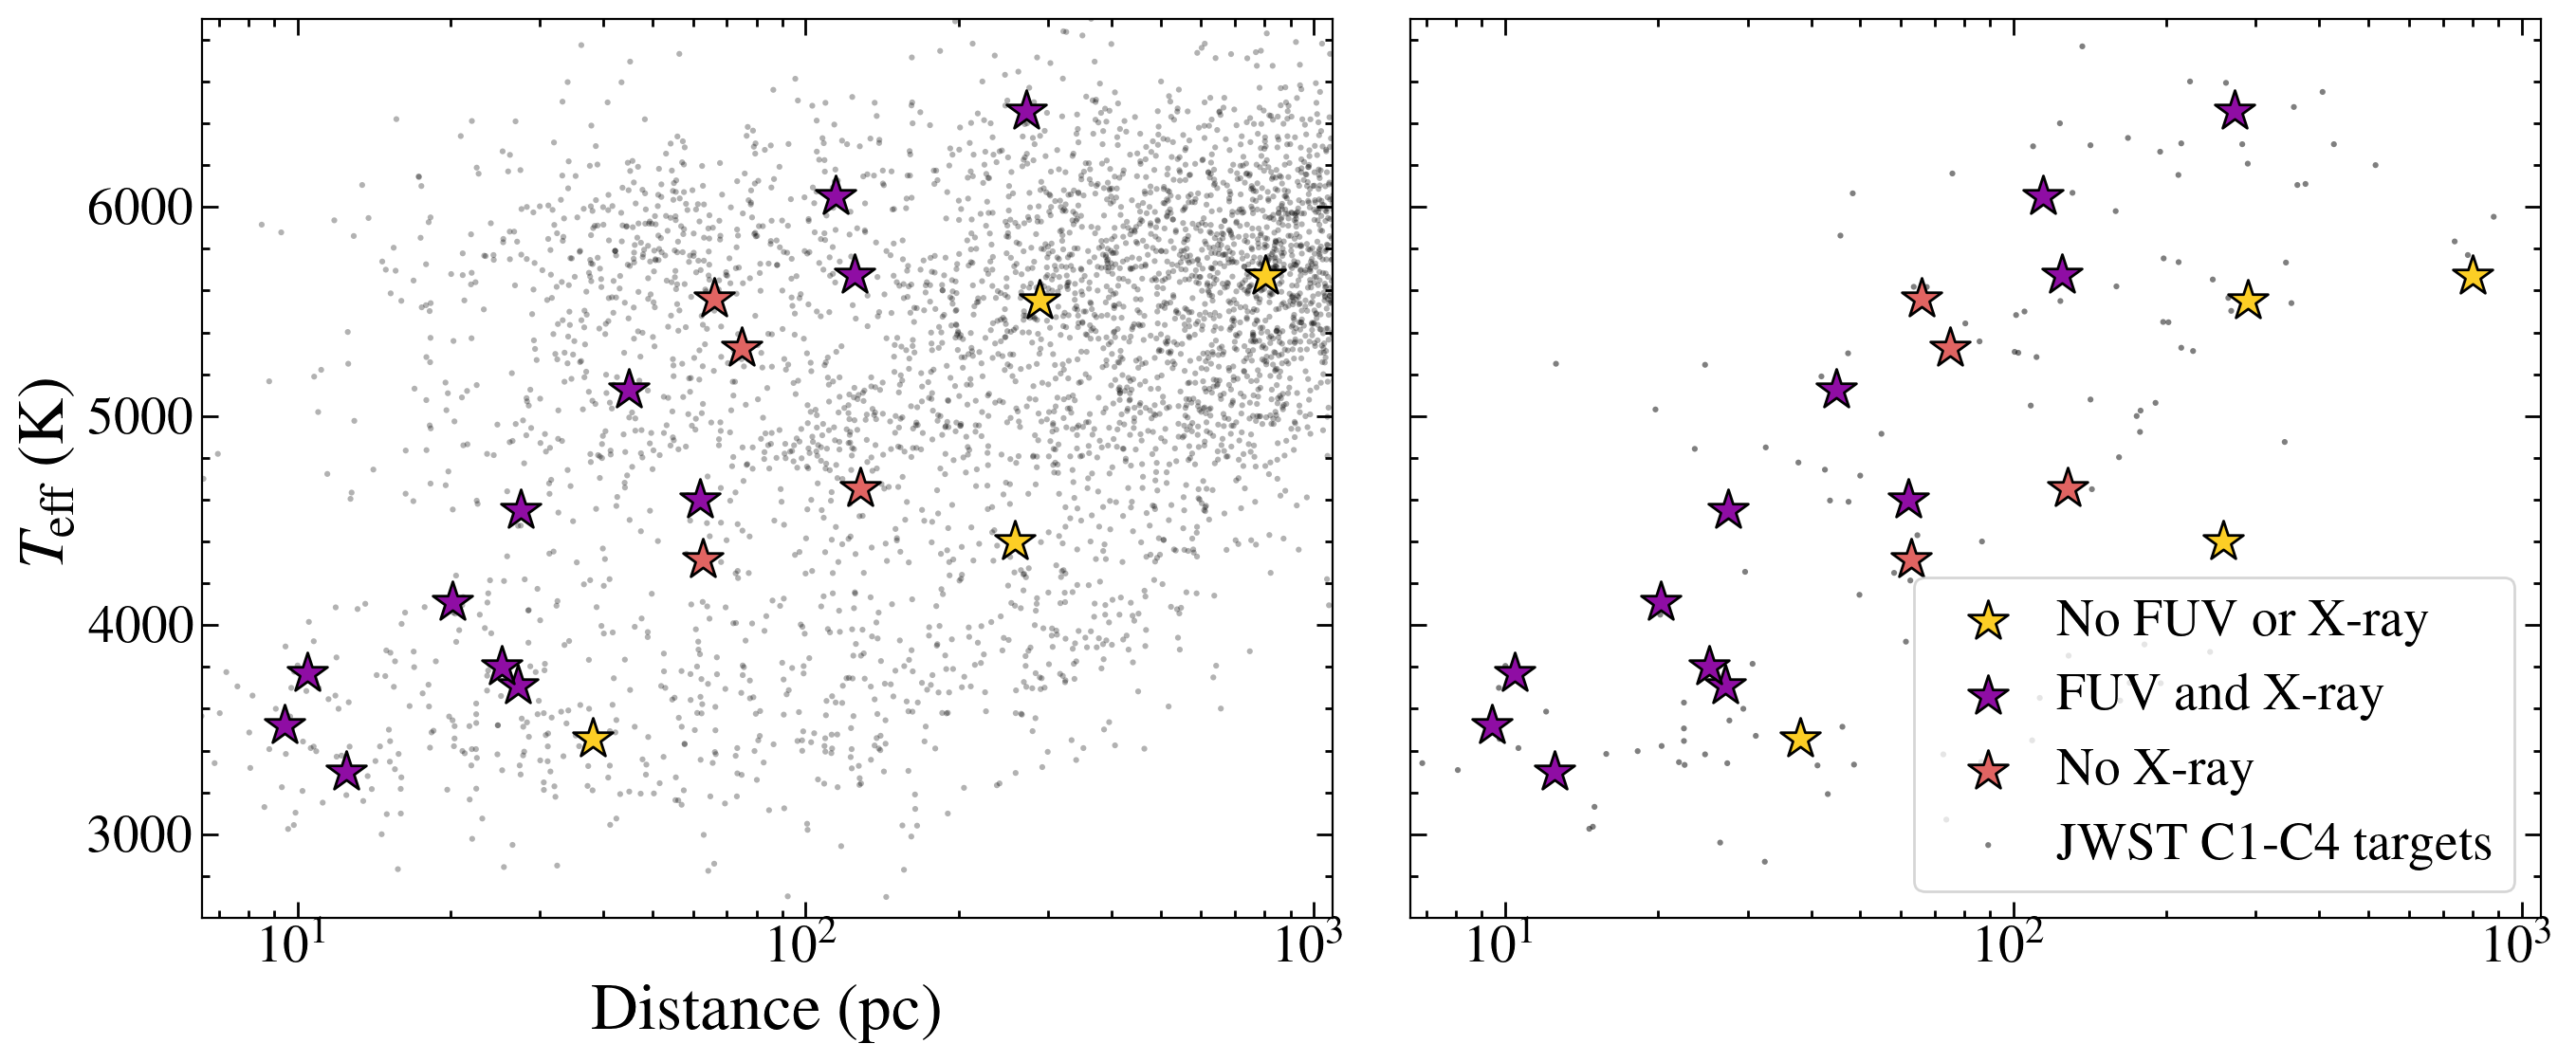

In [74]:
# fig, ax = plt.subplots(figsize=(7,6))
fig, axes = plt.subplots(figsize=(14,6), ncols=2, sharex=True, sharey=True)

dist = proxtab['Dist (pc)']
teff = proxtab['Teff (K)']

cols = [plt.cm.plasma(0.3), plt.cm.plasma(0.6), plt.cm.plasma(0.9)]

ax = axes[0]
ax1= axes[1]

for i in range(len(dist)):
    if proxtab['FUV'][i] == 'N':
        label = 'No FUV or X-ray'
        col = cols[2]
    elif proxtab['X-ray'][i] == 'N':
        label = 'No X-ray'
        col = cols[1]
    else:
        label = 'FUV and X-ray'
        col = cols[0]
    ax.scatter(dist[i], teff[i], marker='*', color=col, label = label, edgecolor='k', s=250)
    ax1.scatter(dist[i], teff[i], marker='*', color=col, label = label, edgecolor='k', s=250)
    

dmask = (jwstlist['st_teff'] > 0) #& (jwstlist['sy_dist'] > ) 

ax1.scatter(jwstlist['sy_dist'][dmask], jwstlist['st_teff'][dmask],s=5, zorder=-10, alpha=0.5, c='k', edgecolor='none', label= 'JWST C1-C4 targets' )
    
ax.set_xscale('log')
# ax.set_yscale('log')

ax.set_xlabel('Distance (pc)', size=25)
ax.set_ylabel('$T_{\mathrm{eff}}$ (K)', size=25)
# ax.scatter(host_dist,host_teffs, s=5, zorder=-10, alpha=0.3, c='k', edgecolor='none', label='All host stars')
ax.scatter(host_dist,host_teffs, s=5, zorder=-10, alpha=0.3, c='k', edgecolor='none', label='All host stars')


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
# fig.legend(by_label.values(), by_label.keys(), frameon=True, loc='outside upper center', ncols=2, bbox_to_anchor=(0.5, 1.2))
ax1.legend(by_label.values(), by_label.keys(), frameon=True, loc=4)
ax.set_xlim(6.5, 1090)
ax.set_ylim(2601,6899)

# ax.scatter(hosttab['sy_dist'],hosttab['st_teff'], s=5, zorder=-10, alpha=0.1, c='k', edgecolor='none')


fig.tight_layout()
# fig.savefig('../plots/which_data_plot.pdf')

In [75]:
jwstlist[jwstlist['st_teff'] > 7000]

<Table length=4>
hostname_nn letter_nn  Event  ProposalCategory ...  st_met st_prot col40
   str13       str1     str7        str6       ... float64 float64 int64
----------- --------- ------- ---------------- ... ------- ------- -----
    KELT-20         b Eclipse               GO ...   -0.29      --    --
     KELT-9         b  PhaseC               GO ...   -0.03      --    --
   WASP-178         b Transit               GO ...    0.08      --    --
   WASP-189         b Transit               GO ...    0.29      --    --

In [76]:
mask = jwstlist['st_teff'] > 6999
for star, teff in zip(jwstlist['hostname_nn'][mask], jwstlist['st_teff'][mask]):
    print(star, teff)

KELT-20 8720.0
KELT-9 10170.0
WASP-178 9360.0
WASP-189 8000.0


In [77]:
# spt_table['Name']

Lyman alpha plot

['gj341', 'gj367', 'gj_4102', 'toi-134', 'toi-178', 'toi-260', 'toi-421', 'toi-776', 'toi-836']
9


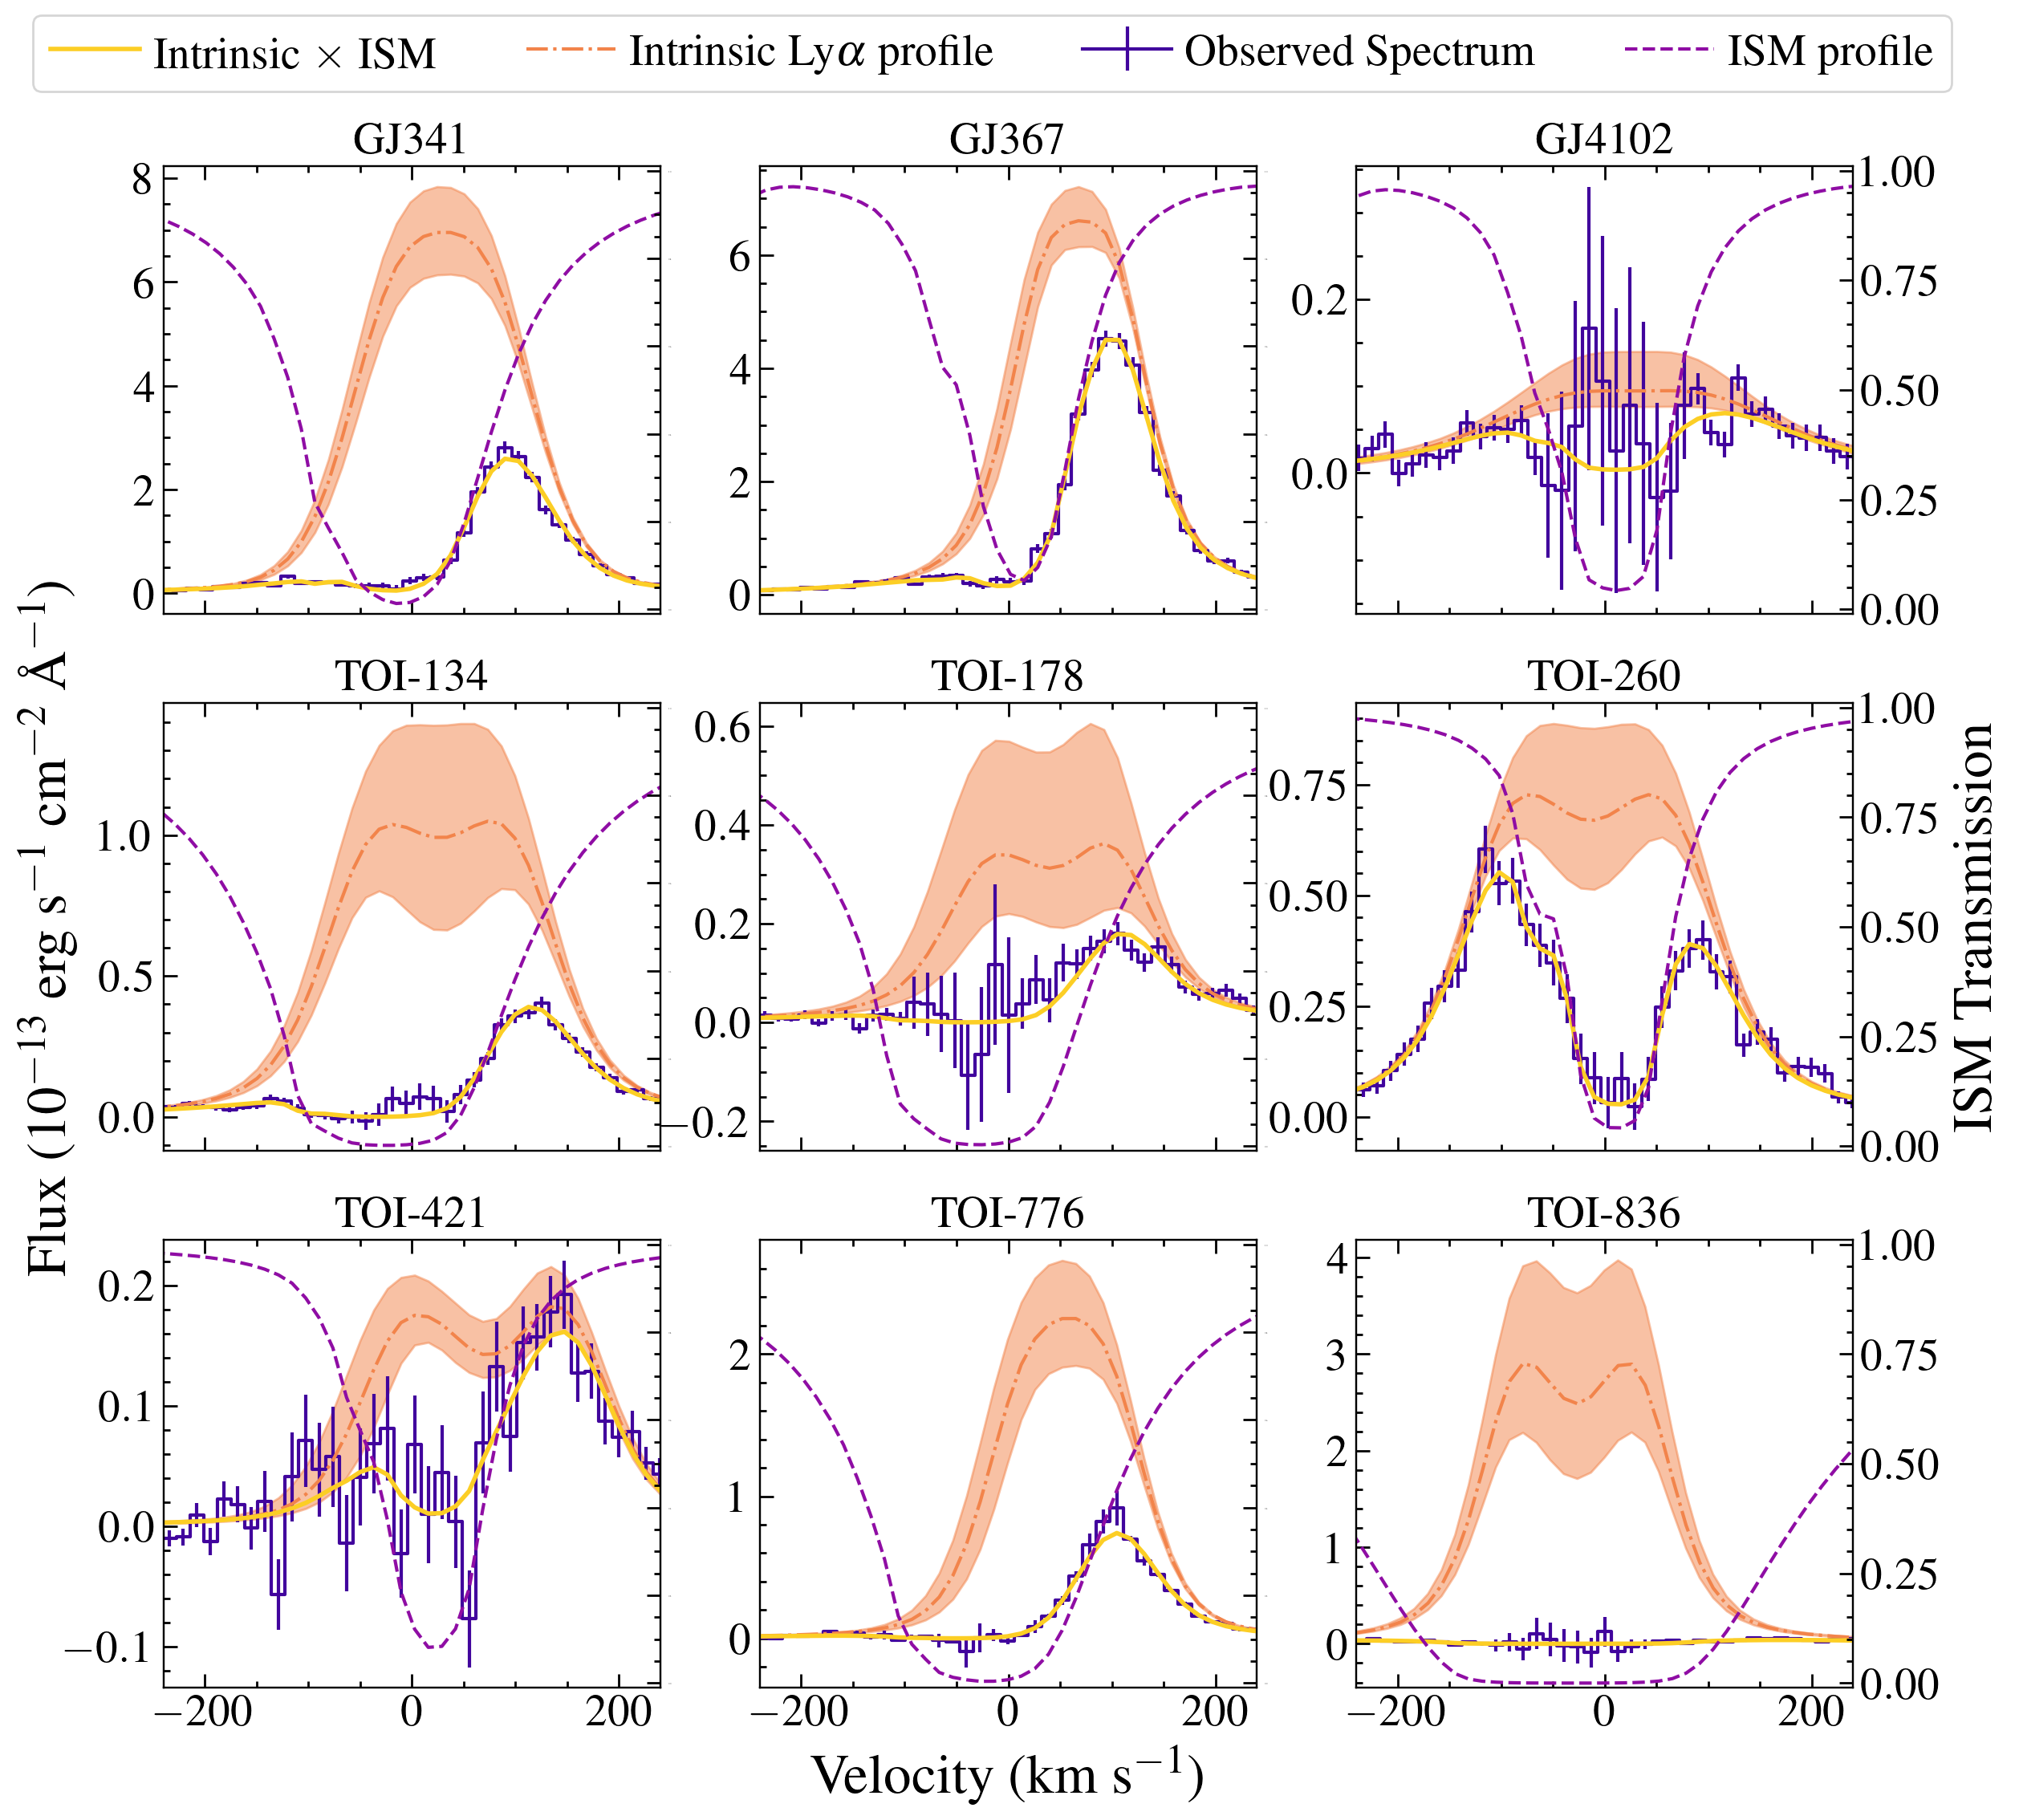

In [78]:
lya = 1215.67
ism_scale = 2.3e-13 #scaling ism to plot
fscale = 1e13 #scaling flux to axis
ism_scale *= fscale

lpath= '/media/david/2tb_ext_hd/hddata/meats/lya/'
lstarsall = os.listdir(lpath)
lstars = []
for star in lstarsall:
    if star not in ['lhs_1140', 'ltt1445A']:
        sfiles = glob.glob('{}{}/*MCMC*'.format(lpath, star))
        if len(sfiles) > 0:
            lstars.append(star)
print(lstars)
print(len(lstars))

cols = [plt.cm.plasma(0.1), plt.cm.plasma(0.3), plt.cm.plasma(0.7), plt.cm.plasma(0.9)]

fig, axes = plt.subplots(ncols=3, nrows=3, sharex=True, figsize=(14, 12))

for i, star in enumerate(lstars):
    ax = axes.flat[i]
    lyapath = glob.glob('{}{}/*MCMC*'.format(lpath, star))[0]
    data = Table.read(lyapath)
    v = (data['wave_lya']*u.AA).to(u.km/u.s,  equivalencies=u.doppler_optical(lya*u.AA))
    # ax.step(v, data['flux_lya']*fscale, c='C0', label = 'Observed Spectrum', zorder=0, where='mid')
    # ax.errorbar(v, data['flux_lya']*fscale, yerr=data['error_lya']*fscale, alpha=0.5, errorevery=3, ls='none', c='C0')
    # ax.errorbar(v, data['flux_lya']*fscale, yerr=data['error_lya']*fscale, alpha=1, errorevery=3, ds='steps-mid', c='C0')
    ax.errorbar(v, data['flux_lya']*fscale, yerr=data['error_lya']*fscale, alpha=1, ds='steps-mid', c=cols[0],label = 'Observed Spectrum')
    ax.plot(v, data['lya_model_median']*fscale, c=cols[3], label=r'Intrinsic $\times$ ISM', zorder=10, lw=2)
    # ax.fill_between(v.value, data['lya_model_high_1sig']*fscale,data['lya_model_low_1sig']*fscale, color='C1', alpha=0.5)
    
    ax.plot(v, data['lya_intrinsic_median']*fscale, c=cols[2], ls='-.', label=r'Intrinsic Ly$\alpha$ profile', zorder=5)
    ax.fill_between(v.value, data['lya_intrinsic_high_1sig']*fscale,data['lya_intrinsic_low_1sig']*fscale, color=cols[2], alpha=0.5, zorder=-10)
    
    # name = os.path.split(spec)[1][:-34]
    # ax.set_title(name, size=20)
    
    # xlim = min([abs(min(v.value)), max(v.value)])-10
    xlim = 240
    ax.set_xlim(-xlim, xlim)
    ax2=ax.twinx()
    ax2.plot(v, data['lya_ism_median'], c=cols[1], ls='--', alpha=1, label='ISM profile', zorder=-9)
    # ax2.fill_between(v.value, data['lya_ism_high_1sig'],data['lya_ism_low_1sig'], color='C4', alpha=0.5, zorder=-10)
    ax2.set_ylim(-0.01, 1.01)
    if i not in [2, 5, 8]:
        ax2.tick_params(axis='y', which='both', labelsize=0)

    ax.set_title(star.upper().replace('_',''), size=20)
    
    # ax2.set_ylabel('ISM Transmission')
    
    
    # ax.set_xlabel('Velocity (km s$^{-1}$)', size=20)
    # ax.set_ylabel('Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20)

ax1 = fig.add_subplot(111, frame_on=False)
ax1.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# plt.ylabel('Flux ($10^{-14}$\,erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=20, labelpad=12)
ax1.set_xlabel('Velocity (km s$^{-1}$)', size=25)
ax1.set_ylabel(r'Flux (10$^{-13}$ erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)', size=25, labelpad=10)


ax3 = fig.add_subplot(111, frame_on=False)
ax3.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
ax3.yaxis.set_label_position("right")

# ax3.set_minior_ticks(visible=False)
ax3.set_ylabel('ISM Transmission', labelpad=45, size=25)#, c=cols[3])

fig.tight_layout()



handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
by_label = dict(zip(labels+labels2, handles+handles2))
# axes[0].legend(by_label.values(), by_label.keys(), frameon=True, loc=4)
fig.legend(by_label.values(), by_label.keys(), frameon=True, loc='outside upper center', ncols=4, bbox_to_anchor=(0.5, 0.99))


fig.subplots_adjust(hspace=0.2, wspace=0.2, top=0.9)

fig.savefig('../plots/lya_all.pdf')

x-ray table

In [79]:
xtab = Table.read('../x-ray/mMEATS_xray_models.csv')
xtab.dtype.names

('Star',
 'fx',
 'fxeu',
 'fxel',
 'kt1',
 'kt1eu',
 'kt1el',
 'kt2',
 'kt2eu',
 'kt2el',
 'kt3',
 'kt3eu',
 'kt3el',
 'abd',
 'nh',
 'tel')

In [80]:
for i, star in enumerate(xtab['Star']):
    if star == 'HD120411':
        star = 'HIP 67522'
    if star == 'Tau_Ceti':
        star = r'$\tau$\,Ceti'
    if star == 'eps_Indi':
        star = r'$\epsilon$\,Indi'
    if star == 'HD15337':
        star = 'TOI-402'
    line = '{} & '.format(star)
    for param in ['fx', 'kt1', 'kt2']:
        if xtab[param][i] > 0.0:
            if xtab['{}eu'.format(param)][i] != xtab['{}el'.format(param)][i]:
                pstring = '${}^{{+{}}}_{{-{}}}$'.format(xtab['{}'.format(param)][i], xtab['{}eu'.format(param)][i], xtab['{}el'.format(param)][i])
            else:
                pstring = '${}\pm{}$'.format(xtab['{}'.format(param)][i], xtab['{}eu'.format(param)][i])
        else:
            pstring = '\\nodata'
        line += pstring + ' & '
    abd = xtab['abd'][i]
    nh = '{0:.1f}'.format(np.log10(xtab['nh'][i] * 1e20))
    tel = xtab['tel'][i].upper()
    # print(nh)

    line += '{} & {} & {} \\\\'.format(abd, nh, tel) 
    

    
    print(line)
        
            

TOI-776 & $2.5\pm0.5$ & $0.12\pm0.03$ & $0.83\pm0.13$ & 0.4 & 18.0 & XMM \\
WASP-121 & $1.4\pm0.5$ & $0.39\pm0.0001$ & \nodata & 0.4 & 20.7 & XMM \\
HIP 67522 & $122.0\pm8.0$ & $1.13\pm0.07$ & \nodata & 0.4 & 19.0 & CHANDRA \\
GJ367 & $10.0\pm0.8$ & $0.12^{+0.09}_{-0.02}$ & $0.67^{+0.07}_{-0.13}$ & 0.4 & 18.0 & XMM \\
TOI-402 & $1.38\pm0.16$ & $0.193^{+0.056}_{-0.043}$ & \nodata & 0.6 & 19.0 & CHANDRA \\
GJ341 & $4.1^{+0.5}_{-0.45}$ & $0.14^{+0.04}_{-0.03}$ & $0.83^{+0.27}_{-0.17}$ & 0.4 & 18.5 & XMM \\
TOI-836 & $7.6^{+1.0}_{-0.9}$ & $0.26\pm0.025$ & $0.672\pm0.0$ & 0.4 & 17.0 & XMM \\
TOI-134 & $2.4\pm0.3$ & $0.19\pm0.026$ & $0.9^{+0.46}_{-0.5}$ & 0.4 & 18.0 & XMM \\
WASP-166 & $0.78\pm0.17$ & $0.43^{+0.11}_{-0.09}$ & \nodata & 0.6 & 18.0 & CHANDRA \\
TOI-260 & $1.41^{+0.45}_{-0.34}$ & $0.15^{+0.06}_{-0.04}$ & $0.77^{+0.3}_{-0.2}$ & 0.4 & 19.0 & XMM \\
TOI-402 & $1.38\pm0.16$ & $0.193^{+0.05}_{-0.04}$ & \nodata & 0.6 & 19.0 & CHANDRA \\
K2-141 & $1.37^{+0.28}_{-0.36}$ & $0.28^{+0.03}

<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_8743/1076703730.py:16: SyntaxWarning: invalid escape sequence '\p'
  pstring = '${}\pm{}$'.format(xtab['{}'.format(param)][i], xtab['{}eu'.format(param)][i])
/tmp/ipykernel_8743/1076703730.py:21: RuntimeWarning: divide by zero encountered in log10
  nh = '{0:.1f}'.format(np.log10(xtab['nh'][i] * 1e20))


In [81]:
0.25-0.193

0.056999999999999995

How necessary were the F star SEDs? Care after 1750\AA. Could be nice to do this for all stars?

501.0
501.0


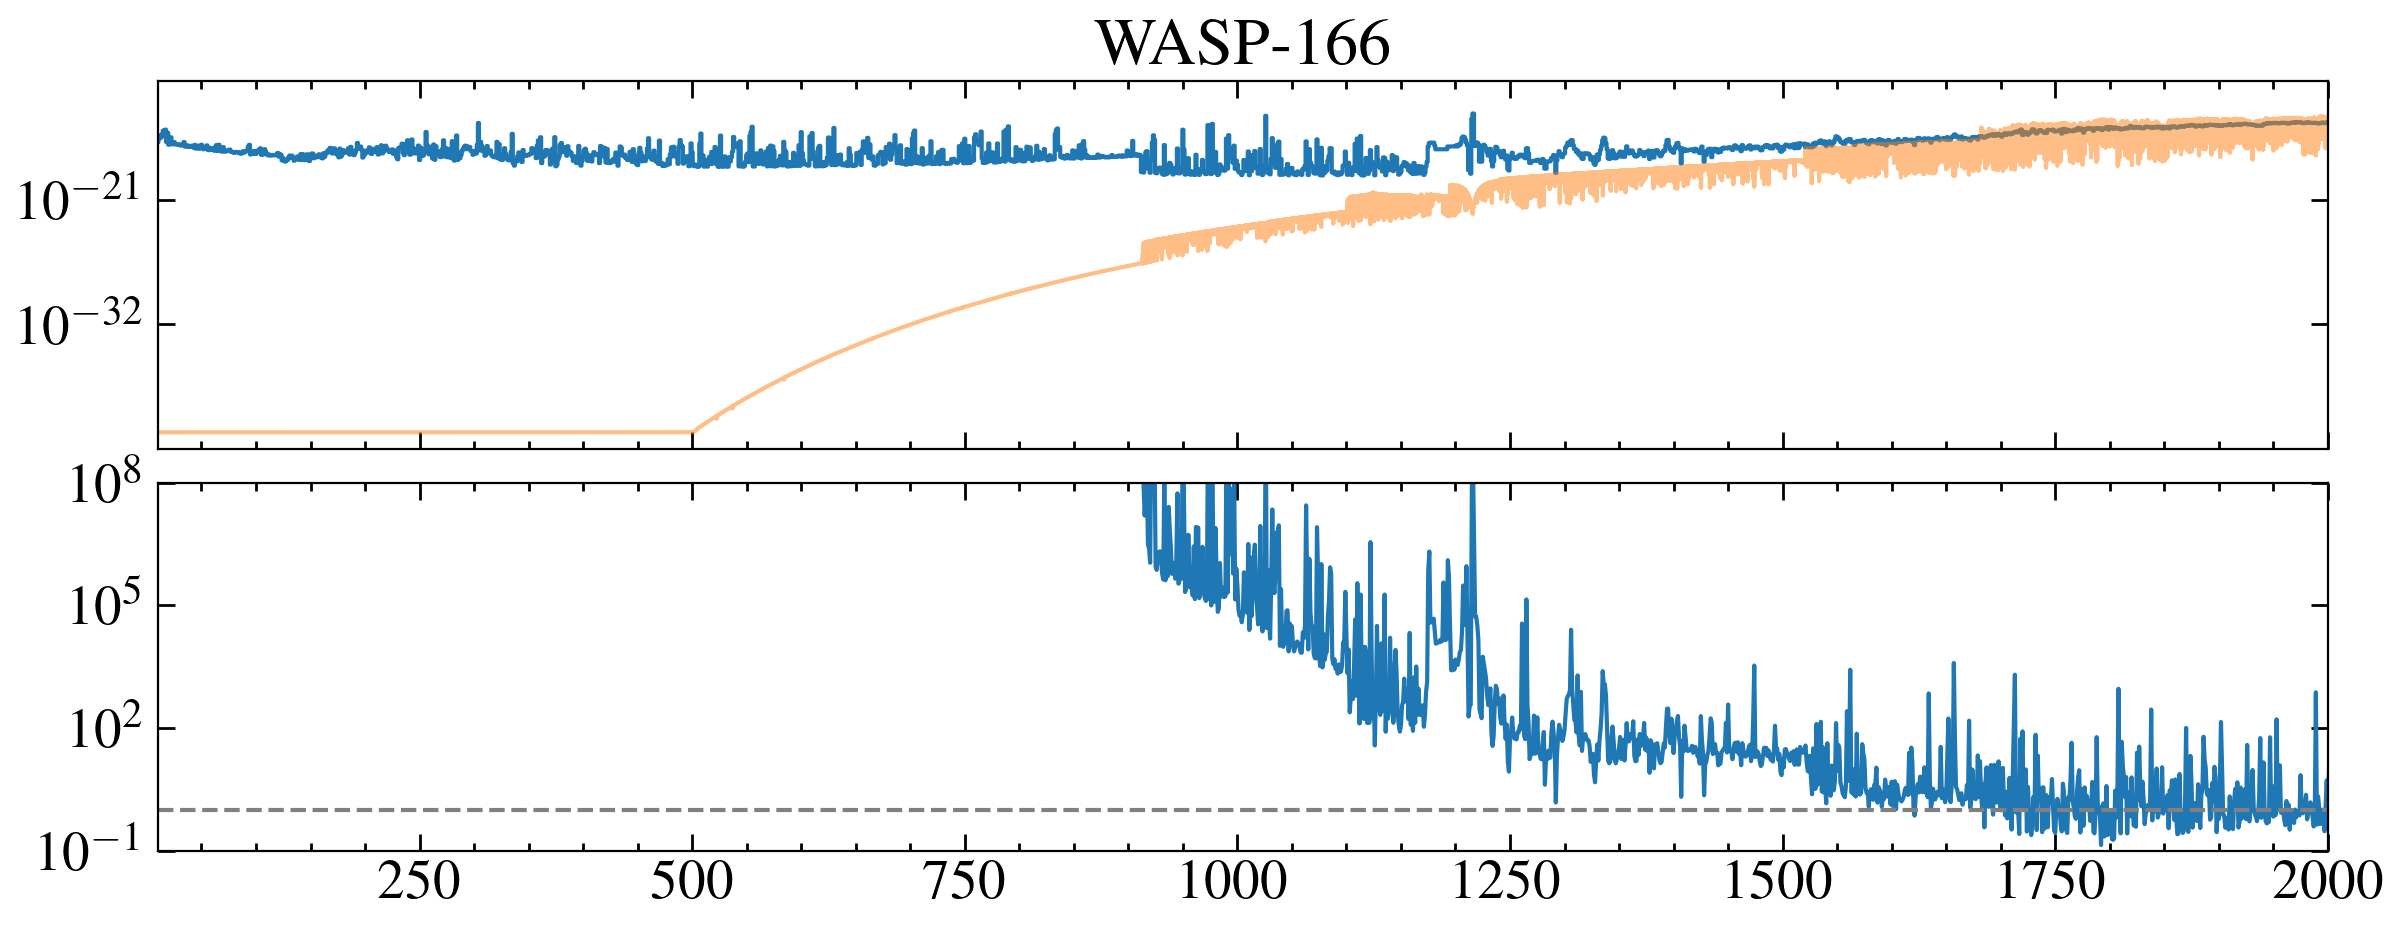

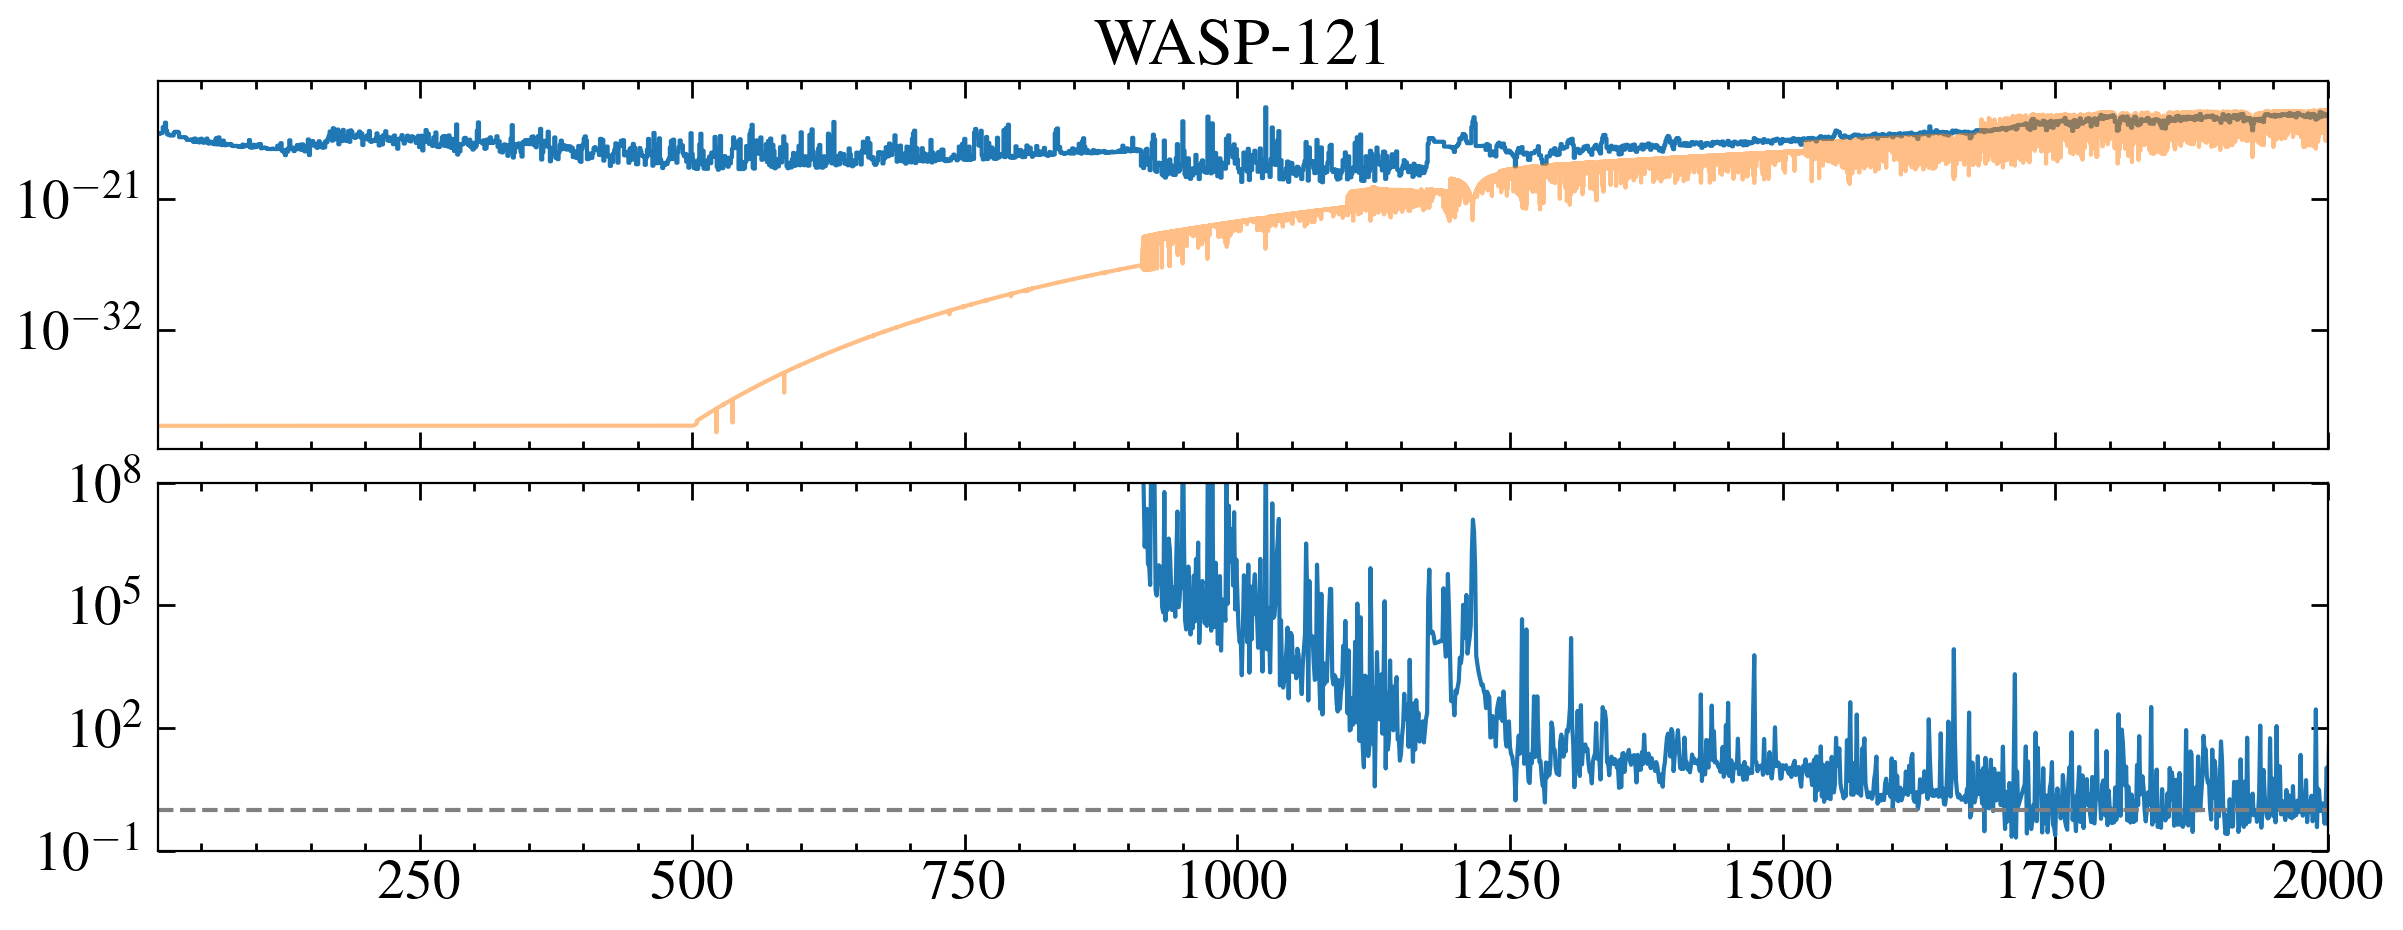

In [82]:
fstars = ['wasp-166', 'wasp-121']

for i, star in enumerate(fstars):
    fig, axes = plt.subplot_mosaic([[0,0,0],[0,0,0],[1,1,1], [1,1,1]], sharex=True)
    
    sed = fits.getdata('../fixed_hlsp/{0}/hlsp_muscles_multi_multi_{0}_broadband_v25_adapt-const-res-sed.fits'.format(star), 1)
    phx = fits.getdata('../fixed_hlsp/{0}/hlsp_muscles_model_phx_{0}_na_v25_component-spec.fits'.format(star), 1)
    normfac = fits.getheader('../fixed_hlsp/{0}/hlsp_muscles_model_phx_{0}_na_v25_component-spec.fits'.format(star), 0)['NORMFAC']
    w, f = sed['WAVELENGTH'][sed['FLUX'] > 0.0], sed['FLUX'][sed['FLUX'] > 0.0]
    pw, pf = phx['WAVELENGTH'][(phx['WAVELENGTH'] <= w[-1])], phx['FLUX'][(phx['WAVELENGTH'] <= w[-1])]*normfac
    print(min(pw))
    
    joinw, joinf = np.arange(1, 501, 1), np.full(500, pf[0])
    pw, pf = np.hstack((joinw, pw)), np.hstack((joinf, pf))

    
    ax = axes[0]
    ax.step(w, f, where='mid')
    ax.plot(pw, pf, alpha=0.5)
    ax.set_yscale('log')
    ax.set_xlim(10, 2000)
    ax.set_title(star.upper())

    ax1 = axes[1]
    pfi = np.interp(w, pw, pf)
    ratio = f/pfi
    ax1.plot(w, ratio)
    ax1.set_yscale('log')
    ax1.axhline(1, ls='--', c='0.5')
    ax1.set_ylim(0.1, 1e8)
     

In [83]:
# for name in np.array(no_sed_names):
#     if name[-1] == 'A':
#         name = name[:-1]
#     print(name+',')


Gallery of SEDs, 4x5?

<>:56: SyntaxWarning: invalid escape sequence '\A'
<>:56: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_8743/3447848732.py:56: SyntaxWarning: invalid escape sequence '\A'
  bigax.set_xlabel('Wavelength (\AA)', size=20)


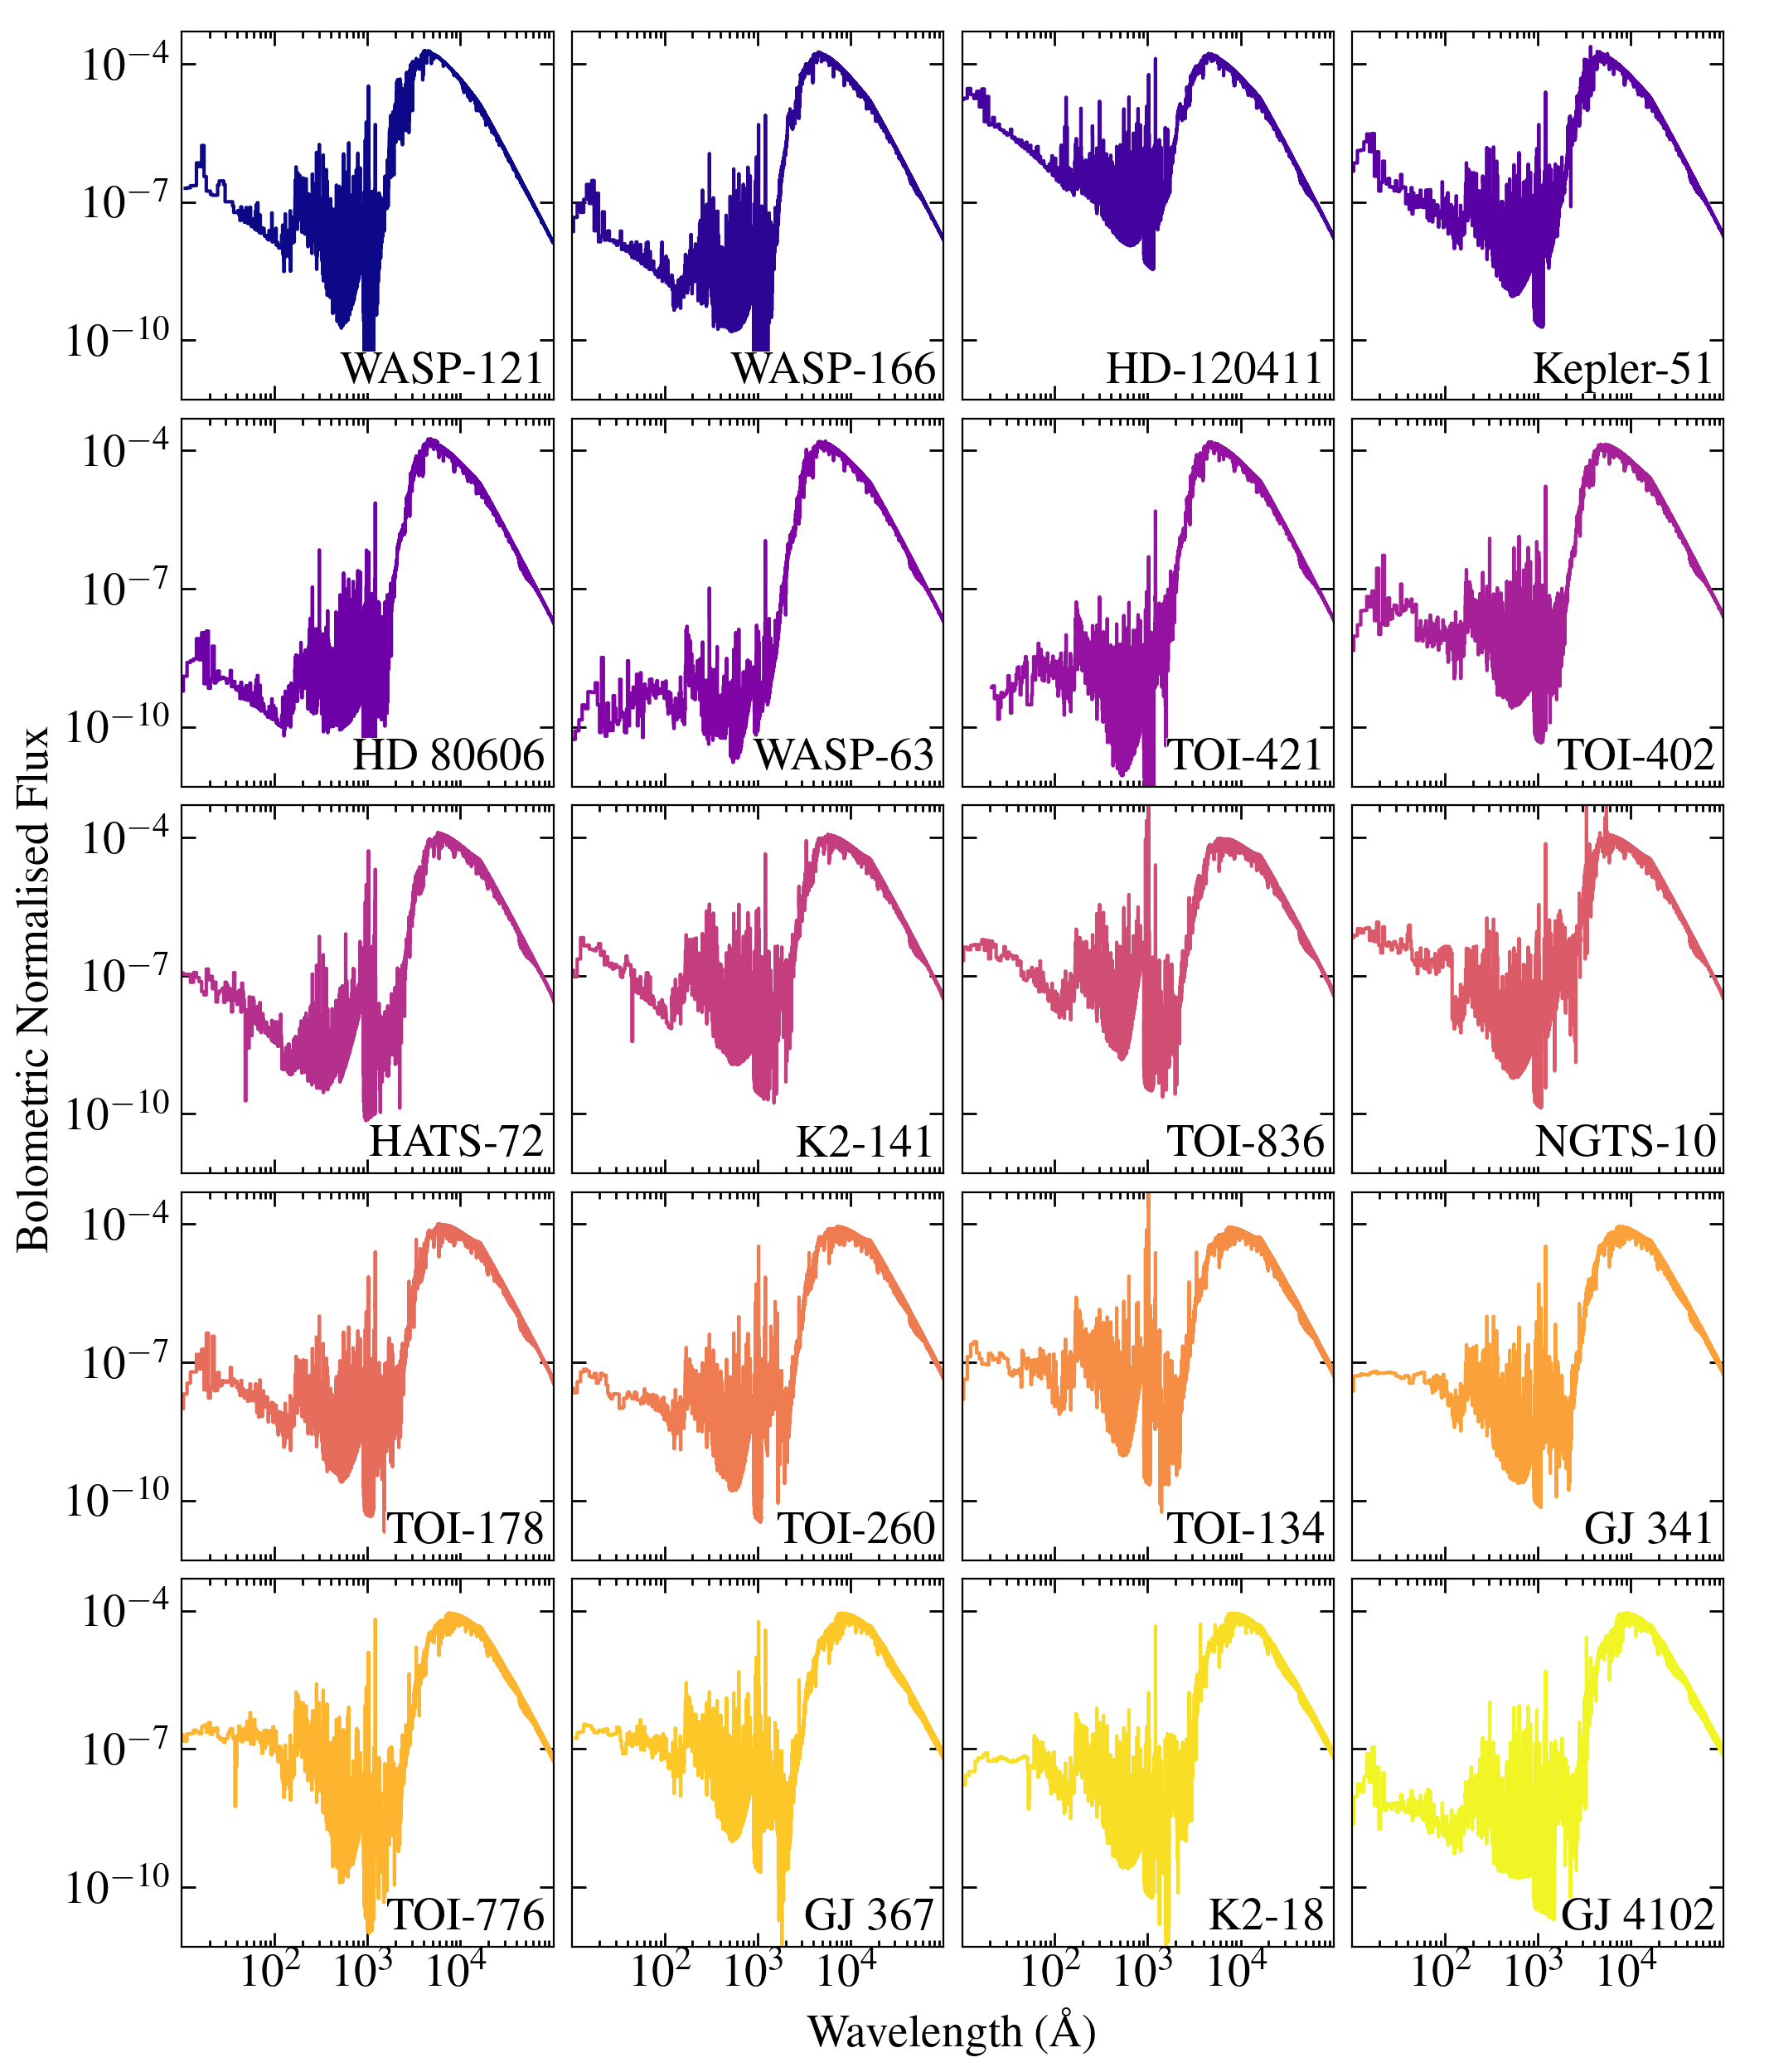

In [84]:
nstars = 20 #number of stars to plot in each plot

stars_done = [] # all seds that appear in this plot

# nplots = 4 
# plotn = 1#counter for which plot you're on

cols = np.linspace(0, 0.99, nstars)

fig, axes = plt.subplots(ncols=4, nrows =5, sharex=True, sharey=True, figsize=(12, 15))

# for i in range(nplots):
    # fig, axes = plt.subplots(sharex=True, sharey=True, nrows=5, figsize=(10, 11))

for j in range(nstars):
    ax = axes.flat[j]
    sed_ind = j
    if sed_ind < len(seds_sort): #placeholder until they're done
        spec= seds_sort[::-1][sed_ind]

        data = fits.getdata(spec, 1)
        star = fits.getheader(spec)['TARGNAME']
        stars_done.append(star)
        star = star.upper().replace('_', ' ')
        w, f, e, inst = data['WAVELENGTH'], data['BOLOFLUX'], data['ERROR'], data['INSTRUMENT']
        w, f = w[f >0], f[f>0]
        w, f = w[w< 1e6], f[w < 1e6]
        ax.step(w, f, c=plt.cm.plasma(cols[j]), where='mid')
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.set_xlim(10.1, 99999.9)
        ax.set_ylim(5e-12, 5e-4,)
        ax.set_yticks((1e-10, 1e-7, 1e-4))
        # ax.annotate('{} ({}\,K)'.format(star, teffs_sort[j]), (0.98, 0.02), xycoords='axes fraction', 
        #      ha = 'right', va='bottom', bbox=dict(fc='w', ec='none', pad =0.1))
        if star == 'KEPLER-51':
            star = 'Kepler-51'
        ax.annotate('{}'.format(star), (0.98, 0.02), xycoords='axes fraction', 
             ha = 'right', va='bottom', bbox=dict(fc='w', ec='none', pad =0.1))
        # ax.axvline(50, ls ='--', c='0.5', zorder=-5)
        # ax.axvline(120, ls ='--', c='0.5', zorder=-5)
        # ax.axvline(1100, ls ='--', c='0.5', zorder=-5)
        # ax.axvline(5600, ls ='--', c='0.5', zorder=-5)
    # if j == 0:
    #     ylabel = 1.1
    #     ax.annotate('PHX', (2e4, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
    #     ax.annotate('HST', (2000, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
    #     ax.annotate('DEM', (350, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
    #     ax.annotate('APEC', (80, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
    #     ax.annotate('XMM/CXO', (20, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')


bigax = fig.add_subplot(111, frame_on=False)
bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
bigax.set_ylabel('Bolometric Normalised Flux', size=20, labelpad=25)
bigax.set_xlabel('Wavelength (\AA)', size=20)

# fig.tight_layout()
fig.subplots_adjust(hspace=0.05, wspace=0.05)
# fig.savefig('../plots/all_seds_plot_{}.pdf'.format(i+1))
# fig.savefig('../plots/all_seds_plot_{}.png'.format(i+1), facecolor='w')

Nah doesn't look great

In [85]:
(-3*9)/5

-5.4